# Data Set Information:
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data

# Attribute Information: Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv
instant: record index
dteday : date
season : season (1:winter, 2:spring, 3:summer, 4:fall)
yr : year (0: 2011, 1:2012)
mnth : month ( 1 to 12)
hr : hour (0 to 23)
holiday : weather day is holiday or not (extracted from [Web Link])
weekday : day of the week
workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
weathersit :
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
hum: Normalized humidity. The values are divided to 100 (max)
windspeed: Normalized wind speed. The values are divided to 67 (max)
casual: count of casual users
registered: count of registered users
cnt: count of total rental bikes including both casual and registered18 - GT Turbine decay state coefficient. (Target variable) 

# Importing libraries


In [147]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

# 1.Data Ingestion: Doing the descriptive statistics and do null value condition check, writing inference on it. 

In [167]:
hr=pd.read_csv("hour.csv")
hr.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [292]:
day=pd.read_csv("day.csv")
day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [169]:
hr.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [170]:
hr.tail()

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
17374    17375  2012-12-31       1   1    12  19        0        1   
17375    17376  2012-12-31       1   1    12  20        0        1   
17376    17377  2012-12-31       1   1    12  21        0        1   
17377    17378  2012-12-31       1   1    12  22        0        1   
17378    17379  2012-12-31       1   1    12  23        0        1   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
17374           1           2  0.26  0.2576  0.60     0.1642      11   
17375           1           2  0.26  0.2576  0.60     0.1642       8   
17376           1           1  0.26  0.2576  0.60     0.1642       7   
17377           1           1  0.26  0.2727  0.56     0.1343      13   
17378           1           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  
17374         108  119  
17375          81   89  
17376          83   90  
17377          48   61  
17378          37   49

In [171]:
hr.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [172]:
hr.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

# Using describe() function we got descriptive statistics.
Looking at the statictics we can see that the data is skewed.
Mean value is different from that of 50%, 50quartile(median). This says that the data is skewed.
We can see 25th quantile and 75th quantile and max value of a column.

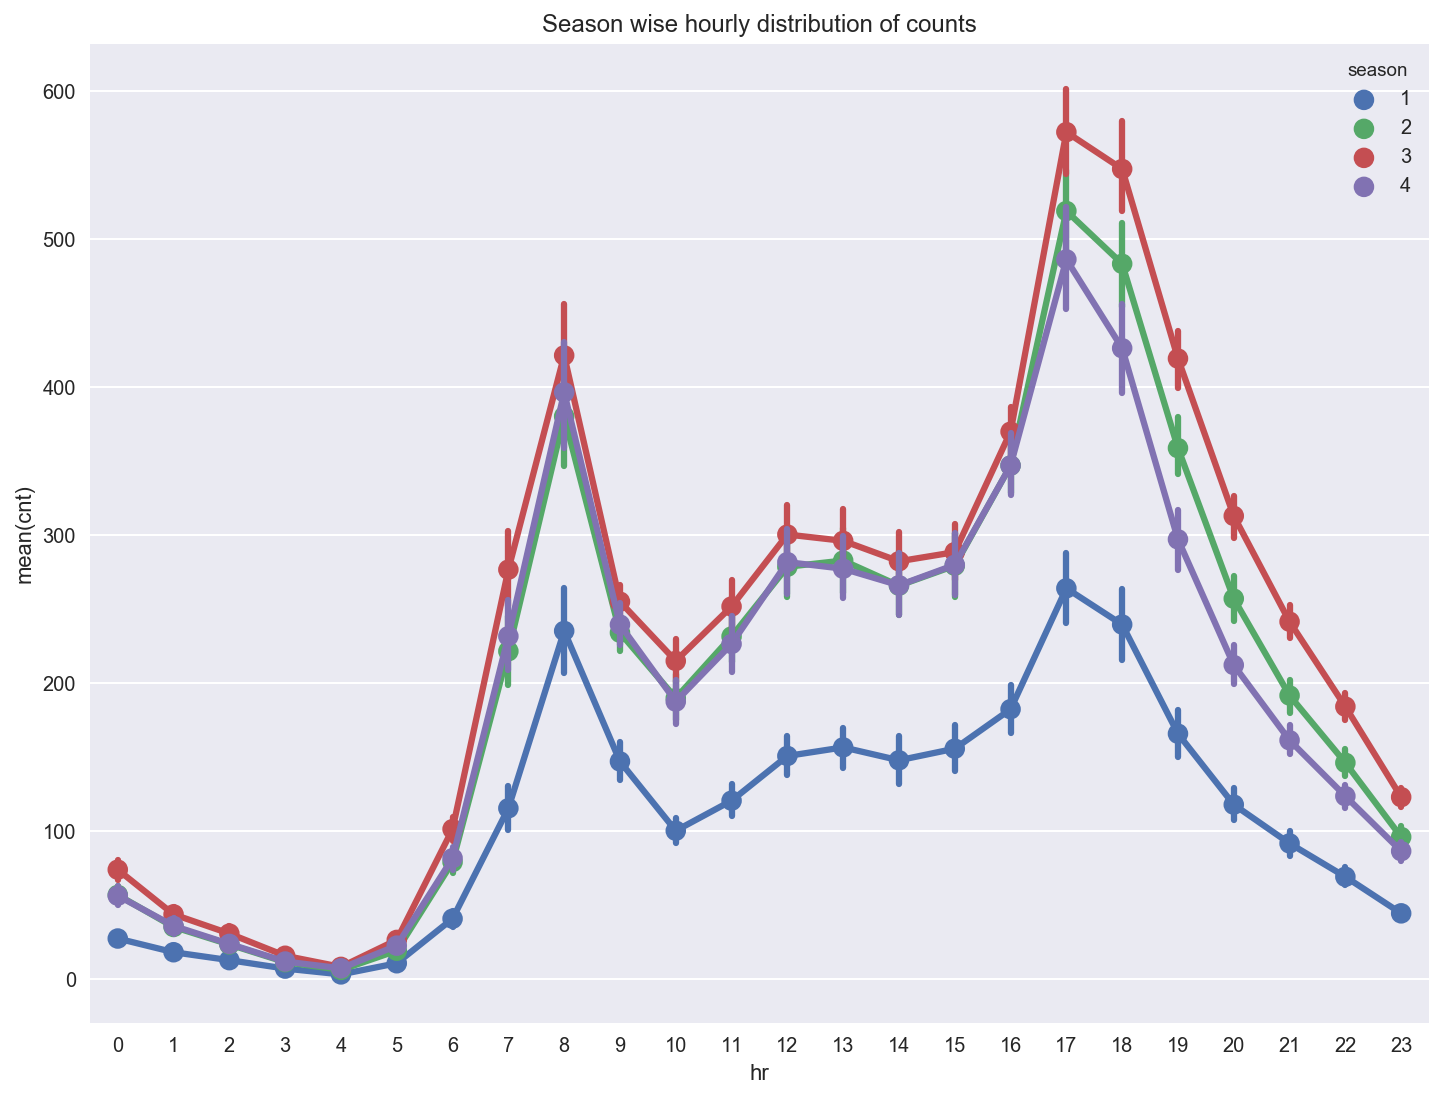

In [219]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.figsize"]=12,9
fig,ax = plt.subplots()
sns.pointplot(data=hr[['hr',
                           'cnt',
                           'season']],
              x='hr',
              y='cnt',
              hue='season',
              ax=ax)
ax.set(title="Season wise hourly distribution of counts")

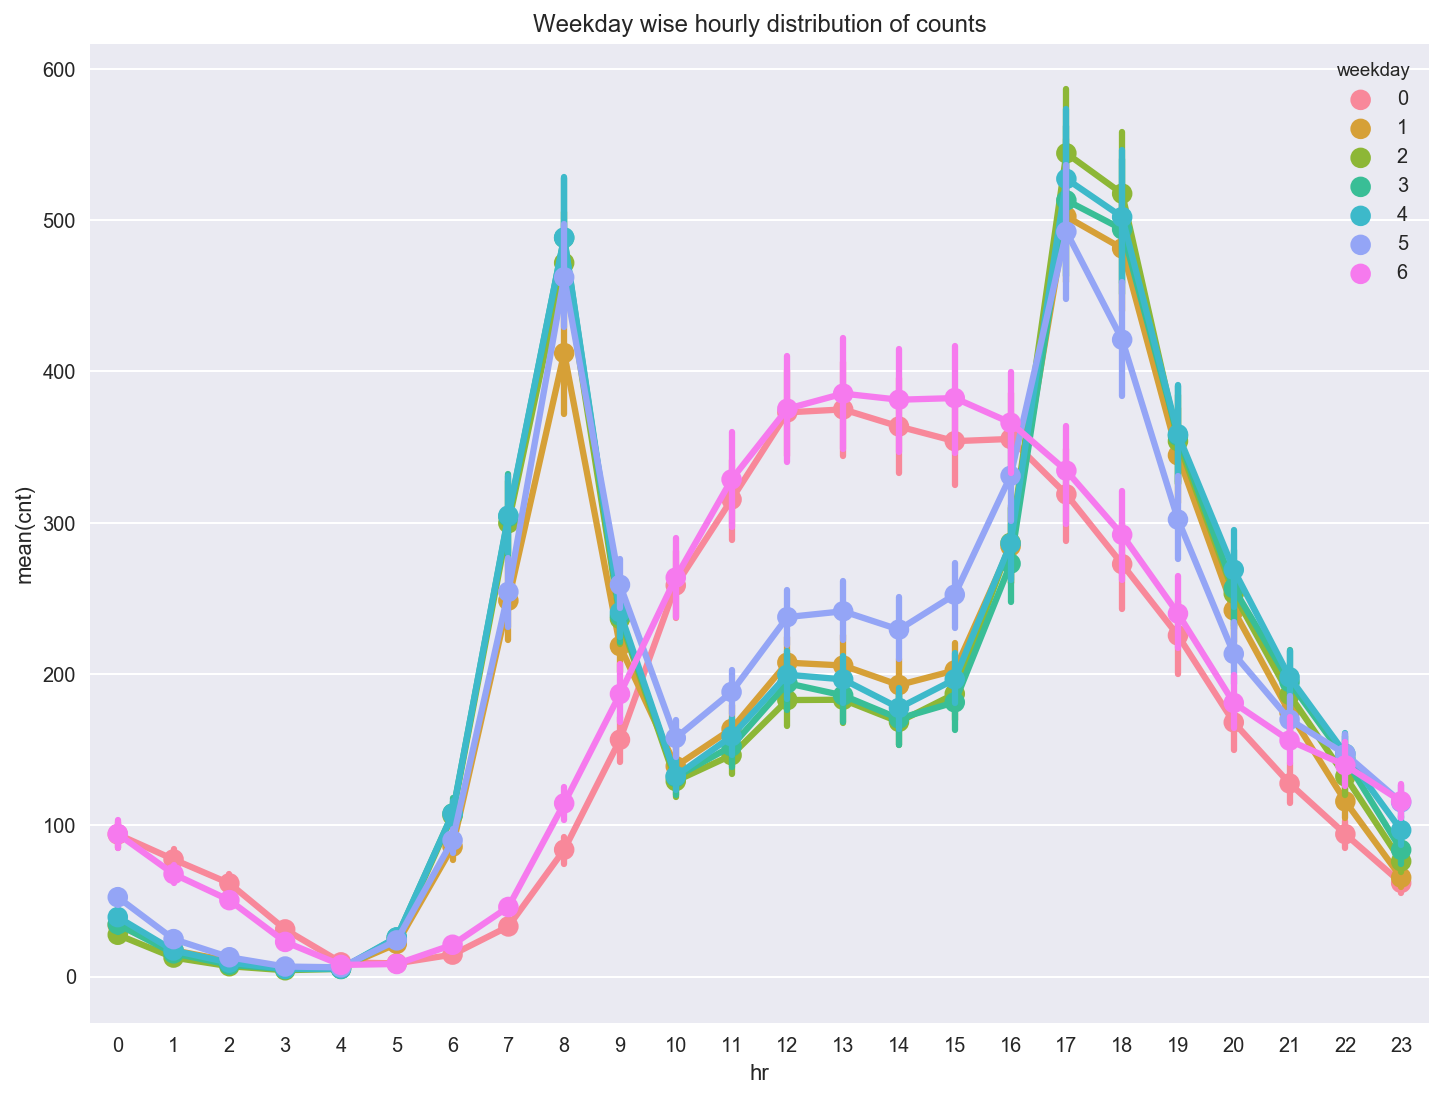

In [220]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.figsize"]=12,9
fig,ax = plt.subplots()
sns.pointplot(data=hr[['hr',
                           'cnt',
                           'weekday']],
              x='hr',
              y='cnt',
              hue='weekday',
              ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")

In [175]:
print(list(hr.columns))

['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [176]:
print(hr.head(2))

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  


# checking data has null values or not

In [177]:
print(hr.isnull().any())

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


In [178]:
hr[hr.isnull().any(axis=1)].count()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [316]:
day[day.isnull().any(axis=1)].count()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [179]:
#all rows control for null values
hr.isnull().values.any()

False

# Day Data Set


In [293]:
category_features_day = ['season', 'holiday', 'mnth', 'weekday', 'workingday', 'weathersit']
number_features_day = ['temp', 'atemp', 'hum', 'windspeed']

features_day = category_features_day + number_features_day
target_day = ['cnt']

In [294]:
X_day = day[features_day]
y_day = day[target_day]

In [295]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_day,y_day,test_size=0.30,random_state=42)

In [296]:
lr_d = LinearRegression()
model_d = lr_d.fit(X_train_d,y_train_d)

In [297]:
print(f'R^2 train score : {model_d.score(X_train_d,y_train_d)}')
print(f'R^2 test score : {model_d.score(X_test_d,y_test_d)}')

R^2 train score : 0.5249693372870587
R^2 test score : 0.5019216083276796


# Building Base Model

In [298]:
X_constant_day = sm.add_constant(X_day)
model_h = sm.OLS(y_day,X_constant_day).fit()
model_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     80.53
Date:                Tue, 05 Nov 2019   Prob (F-statistic):          2.43e-110
Time:                        14:12:23   Log-Likelihood:                -6295.3
No. Observations:                 731   AIC:                         1.261e+04
Df Residuals:                     720   BIC:                         1.266e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3033.3075    360.945      8.404      0.000    2324.676    3741.939
season       482.1177     84.106      5.732      0.000     316.996     647.239
holiday     -479.9466    308.827     -1.554      0.121   -1086.256     126.363
mnth         -29.2715     26.232     -1.116      0.265     -80.772      22.229
weekday       61.3474     25.035      2.450      0.015      12.197     110.498
workingday   112.3898    110.615      1.016      0.310    -104.777     329.557
weathersit  -494.6358    120.244     -4.114      0.000    -730.707    -258.565
temp        2381.1444   2156.213      1.104      0.270   -1852.072    6614.361
atemp       3634.0881   2441.576      1.488      0.137   -1159.371    8427.547
hum        -2234.1519    478.651     -4.668      0.000   -3173.870   -1294.434
windspeed  -3145.3511    700.328     -4.491      0.000   -4520.280   -1770.422
==============================================================================
Omnibus:                       13.940   Durbin-Watson:                   0.397
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                8.179
Skew:                           0.055   Prob(JB):                       0.0168
Kurtosis:                       2.494   Cond. No.                         561.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2. Split the data into train = 70% and test size = 30%?

# Raw linear regression model

In [180]:
## Raw linear regression model
X=hr.drop(['dteday','cnt'],axis=1)
y=hr['cnt']
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [  5.57765398e-15   4.44089210e-16  -2.10751555e-13  -3.89688282e-14
   7.21644966e-16  -9.23289223e-14   1.02081971e-14  -3.21895288e-14
  -3.62470470e-14   6.81924135e-14  -1.44603080e-13   2.23304990e-13
  -1.26850028e-14   1.00000000e+00   1.00000000e+00]
Intercept: -4.817479748453479e-11
R^2 score: 1.0


In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(12165, 15)
(5214, 15)
(5214,)


In [182]:
hr.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# 3. Build a base model(Raw)

In [183]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(X,y)
model.coef_

array([  5.57765398e-15,   4.44089210e-16,  -2.10751555e-13,
        -3.89688282e-14,   7.21644966e-16,  -9.23289223e-14,
         1.02081971e-14,  -3.21895288e-14,  -3.62470470e-14,
         6.81924135e-14,  -1.44603080e-13,   2.23304990e-13,
        -1.26850028e-14,   1.00000000e+00,   1.00000000e+00])

In [184]:
lr.score(X,y)

1.0

In [185]:
np.asarray(hr)

array([[1, '2011-01-01', 1, ..., 3, 13, 16],
       [2, '2011-01-01', 1, ..., 8, 32, 40],
       [3, '2011-01-01', 1, ..., 5, 27, 32],
       ..., 
       [17377, '2012-12-31', 1, ..., 7, 83, 90],
       [17378, '2012-12-31', 1, ..., 13, 48, 61],
       [17379, '2012-12-31', 1, ..., 12, 37, 49]], dtype=object)

In [186]:
import warnings 
warnings.filterwarnings('ignore')
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.427e+32
Date:                Tue, 05 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:05:01   Log-Likelihood:             4.7163e+05
No. Observations:               17379   AIC:                        -9.432e+05
Df Residuals:                   17363   BIC:                        -9.431e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.274e-13    2.1e-14     10.829      0.000    1.86e-13    2.69e-13
instant     3.643e-17   1.43e-17      2.542      0.011    8.33e-18    6.45e-17
season     -2.859e-14    5.1e-15     -5.604      0.000   -3.86e-14   -1.86e-14
yr          1.137e-13   1.25e-13      0.906      0.365   -1.32e-13     3.6e-13
mnth       -6.217e-15   1.06e-14     -0.589      0.556   -2.69e-14    1.45e-14
hr          3.331e-15   4.89e-16      6.810      0.000    2.37e-15    4.29e-15
holiday    -1.208e-13   1.87e-14     -6.449      0.000   -1.58e-13   -8.41e-14
weekday      5.44e-15   1.51e-15      3.597      0.000    2.48e-15     8.4e-15
workingday  4.396e-14   7.66e-15      5.743      0.000     2.9e-14     5.9e-14
weathersit  2.243e-14   5.33e-15      4.208      0.000     1.2e-14    3.29e-14
temp       -2.913e-13   1.03e-13     -2.816      0.005   -4.94e-13   -8.85e-14
atemp       6.075e-13   1.16e-13      5.226      0.000     3.8e-13    8.35e-13
hum         -3.02e-13   2.01e-14    -15.005      0.000   -3.41e-13   -2.63e-13
windspeed   1.776e-15   2.69e-14      0.066      0.947    -5.1e-14    5.45e-14
casual         1.0000   9.01e-17   1.11e+16      0.000       1.000       1.000
registered     1.0000   2.65e-17   3.77e+16      0.000       1.000       1.000
==============================================================================
Omnibus:                     1479.889   Durbin-Watson:                   0.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1980.551
Skew:                           0.725   Prob(JB):                         0.00
Kurtosis:                       3.795   Cond. No.                     5.19e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.19e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [317]:
category_features_hour = ['season', 'holiday', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit']
number_features_hour = ['temp', 'atemp', 'hum', 'windspeed']

features_hour = category_features + number_features
target_hour = ['cnt']

In [318]:
X_hour = hr[features_hour]
y_hour = hr[target_hour]

In [319]:
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_hour,y_hour,test_size=0.30,random_state=42)

In [320]:
from sklearn.linear_model import LinearRegression
lr_h = LinearRegression()
model_h = lr_h.fit(X_train_h,y_train_h)

In [321]:
print(f'R^2 train score : {model_h.score(X_train_h,y_train_h)}')
print(f'R^2 test score : {model_h.score(X_test_h,y_test_h)}')

R^2 train score : 0.3371562841912489
R^2 test score : 0.3440683861410443


In [322]:
import statsmodels.api as sm

In [323]:
X_constant_hour = sm.add_constant(X_hour)
model_h = sm.OLS(y_hour,X_constant_hour).fit()
model_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     811.4
Date:                Tue, 05 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:27:09   Log-Likelihood:            -1.1144e+05
No. Observations:               17379   AIC:                         2.229e+05
Df Residuals:                   17367   BIC:                         2.230e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.1811      7.176      4.066      0.000      15.115      43.247
season        18.9876      1.891     10.043      0.000      15.282      22.693
holiday      -20.5846      6.959     -2.958      0.003     -34.226      -6.944
mnth           0.1589      0.590      0.270      0.788      -0.997       1.315
hr             7.4613      0.171     43.546      0.000       7.125       7.797
weekday        1.7135      0.562      3.049      0.002       0.612       2.815
workingday     3.6982      2.490      1.485      0.138      -1.183       8.580
weathersit    -1.3296      1.979     -0.672      0.502      -5.209       2.550
temp          93.0023     38.418      2.421      0.015      17.699     168.306
atemp        227.1855     43.161      5.264      0.000     142.586     311.785
hum         -222.1211      7.131    -31.151      0.000    -236.098    -208.145
windspeed     28.4864     10.003      2.848      0.004       8.879      48.094
==============================================================================
Omnibus:                     4226.649   Durbin-Watson:                   0.510
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9681.692
Skew:                           1.379   Prob(JB):                         0.00
Kurtosis:                       5.400   Cond. No.                         787.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# High R-squared value means data is overfitted

Overfitting a model is a condition where a statistical model begins to describe the random error in the data rather than the relationships between variables. This problem occurs when the model is too complex. In regression analysis, overfitting can produce misleading R-squared values, regression coefficients, and p-values.


# 4. EDA -  Plots:

# A.	Check for Outlier using Box plot and apply the formula to check how many of these data has outliers 

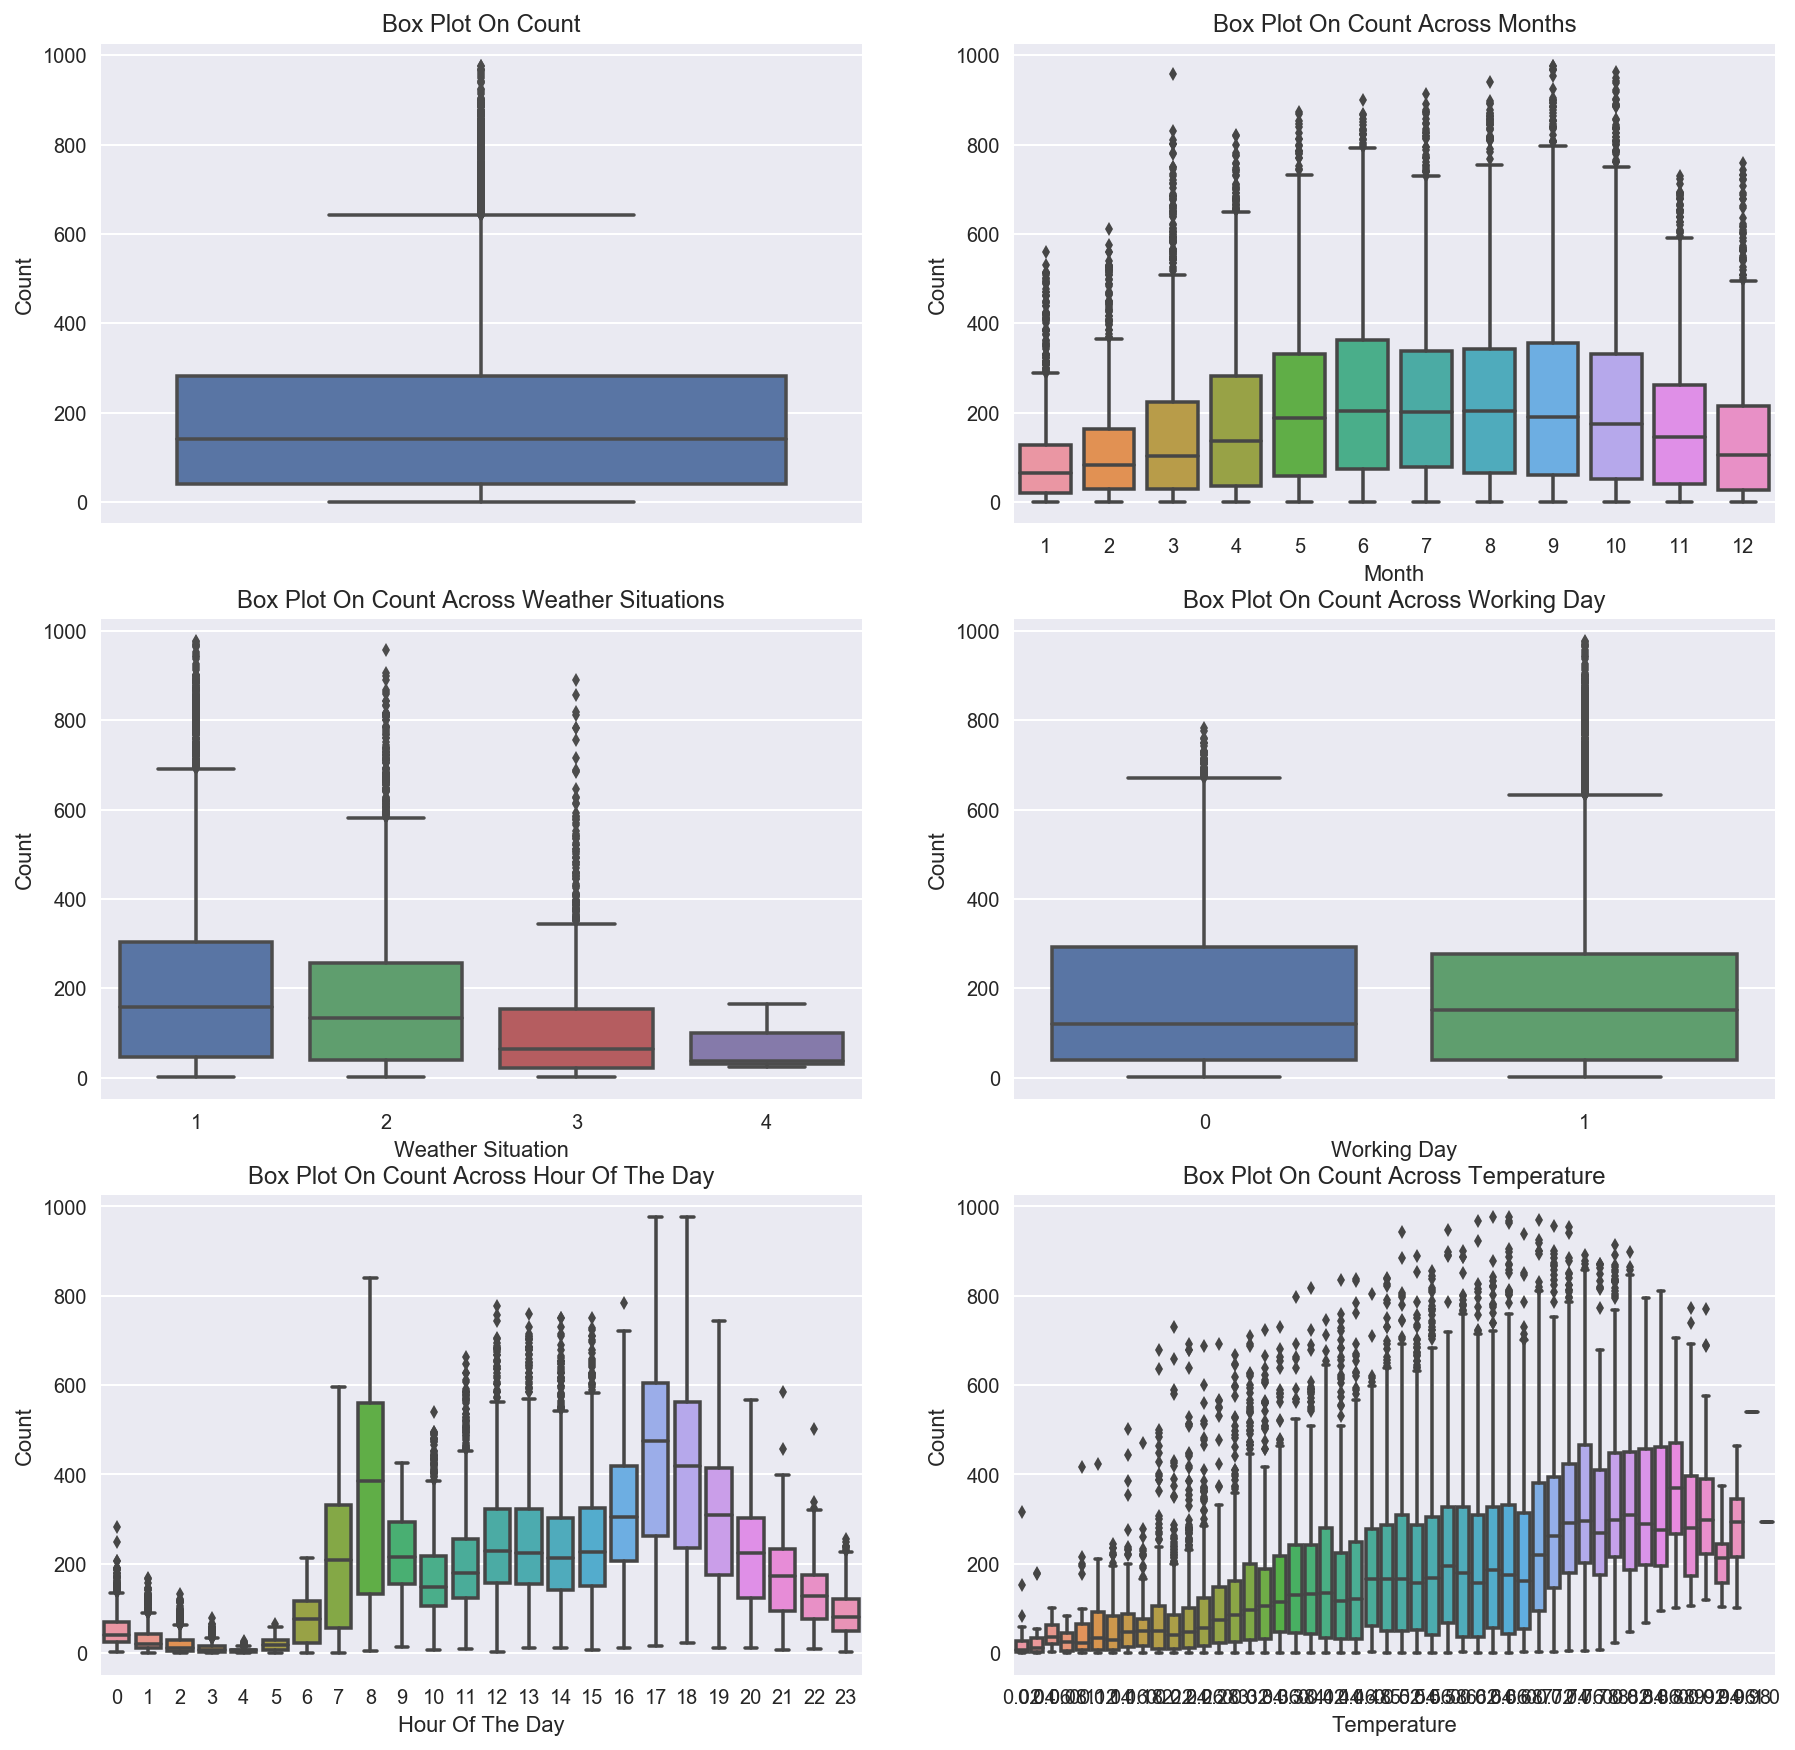

In [249]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=hr,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=hr,y="cnt",x="mnth",orient="v",ax=axes[0][1])
sns.boxplot(data=hr,y="cnt",x="weathersit",orient="v",ax=axes[1][0])
sns.boxplot(data=hr,y="cnt",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=hr,y="cnt",x="hr",orient="v",ax=axes[2][0])
sns.boxplot(data=hr,y="cnt",x="temp",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")
axes[1][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot On Count Across Weather Situations")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[2][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[2][1].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Count Across Temperature")

# Box Plot for Day Data Set


temp  Box Plot


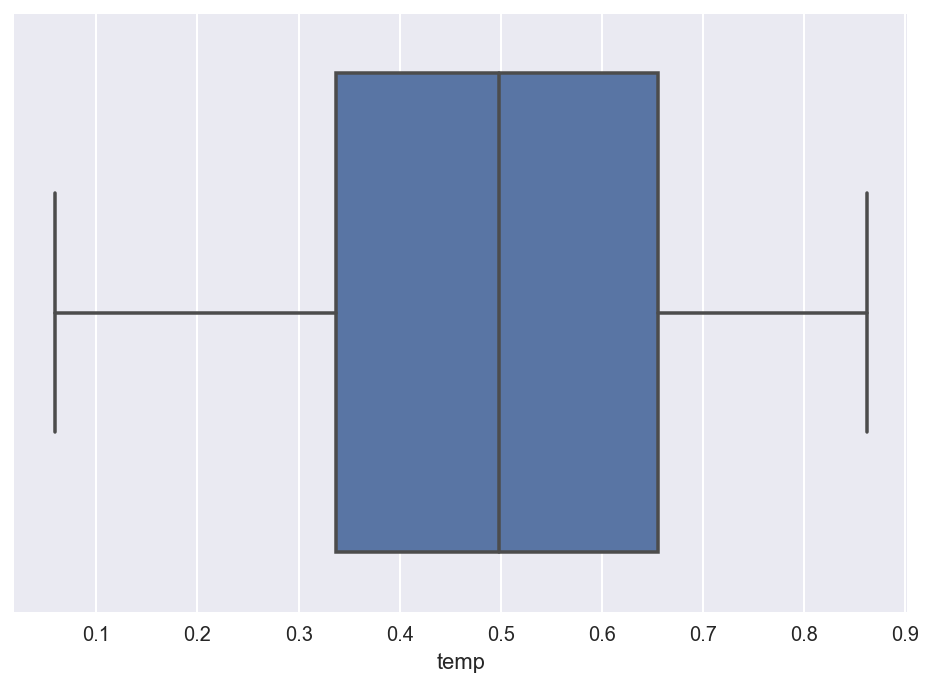

atemp  Box Plot


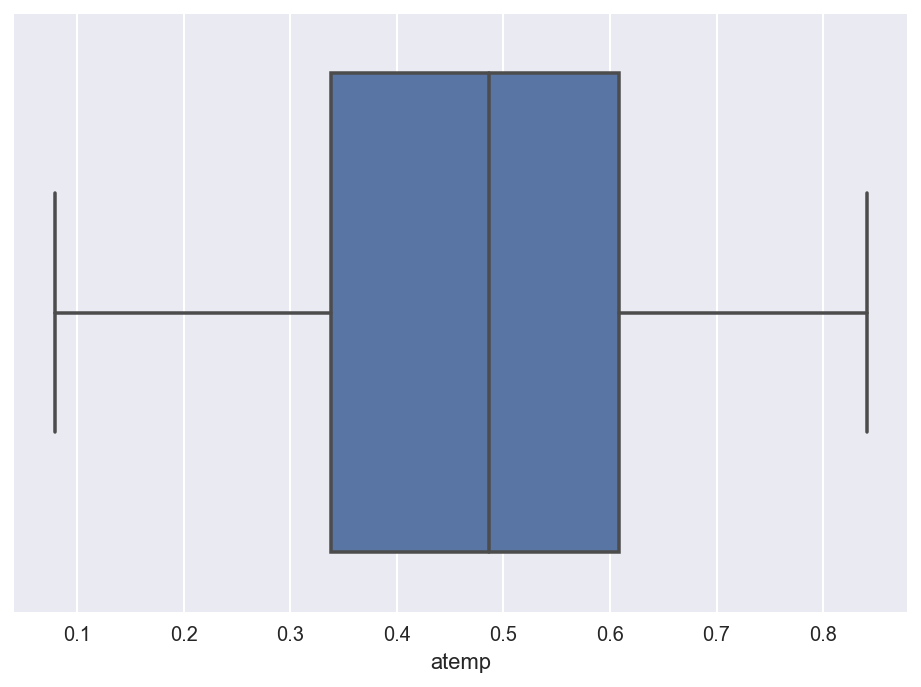

hum  Box Plot


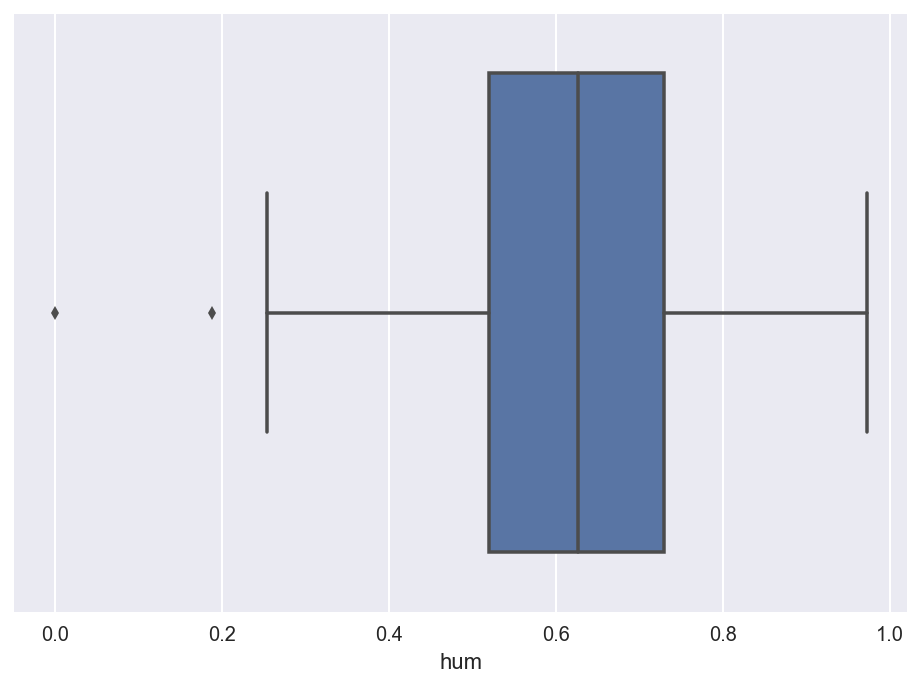

windspeed  Box Plot


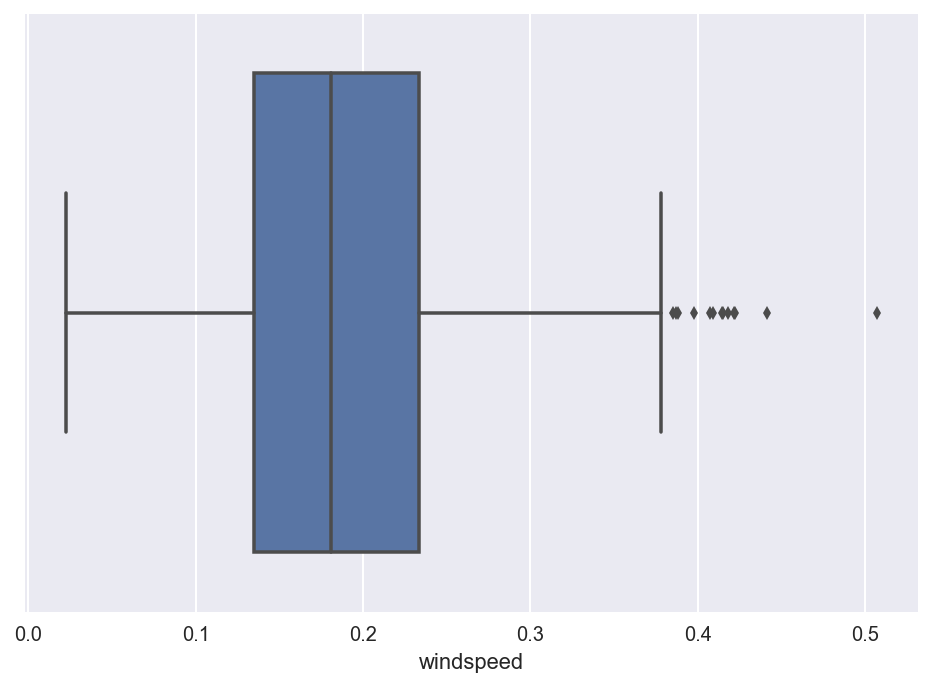

In [299]:
for cols in day[number_features_day]:
    sns.boxplot(day[cols])
    print(cols,' Box Plot')
    plt.show()

In [300]:
iqr = day['windspeed'].quantile(0.75) - day['windspeed'].quantile(0.25)

lb = day['windspeed'].quantile(0.25) - (1.5*iqr)
print(lb)
ub = day['windspeed'].quantile(0.75) + (1.5*iqr)
print(ub)
print("no.of outliers in hum lb",day[day['windspeed']<lb].shape[0])
print("no.of outliers in hum ub",day[day['windspeed']>ub].shape[0])

-0.012446750000000034
0.38061125
no.of outliers in hum lb 0
no.of outliers in hum ub 13


# B.	Apply correlation plot and display with color code and numerical indication

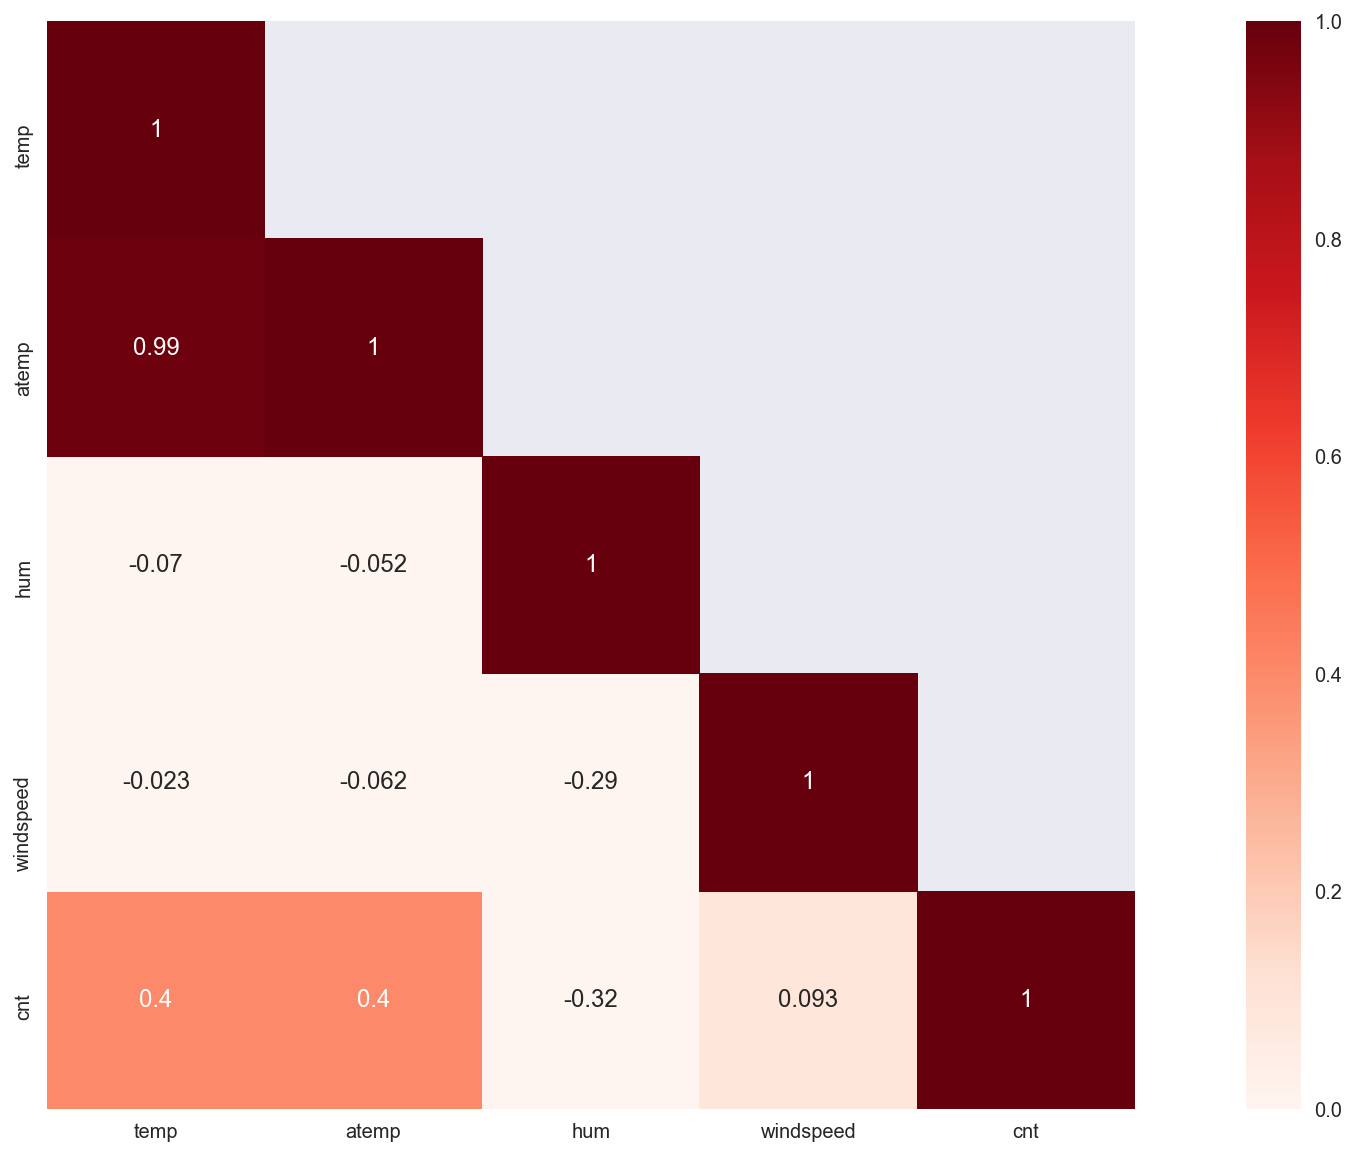

In [250]:
matrix = hr[number_features + target].corr()
heat = np.array(matrix)
heat[np.tril_indices_from(heat)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.set(font_scale=1.0)
sns.heatmap(matrix, mask=heat,vmax=1.0, vmin=0.0, square=True,annot=True, cmap="Reds")

# C.	Plot best X with Y and find how the Y is varying with X. Like if X is continuous, go for scatter plot. if X is categorical, go for box plot.

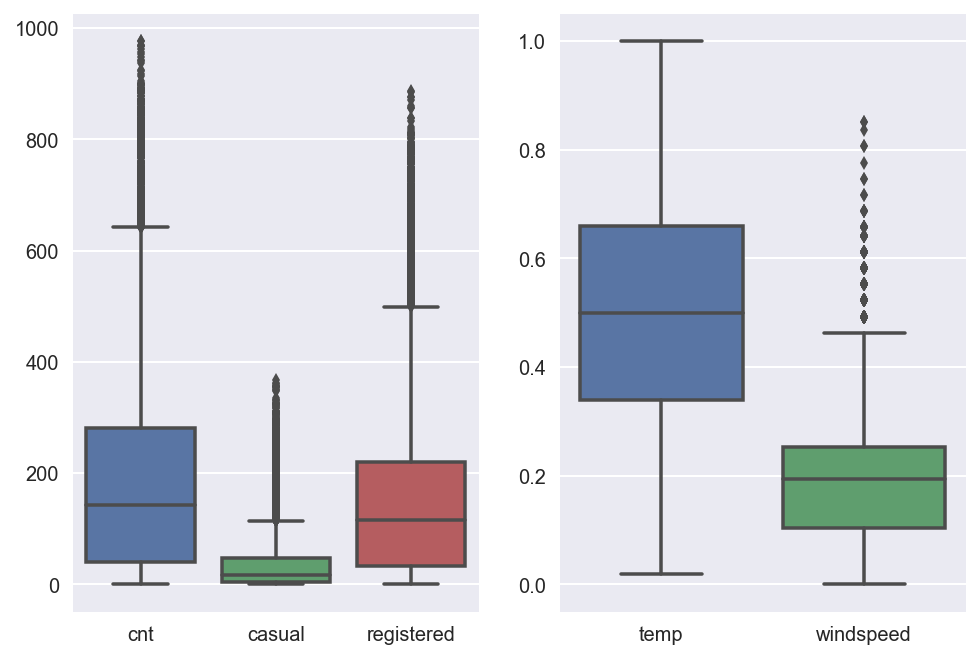

In [251]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.boxplot(data=hr[['cnt',
                          'casual',
                          'registered']],ax=ax1)
sns.boxplot(data=hr[['temp',
                          'windspeed']],ax=ax2)

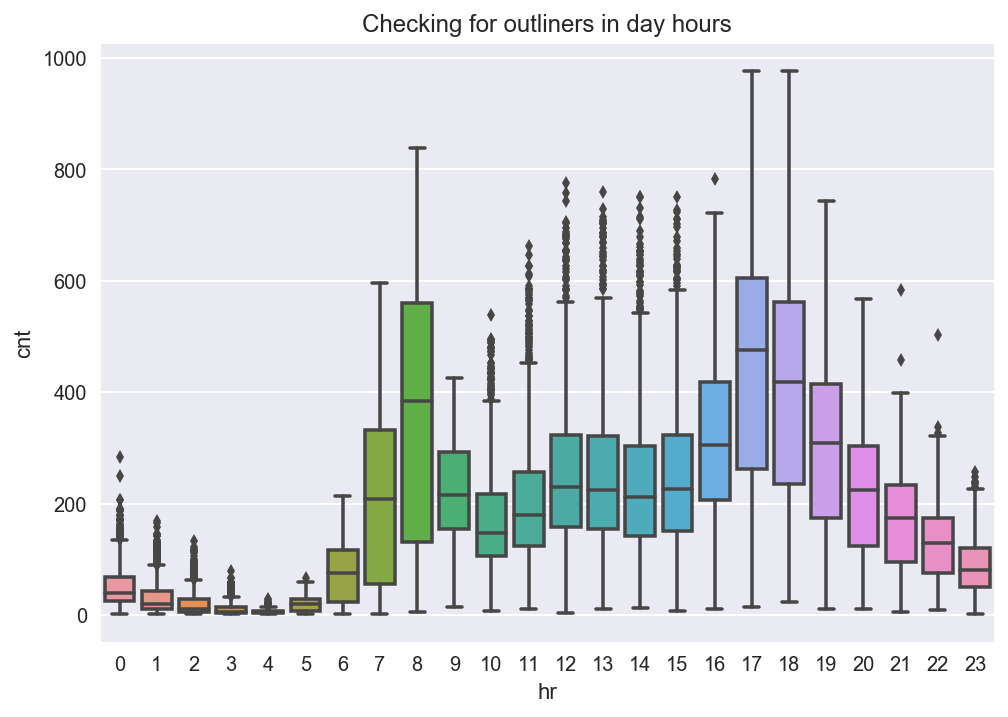

In [252]:
fig,ax = plt.subplots()
sns.boxplot(data=hr[['cnt',
                          'hr']],x='hr',y='cnt',ax=ax)
ax.set(title="Checking for outliners in day hours")

# UNIVARIATE ANALYSIS

In [221]:
hr["season"].describe()

count    17379.000000
mean         2.501640
std          1.106918
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: season, dtype: float64

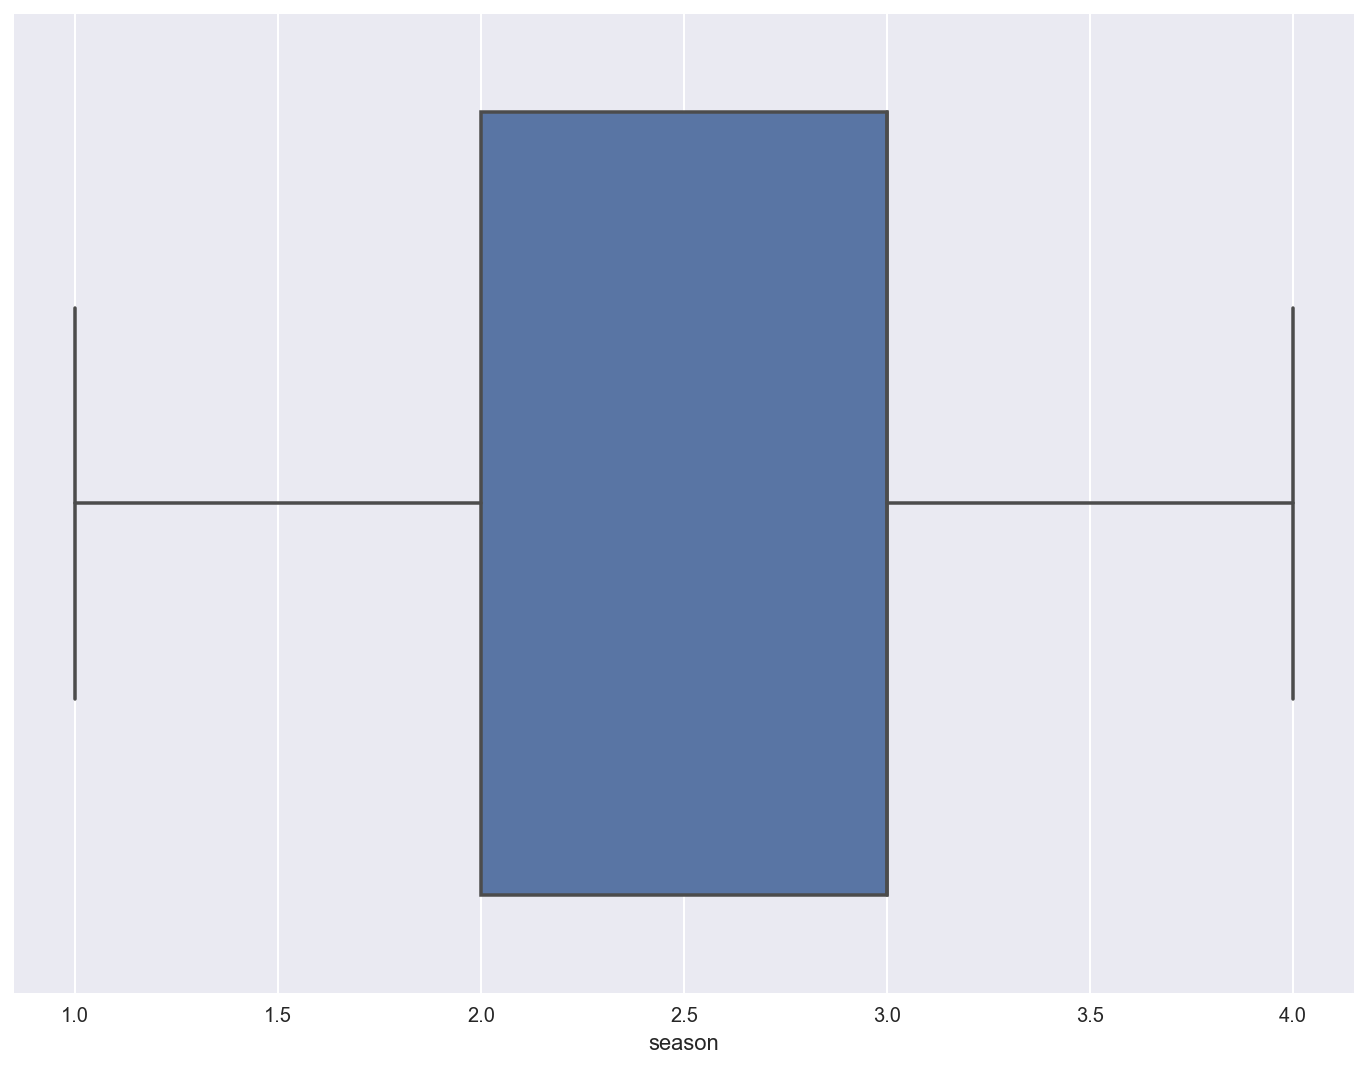

In [222]:
# Boxplot for 'Season'
sns.boxplot(hr["season"])
plt.show()

# No outliers are present in the Season

In [223]:
# let us consider season.
hr.season.value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

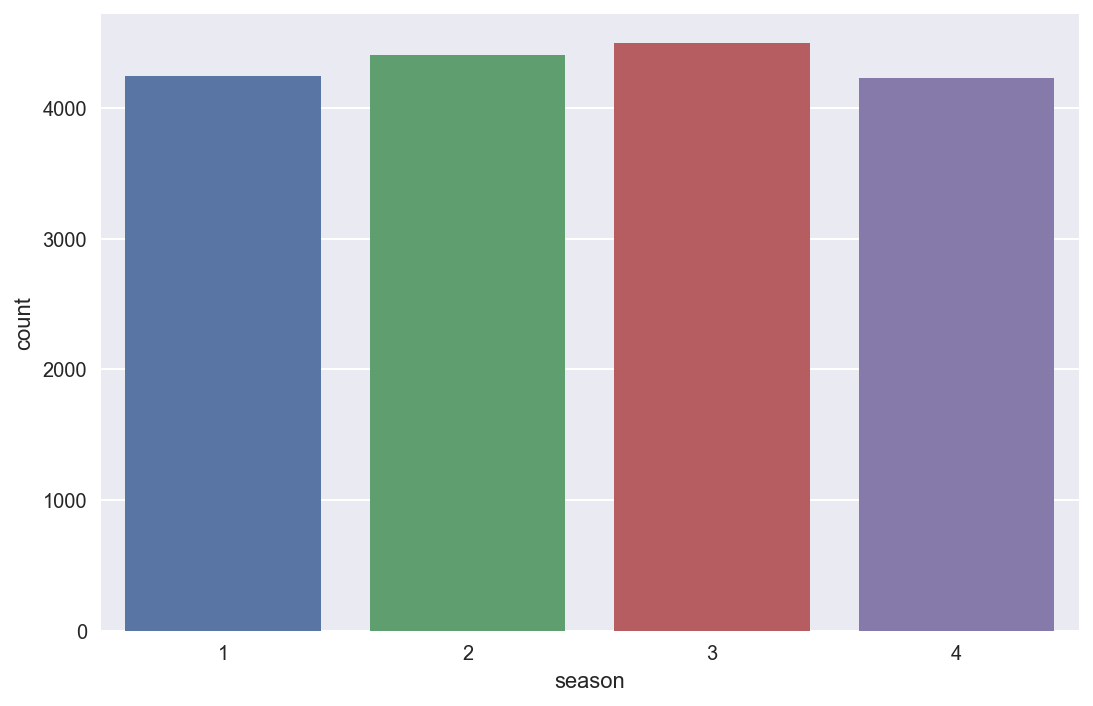

In [224]:
#sns.factorplot(x='season',data=df,kind='count',size=5,aspect=1)
sns.factorplot(x='season',data=hr,kind='count',size=5,aspect=1.5)

# Month

In [225]:
hr["mnth"].describe()

count    17379.000000
mean         6.537775
std          3.438776
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: mnth, dtype: float64

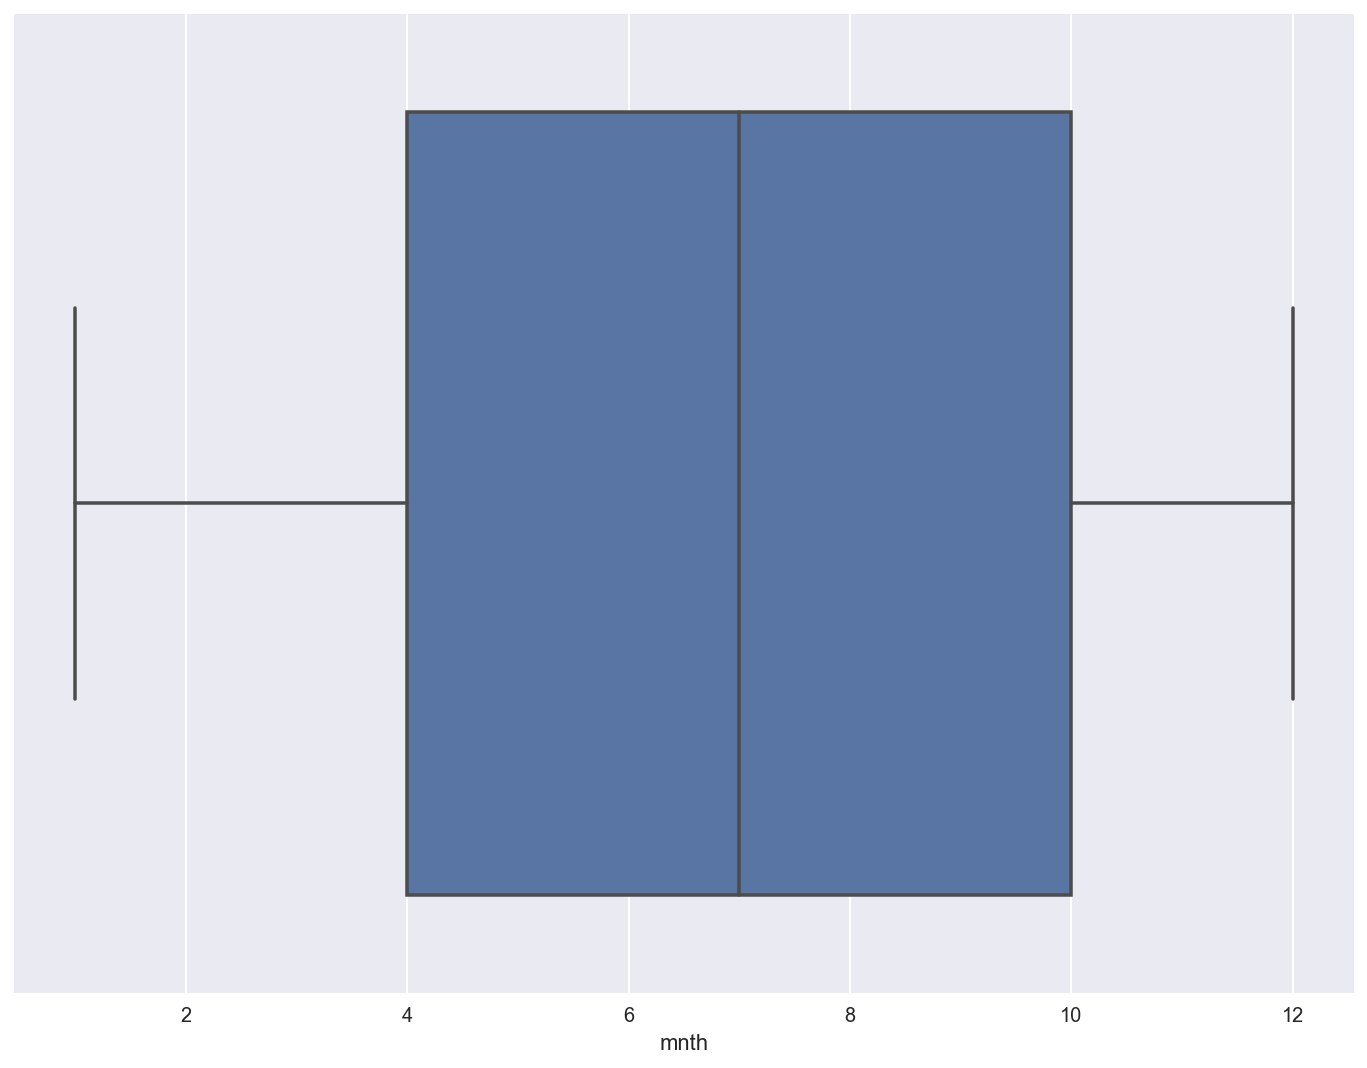

In [226]:
# Boxplot for 'Month'
sns.boxplot(hr["mnth"])
plt.show()

# Temp

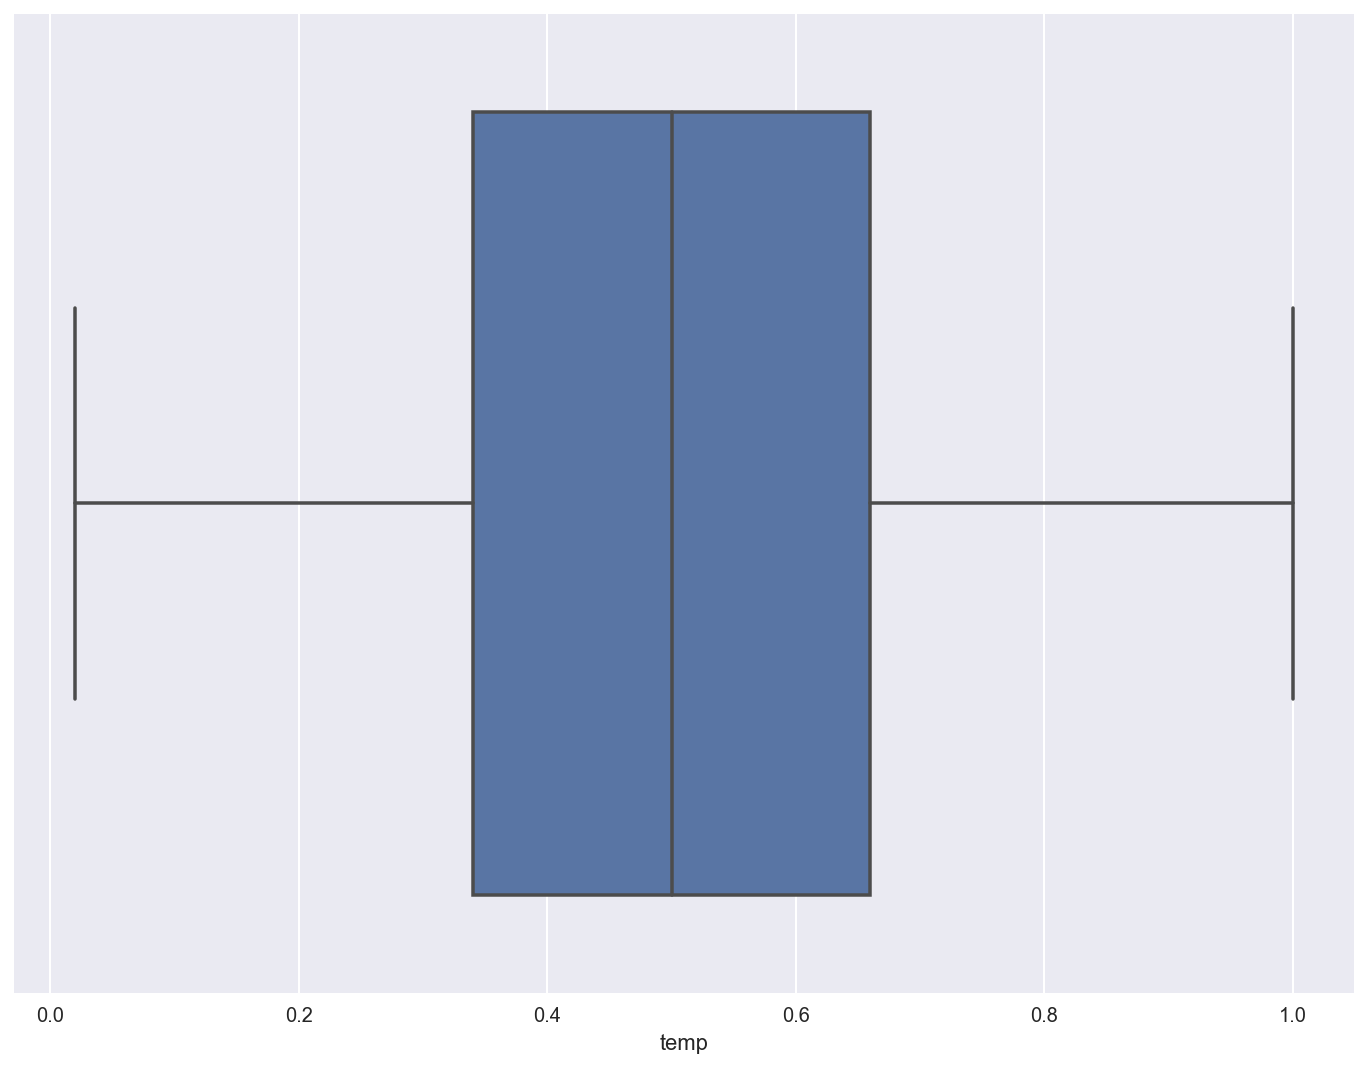

In [228]:
sns.boxplot(hr["temp"])
plt.show()

#No outliers

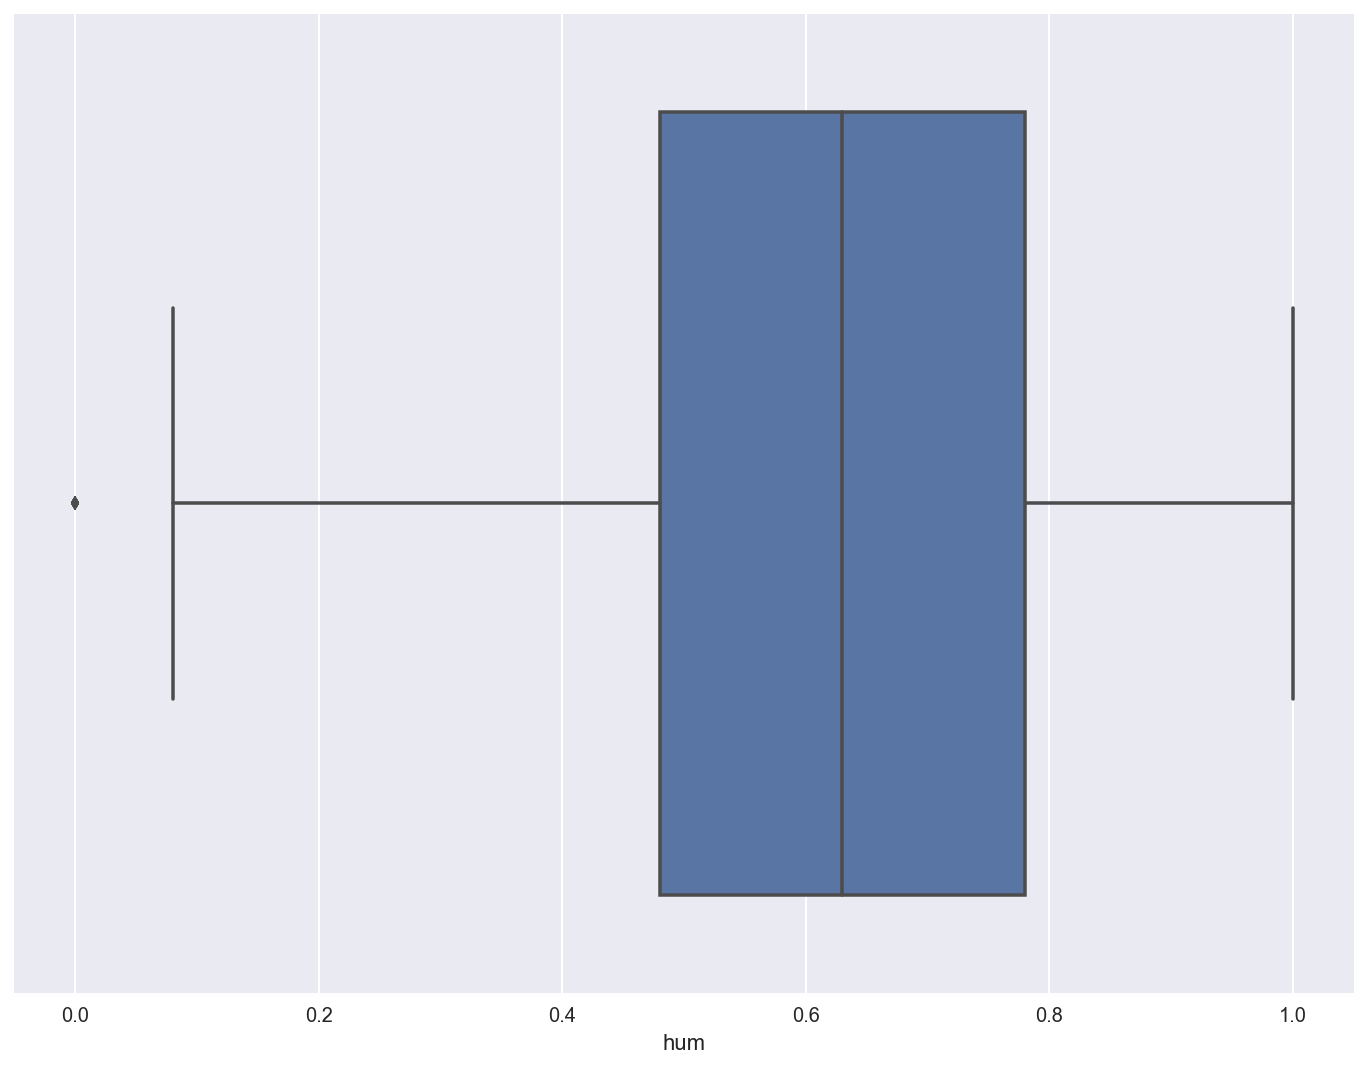

In [229]:
sns.boxplot(hr["hum"])
plt.show()

# Windspeed


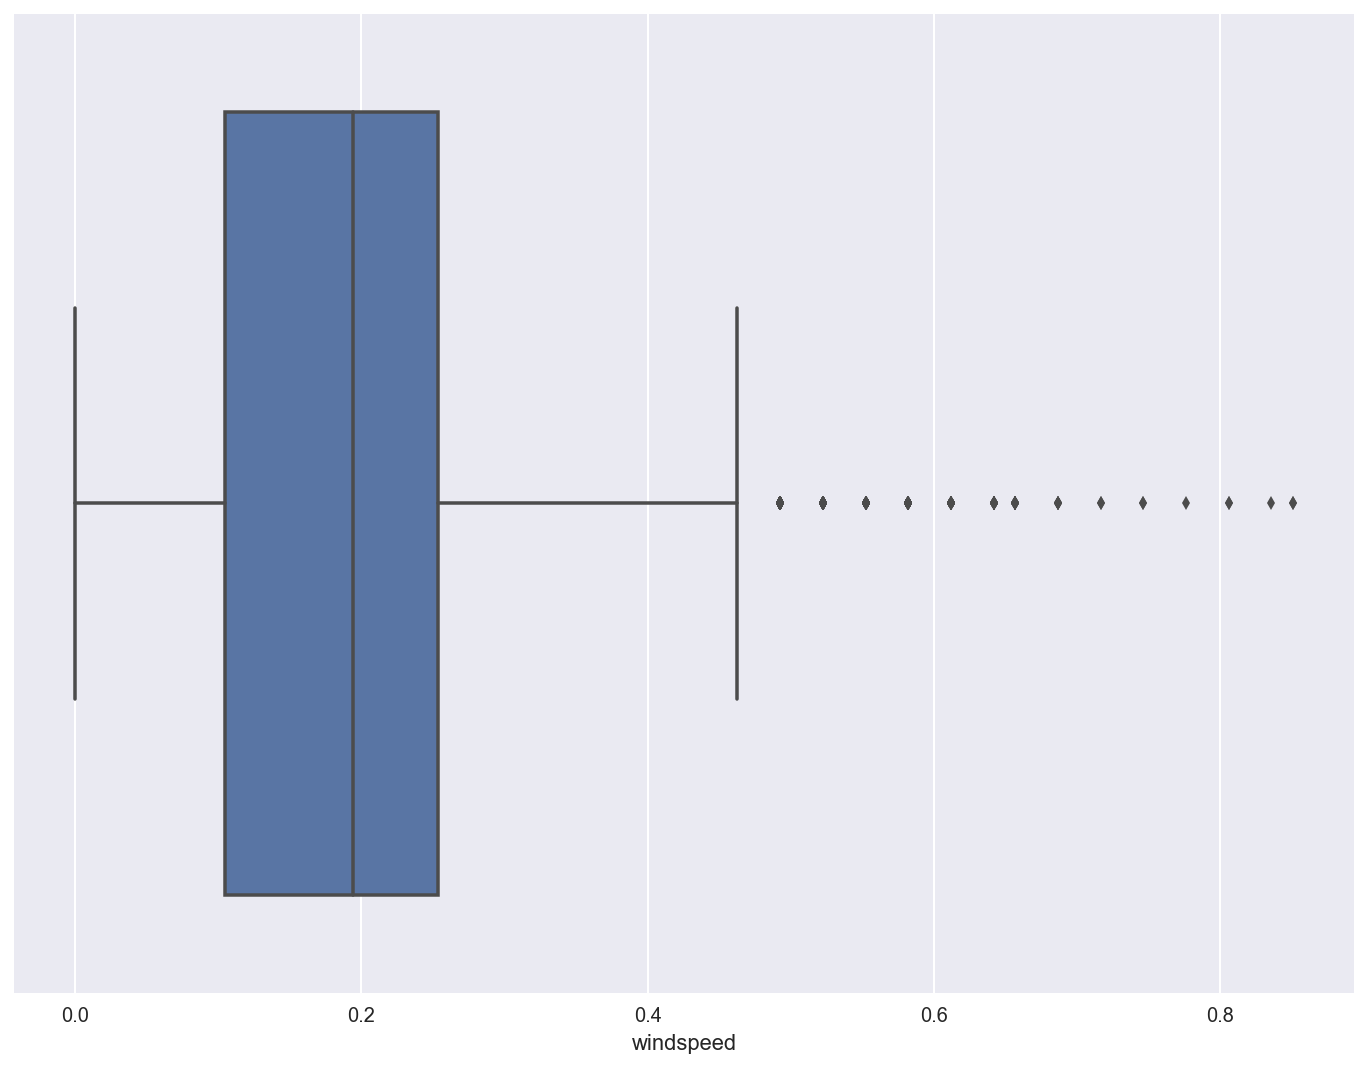

In [230]:
sns.boxplot(hr["windspeed"])
plt.show()

In [279]:
iqr = dy['hum'].quantile(0.75) - dy['hum'].quantile(0.25)

lb = dy['hum'].quantile(0.25) - (1.5*iqr)
print(lb)
ub = dy['hum'].quantile(0.75) + (1.5*iqr)
print(ub)
print("no.of outliers in hum lb",dy[dy['hum']<lb].shape[0])
print("no.of outliers in hum ub",dy[dy['hum']>ub].shape[0])

0.20468725
1.0455212500000002
no.of outliers in hum lb 2
no.of outliers in hum ub 0


In [280]:
iqr = dy['windspeed'].quantile(0.75) - dy['windspeed'].quantile(0.25)

lb = dy['windspeed'].quantile(0.25) - (1.5*iqr)
print(lb)
ub = dy['windspeed'].quantile(0.75) + (1.5*iqr)
print(ub)
print("no.of outliers in hum lb",dy[dy['windspeed']<lb].shape[0])
print("no.of outliers in hum ub",dy[dy['windspeed']>ub].shape[0])

-0.012446750000000034
0.38061125
no.of outliers in hum lb 0
no.of outliers in hum ub 13


# Correlation


In [281]:
category_features_hour = ['season', 'holiday', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit']
number_features_hour = ['temp', 'atemp', 'hum', 'windspeed']

features_hour = category_features + number_features
target_hour = ['cnt']

In [283]:
X_hour = hr[features_hour]
y_hour = hr[target_hour]

In [285]:
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_hour,y_hour,test_size=0.30,random_state=42)

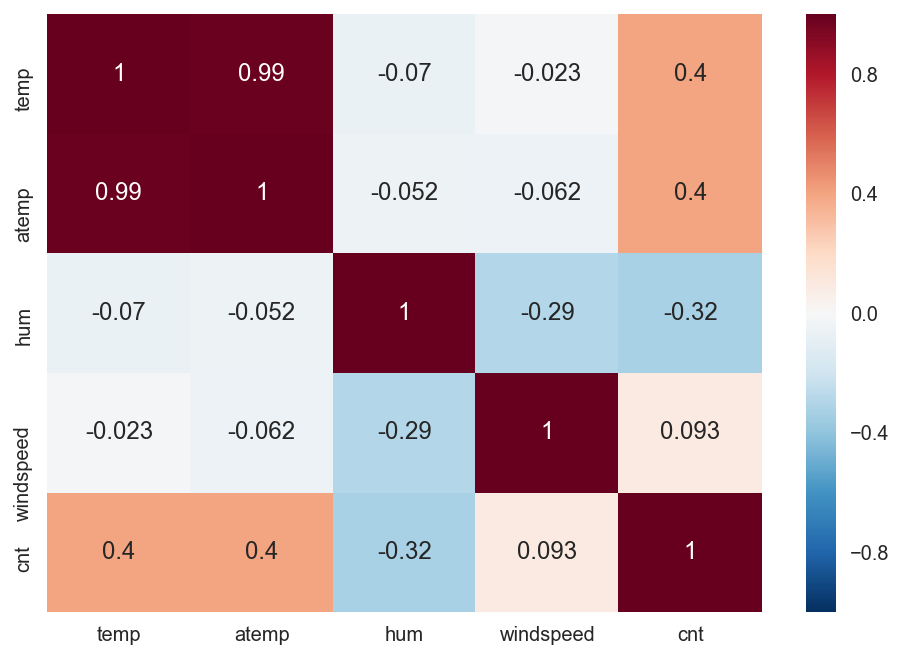

In [284]:
sns.heatmap(hr[number_features_hour + target_hour].corr(), annot=True)

# Day Data Set

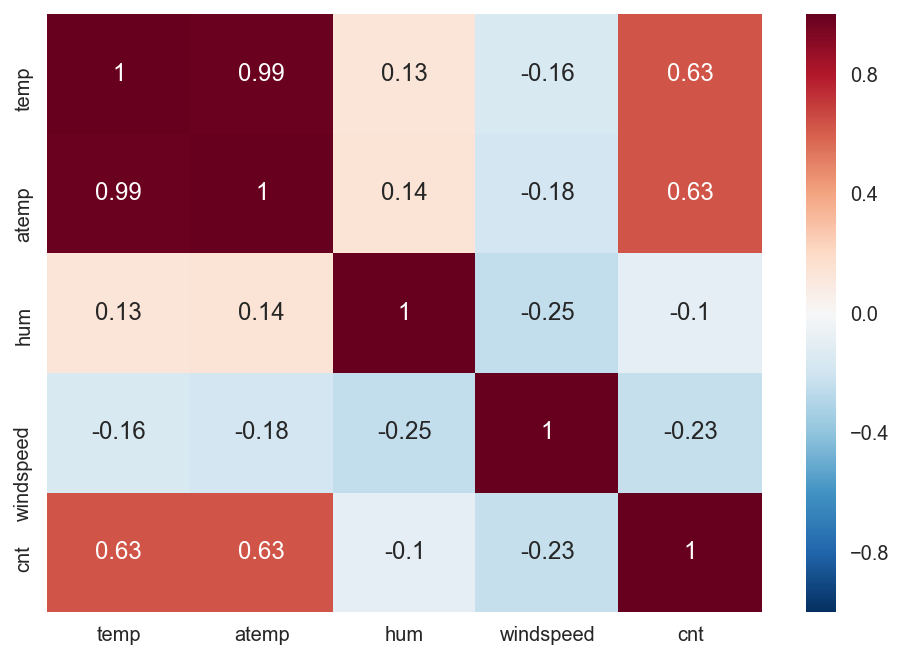

In [301]:
sns.heatmap(day[number_features_day + target_day].corr(), annot=True)

#Outliers detected in winsdspeed colum

# D.	Apply density plot and check if the data is normally distributed

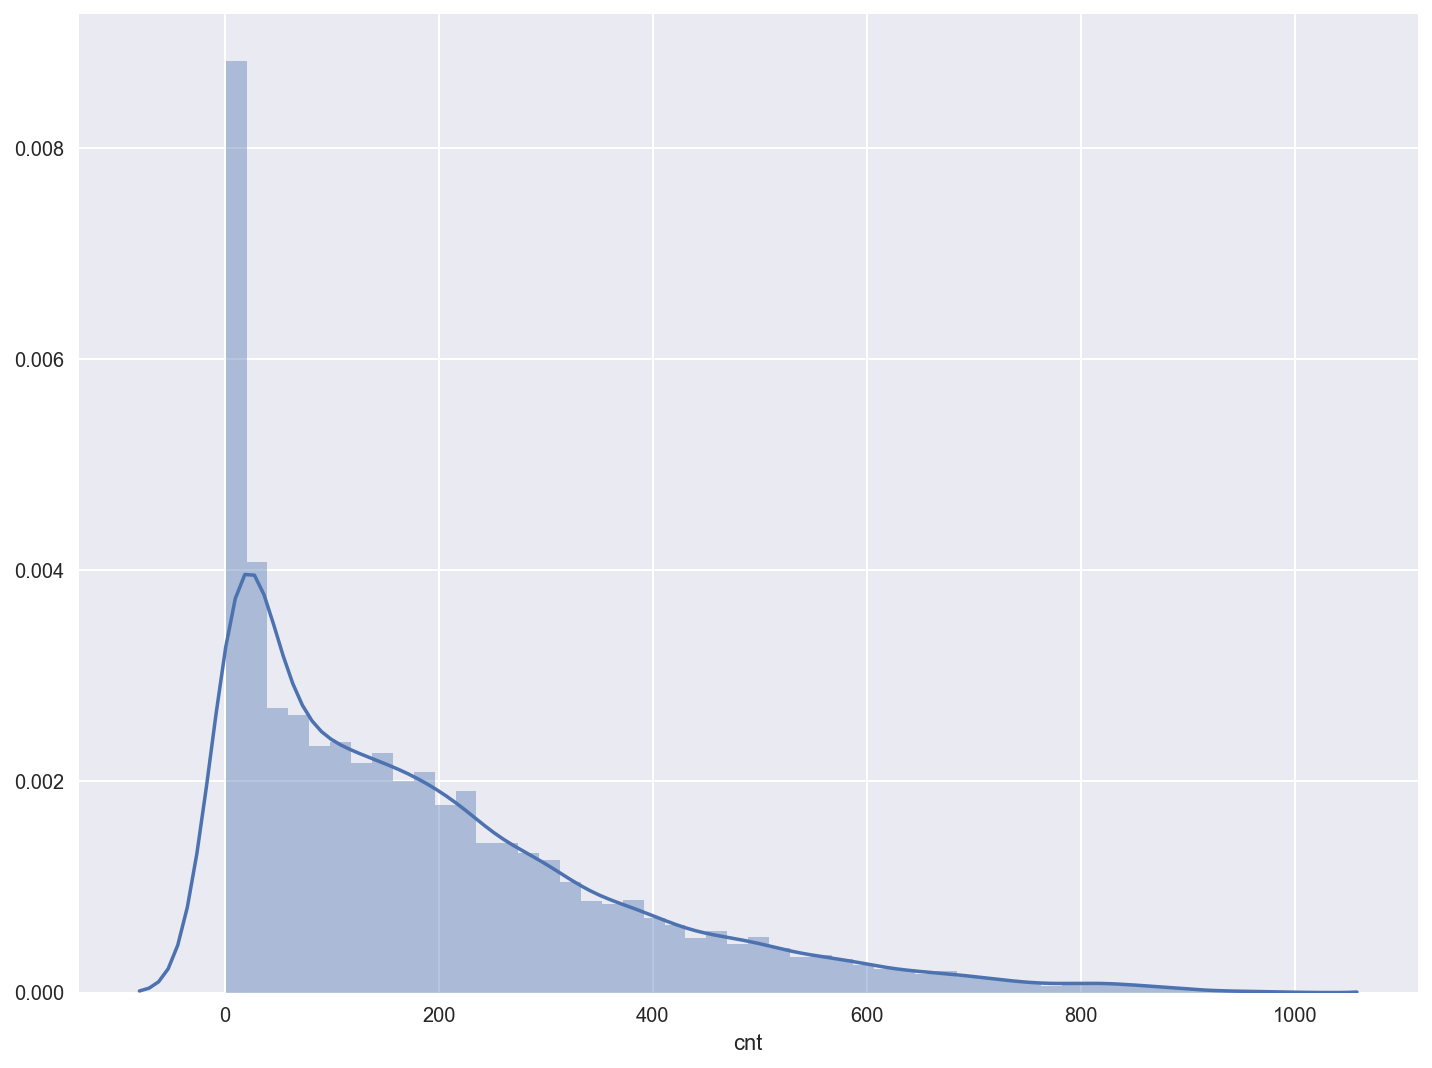

In [231]:
sns.distplot(hr[target[-1]]);

Samples in train set with outliers: 17379
Samples in train set without outliers: 16874


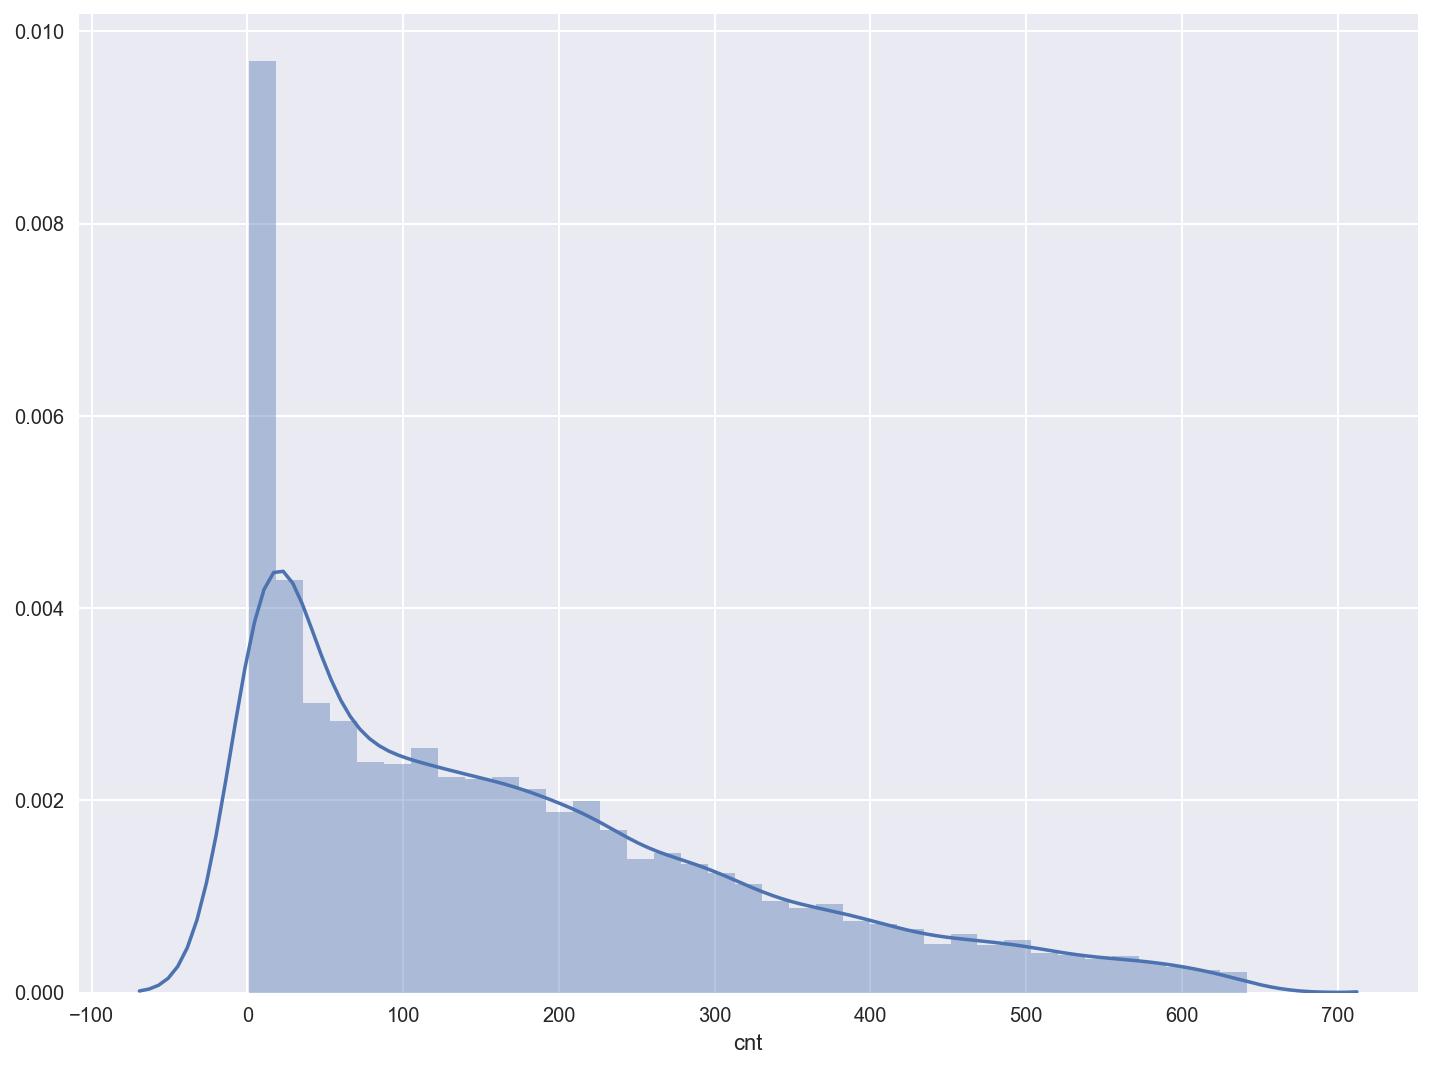

In [232]:
print("Samples in train set with outliers: {}".format(len(hr)))
q1 = hr.cnt.quantile(0.25)
q3 = hr.cnt.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 
hr_preprocessed = hr.loc[(hr.cnt >= lower_bound) & (hr.cnt <= upper_bound)]
print("Samples in train set without outliers: {}".format(len(hr_preprocessed)))
sns.distplot(hr_preprocessed.cnt);

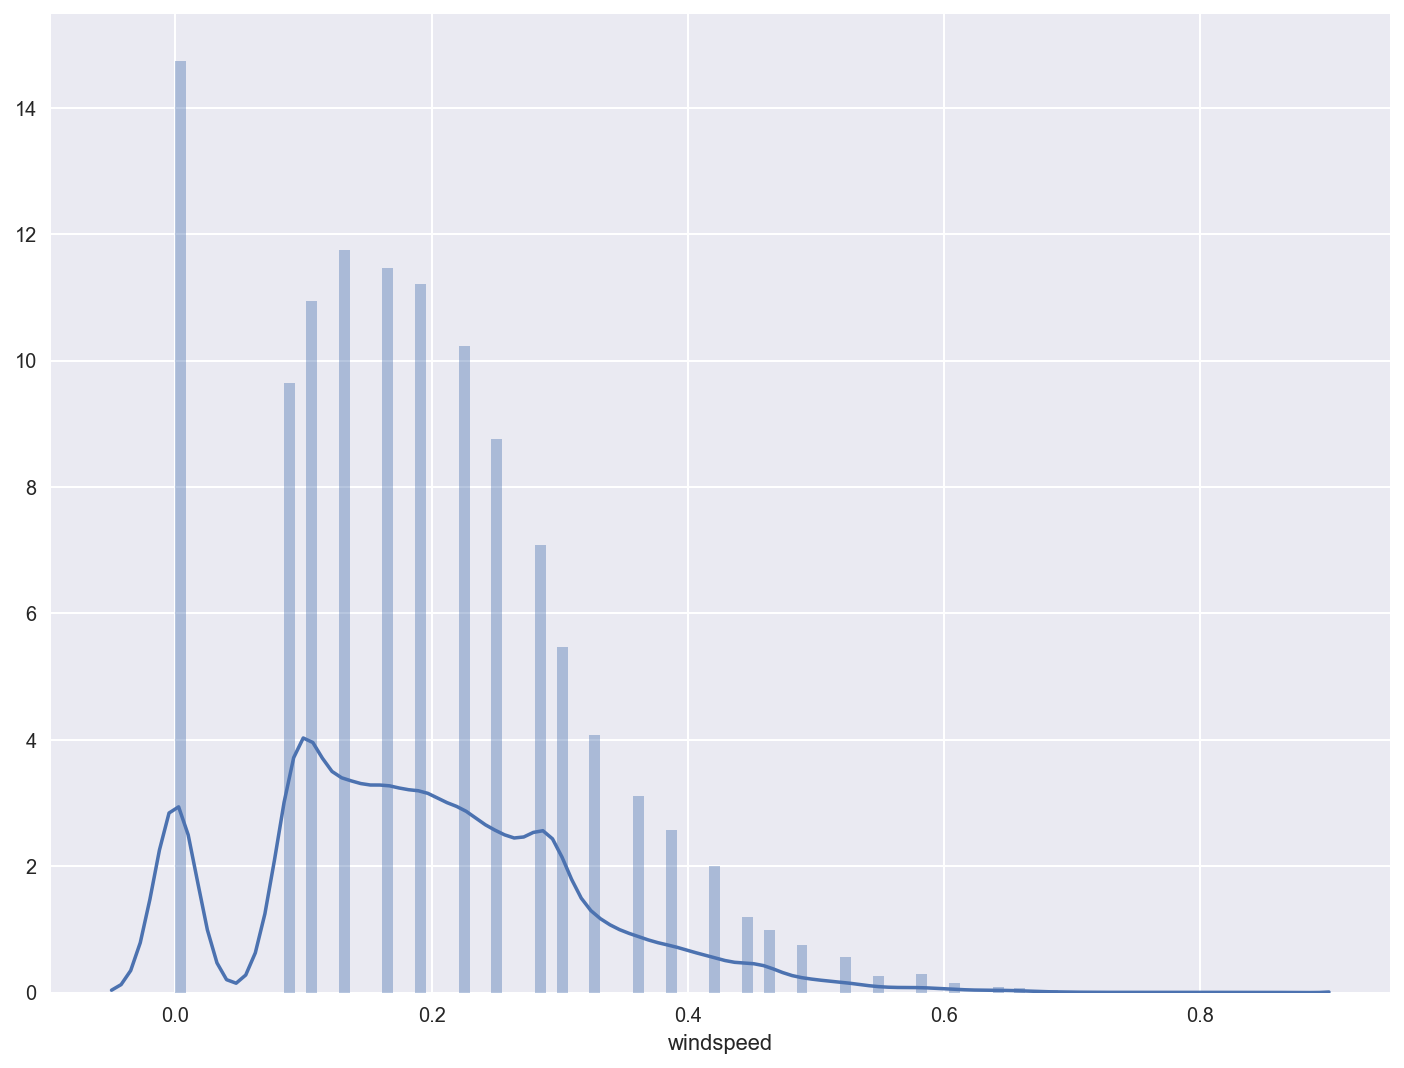

In [233]:
sns.distplot(hr.windspeed, bins=100)
plt.show()

temp  Distribution Plot


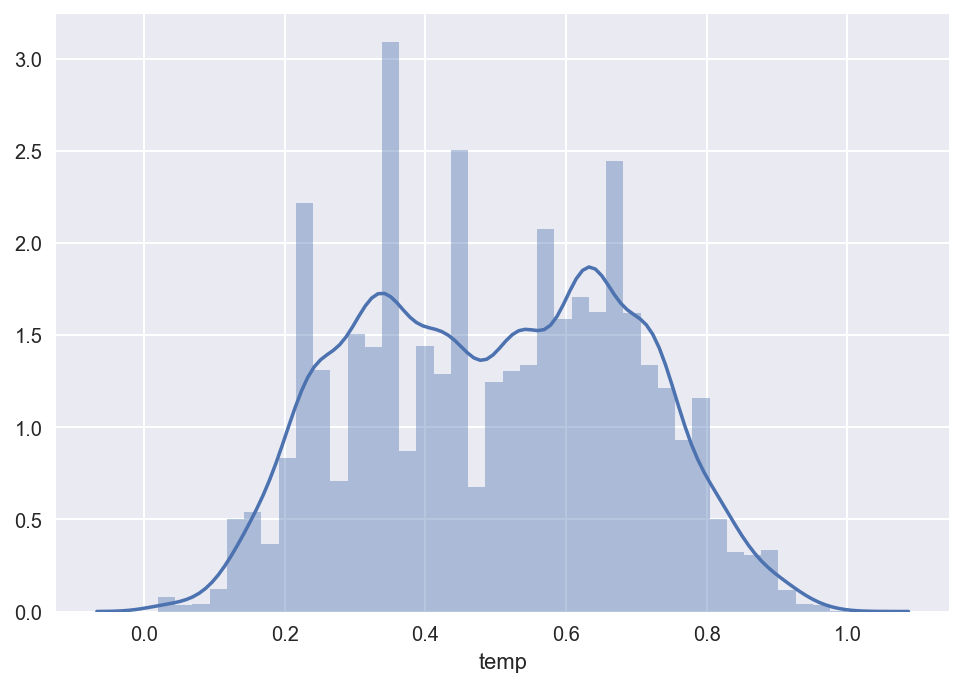

atemp  Distribution Plot


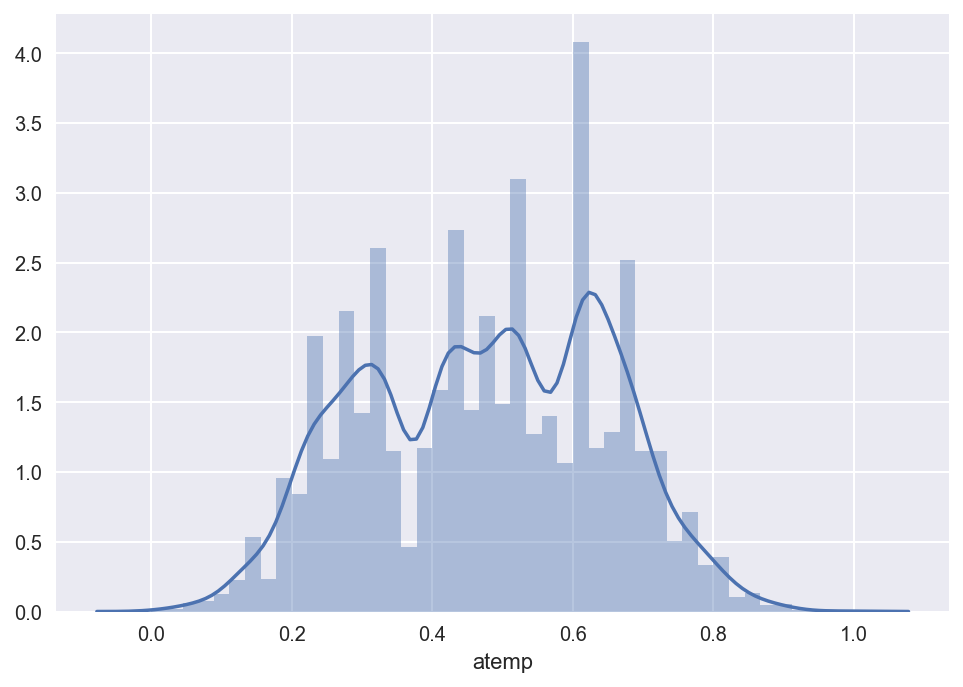

hum  Distribution Plot


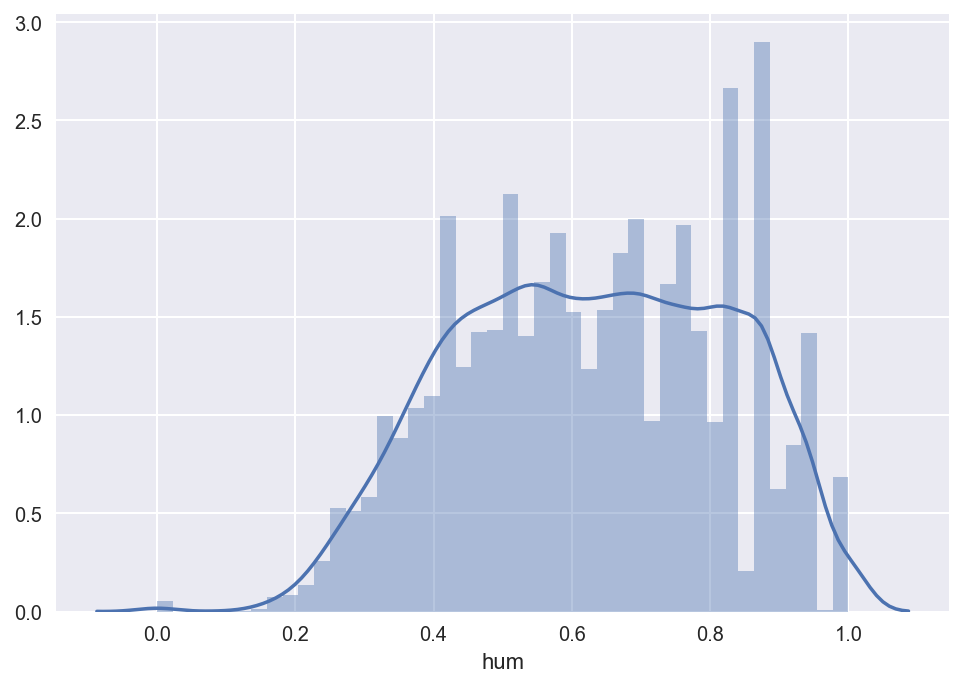

windspeed  Distribution Plot


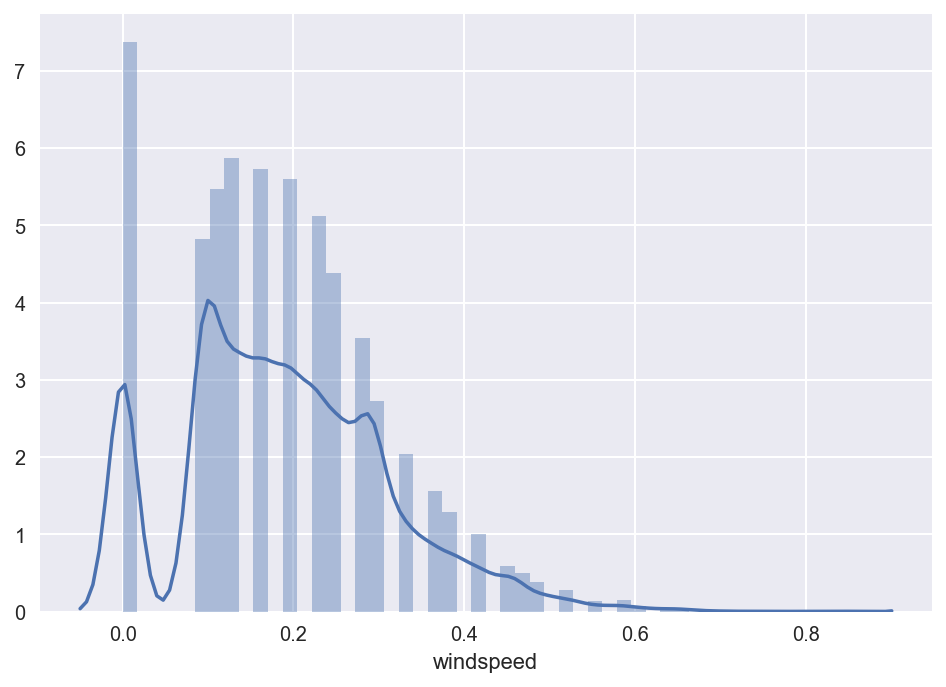

cnt  Distribution Plot


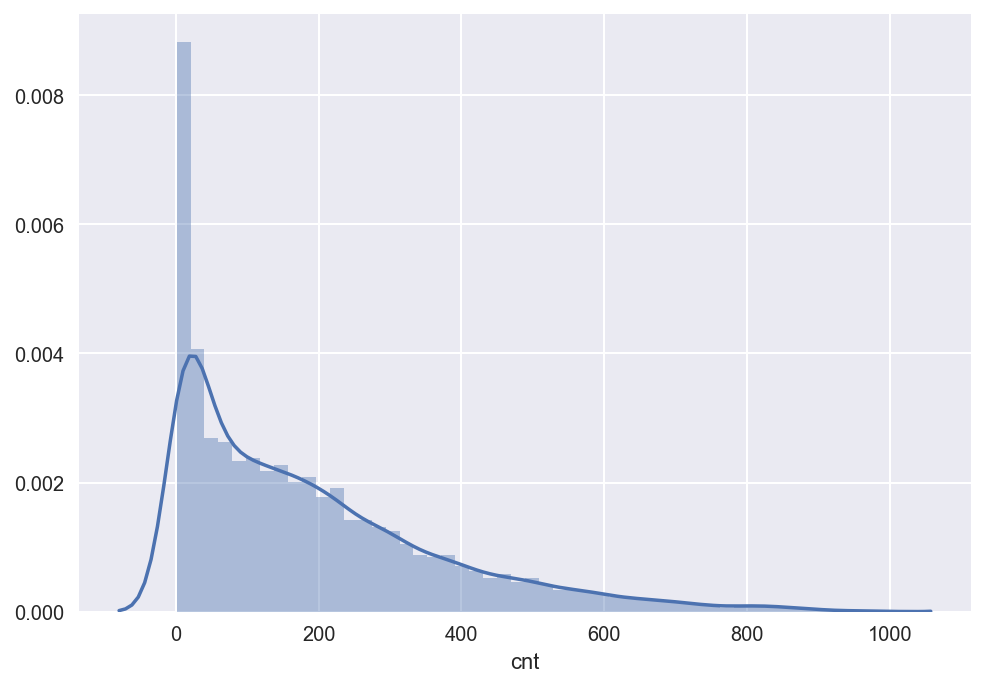

In [325]:
for cols in hr[number_features_hour + target_hour]:
    sns.distplot(hr[cols])
    print(cols,' Distribution Plot')
    plt.show()

temp scatter plot


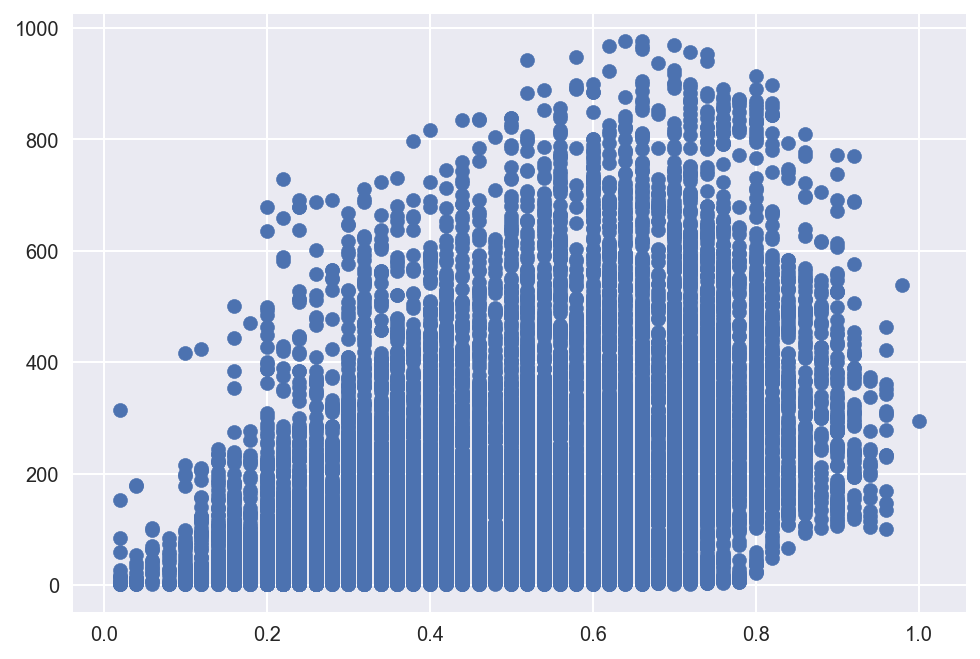

atemp scatter plot


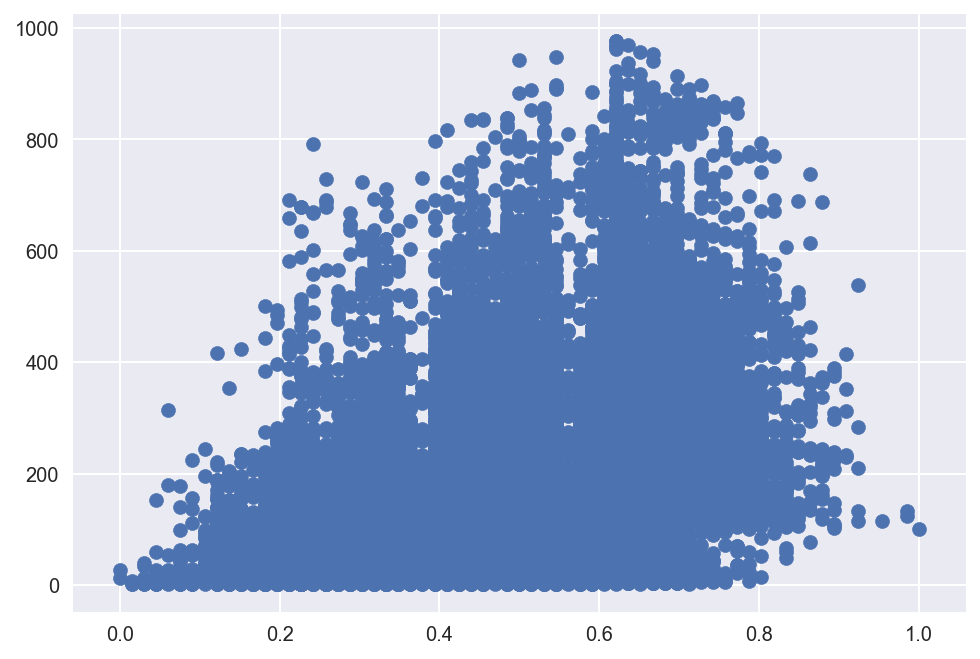

hum scatter plot


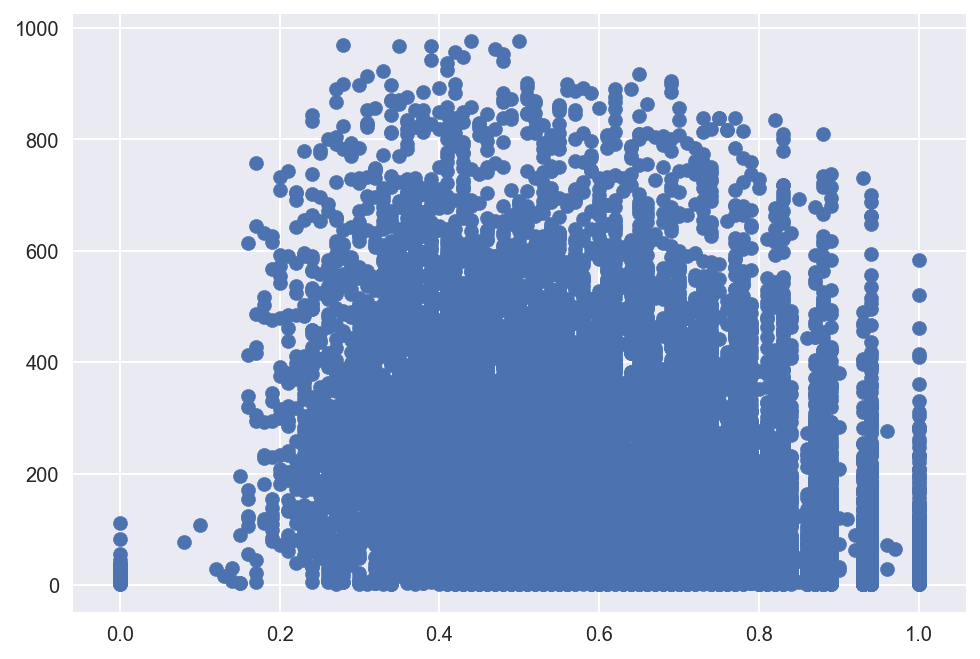

windspeed scatter plot


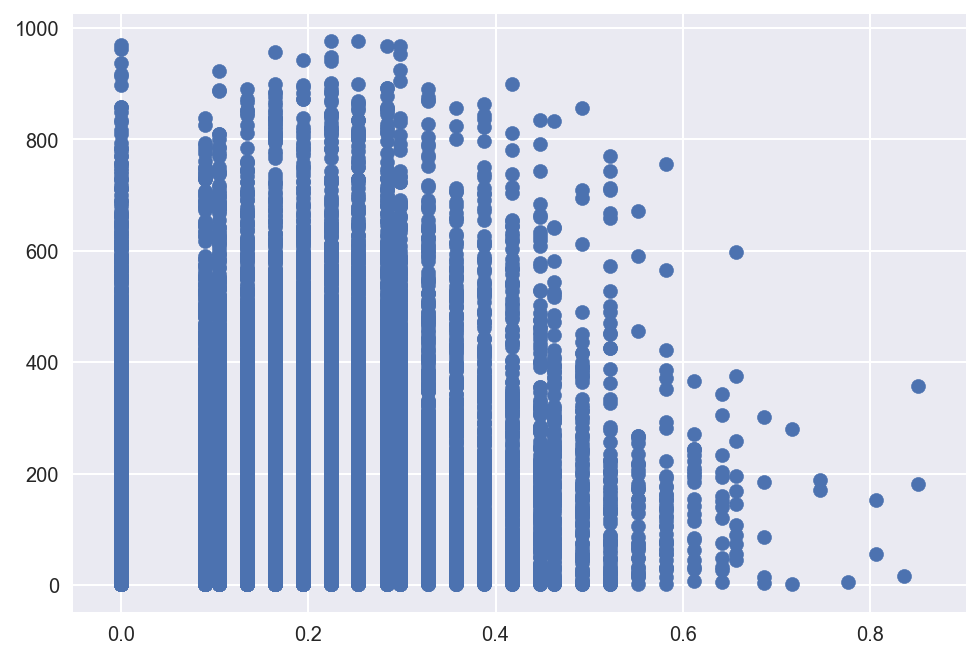

In [291]:
for cols in hr[number_features_hour]:
    plt.scatter(hr[cols],hr[target_hour])
    print(cols,'scatter plot')
    plt.show()

In [234]:
hr["windspeed"].describe()

count    17379.000000
mean         0.190098
std          0.122340
min          0.000000
25%          0.104500
50%          0.194000
75%          0.253700
max          0.850700
Name: windspeed, dtype: float64

In [235]:
upper=0.253700+(1.5*(0.253700-0.104500))
print(upper)

lower=0.104500-(1.5*(0.253700-0.104500))
print(lower)

0.4775
-0.1193


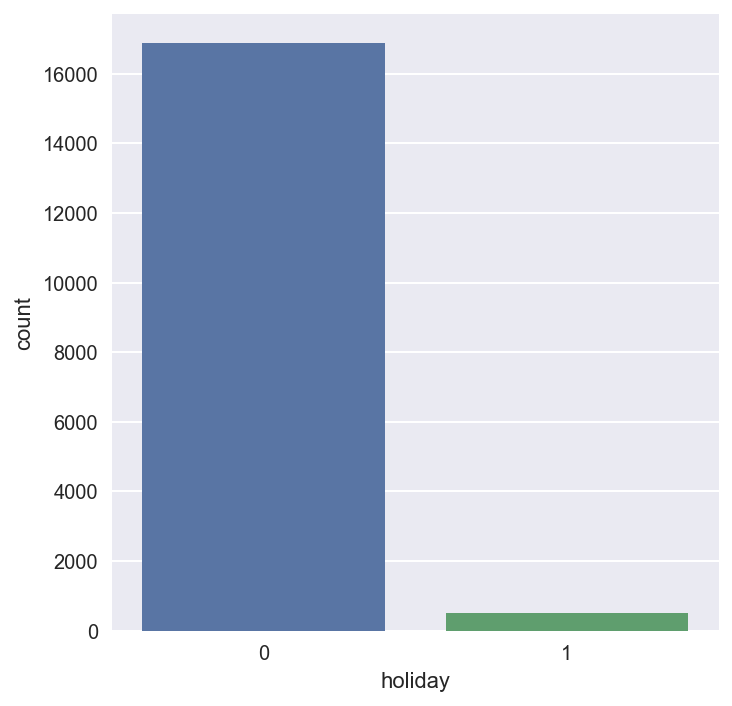

In [236]:
#holiday
hr.holiday.value_counts()
sns.factorplot(x='holiday',data=hr,kind='count',size=5,aspect=1) # majority of data is for non holiday days.

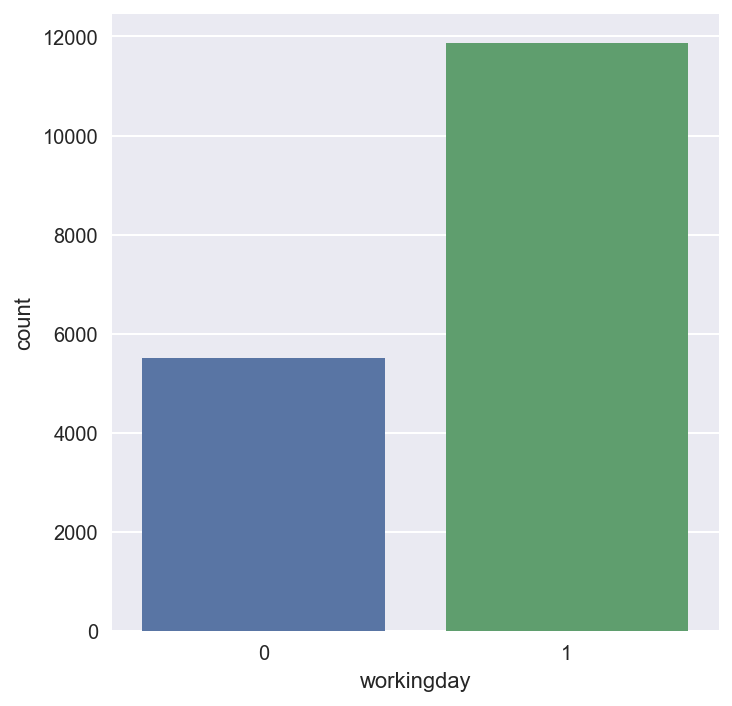

In [237]:
#holiday
hr.workingday.value_counts()
sns.factorplot(x='workingday',data=hr,kind='count',size=5,aspect=1) # majority of data is for working days.

In [238]:
#weather
hr.weathersit.value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

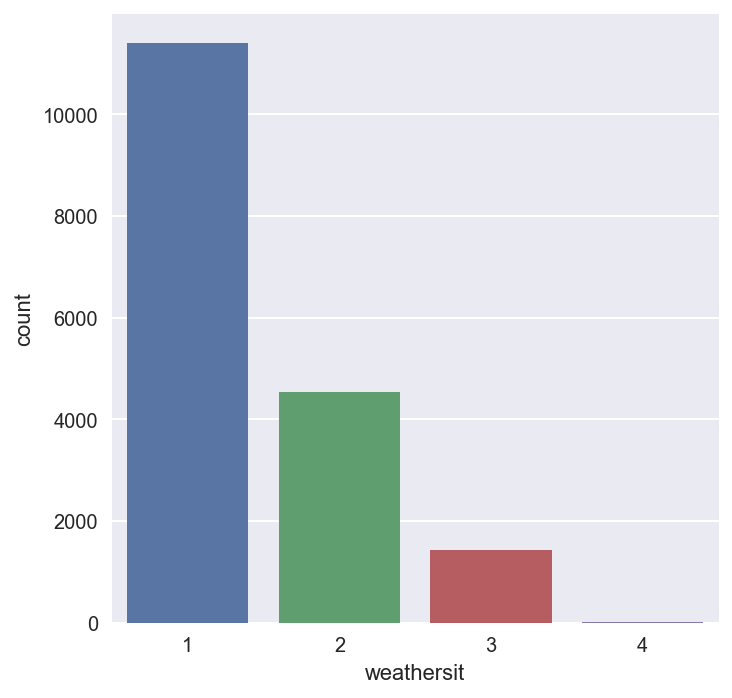

In [239]:
sns.factorplot(x='weathersit',data=hr,kind='count',size=5,aspect=1)  
# 1-> spring
# 2-> summer
# 3-> fall
# 4-> winter

# BIVARIATE ANALYSIS

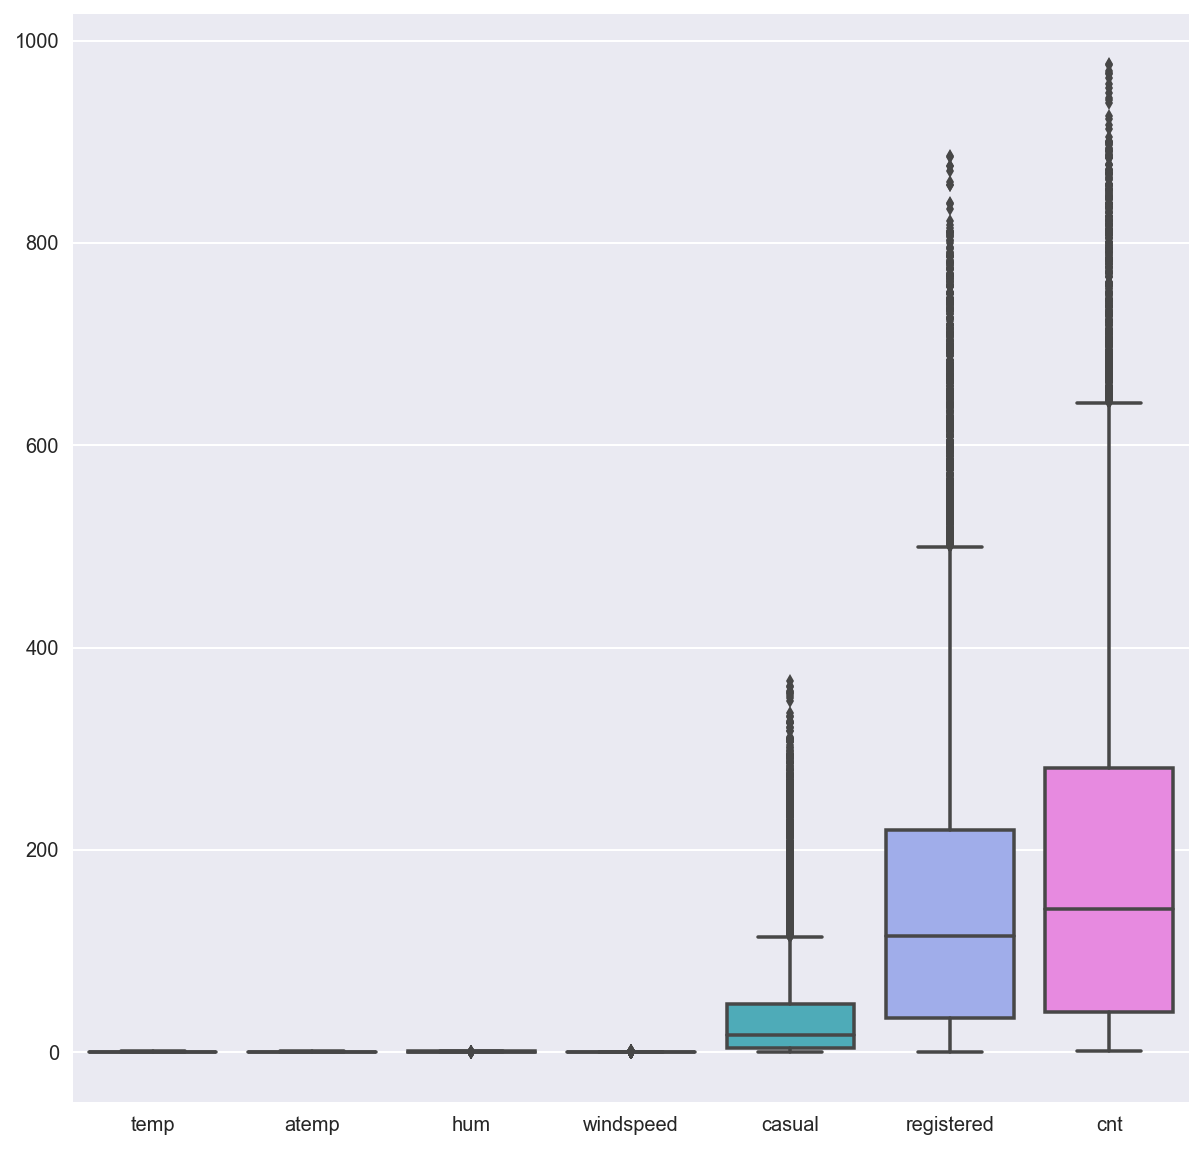

In [258]:
# just to visualize.
sns.boxplot(data=hr[['temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']])
fig=plt.gcf()
fig.set_size_inches(10,10)

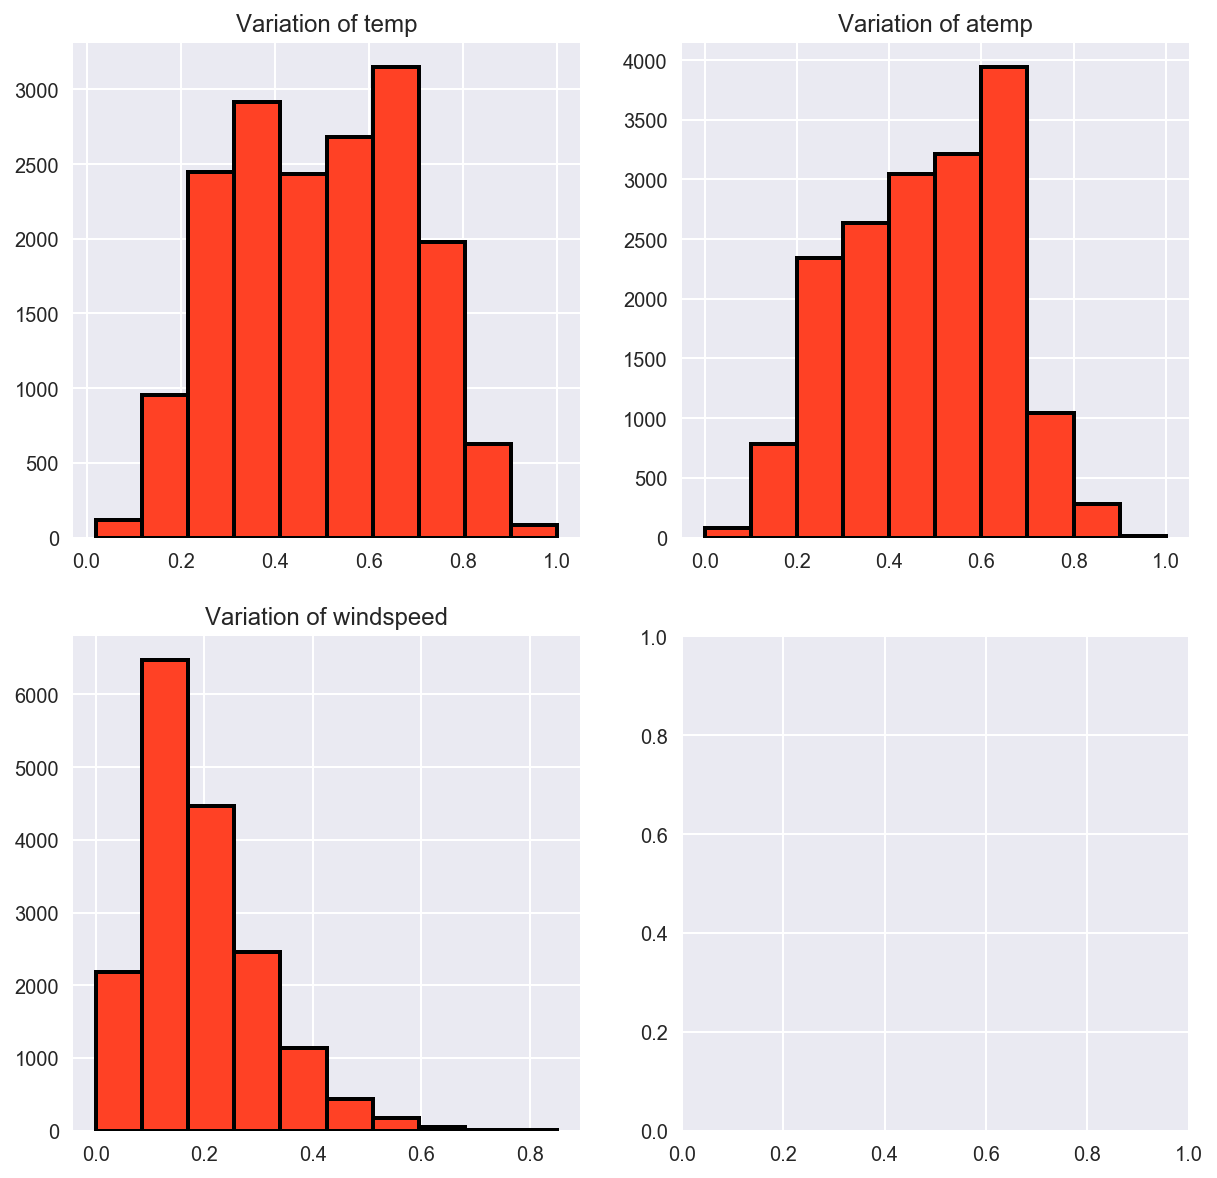

In [261]:
# can also be visulaized using histograms for all the continuous variables.
hr.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=hr,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=hr,edgecolor="black",linewidth=2,color='#ff4125')
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=hr,edgecolor="black",linewidth=2,color='#ff4125')
axes[1,0].set_title("Variation of windspeed")
fig.set_size_inches(10,10)

# Plotting for Day Data Set


temp scatter plot


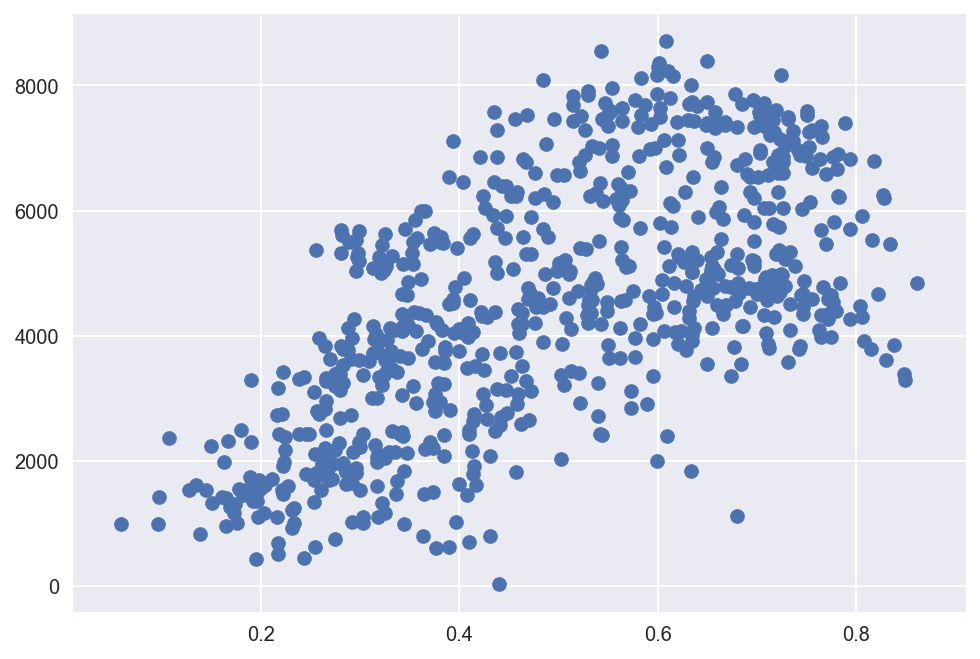

atemp scatter plot


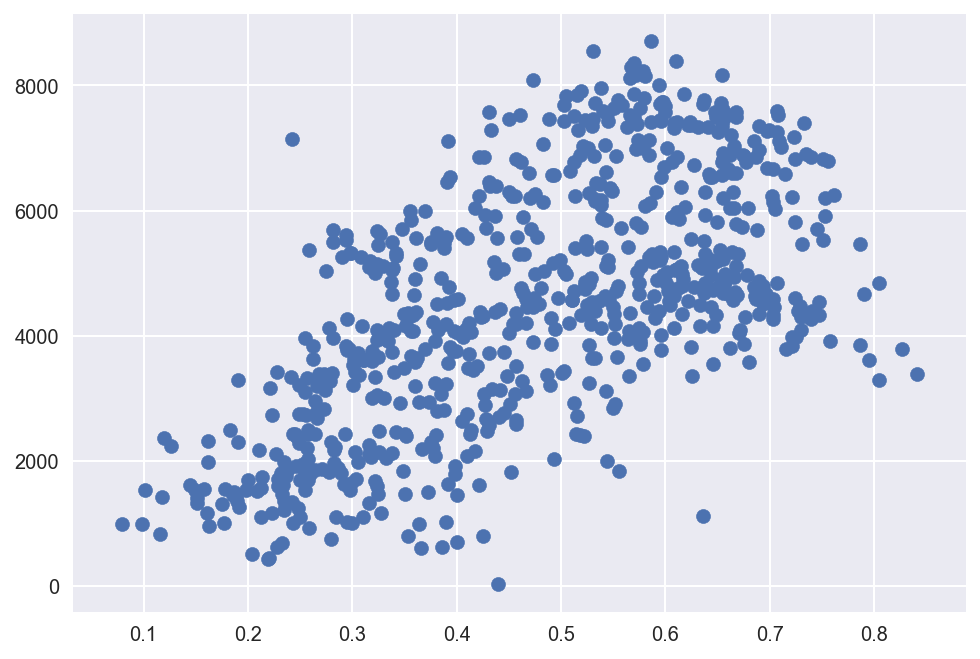

hum scatter plot


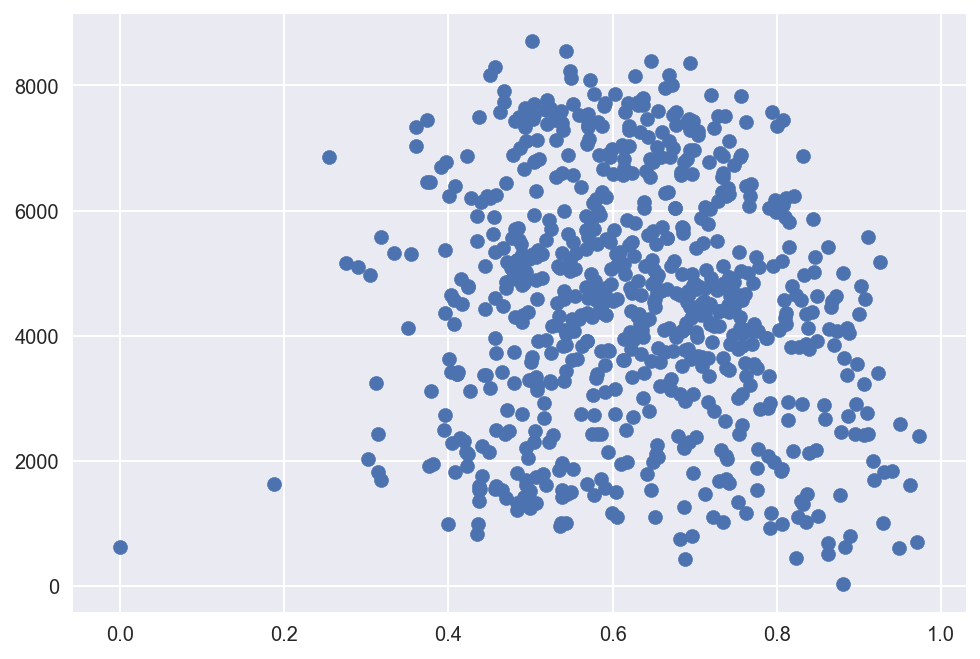

windspeed scatter plot


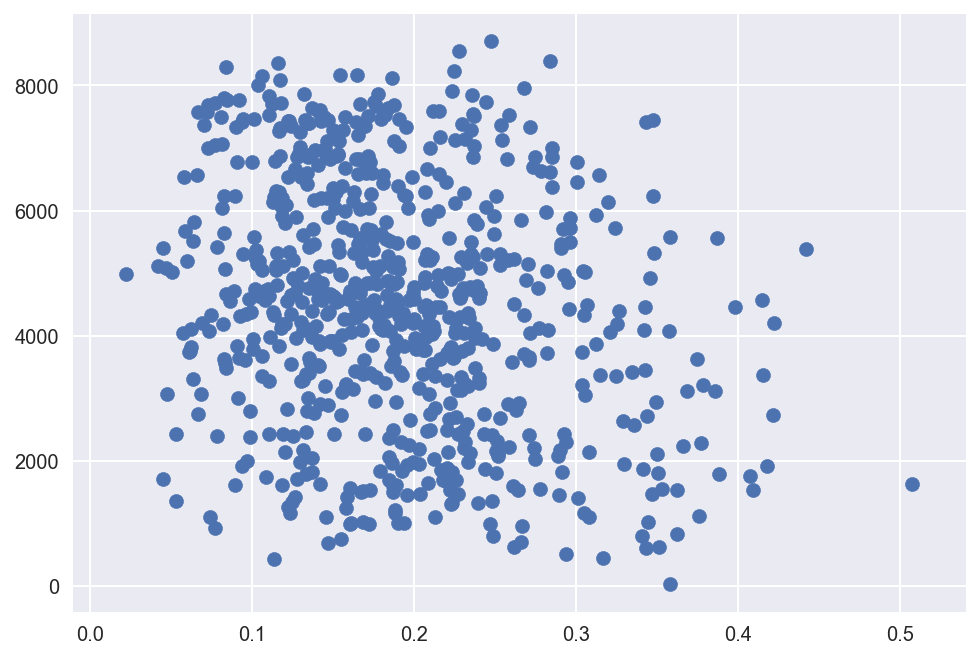

In [302]:
for cols in day[number_features_day]:
    plt.scatter(day[cols],day[target_day])
    print(cols,'scatter plot')
    plt.show()

season box plot


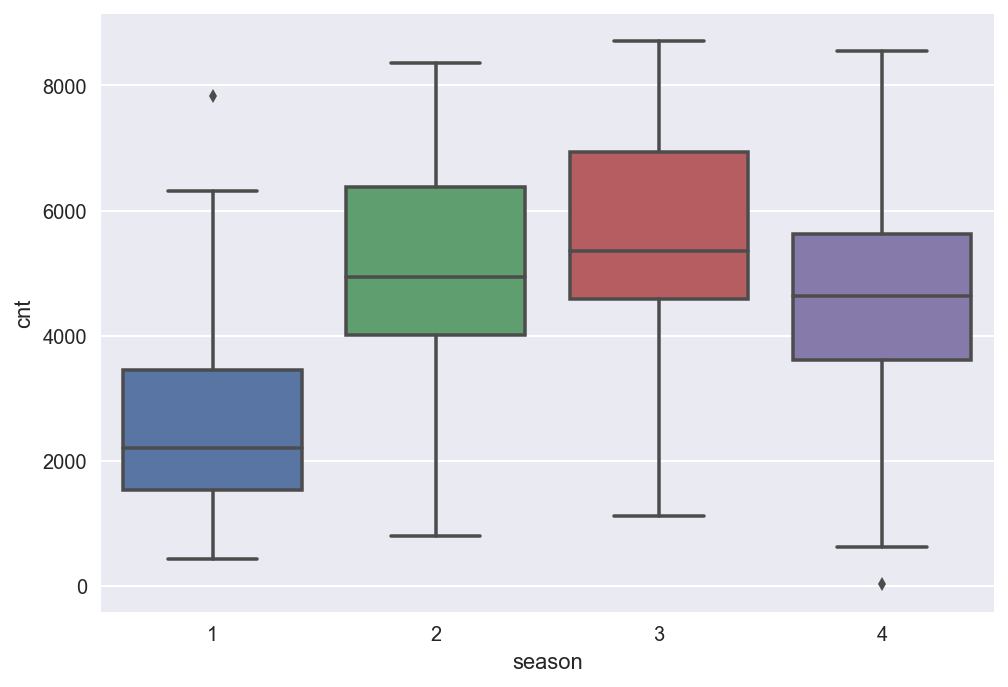

holiday box plot


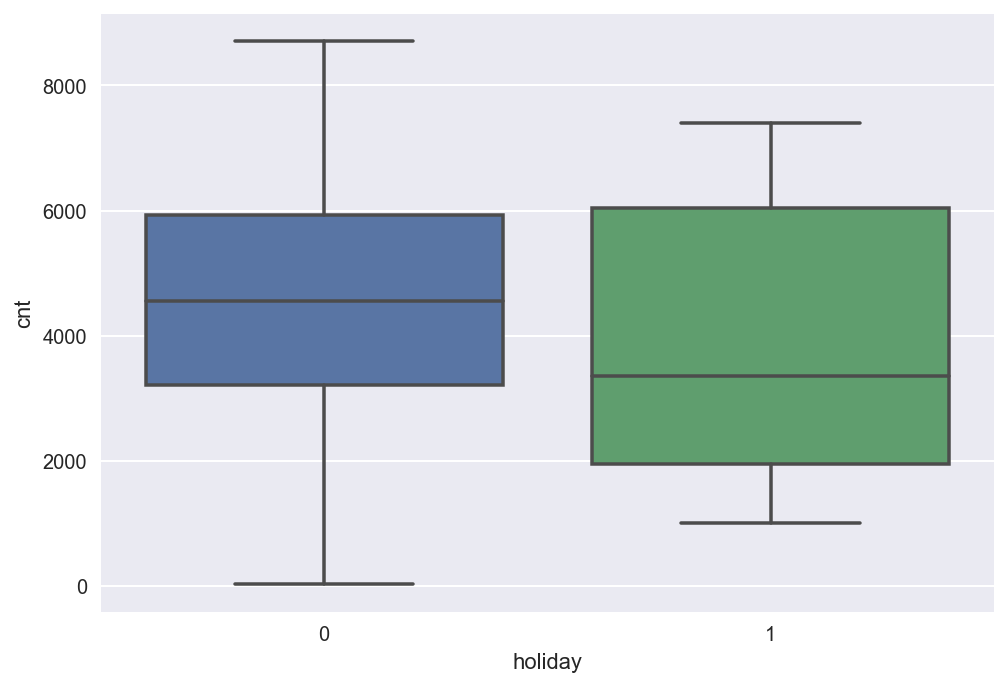

mnth box plot


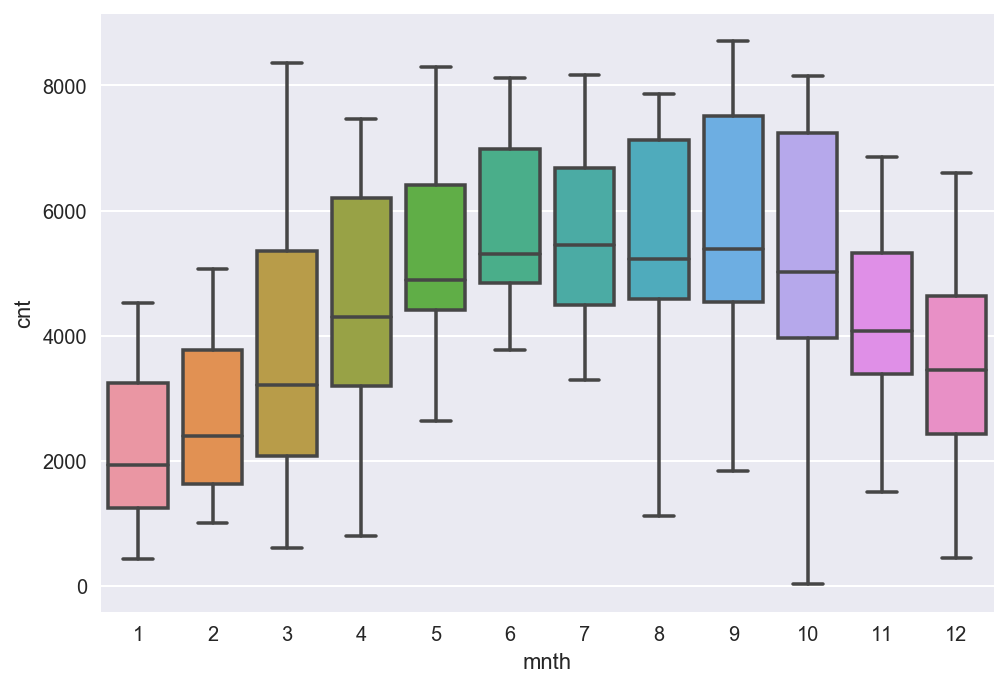

weekday box plot


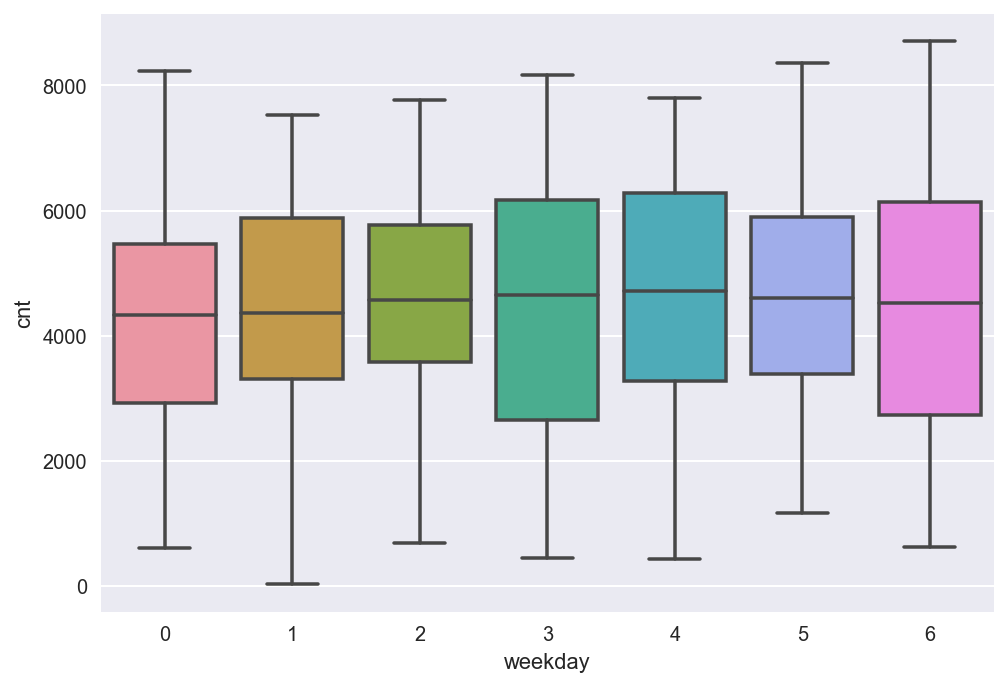

workingday box plot


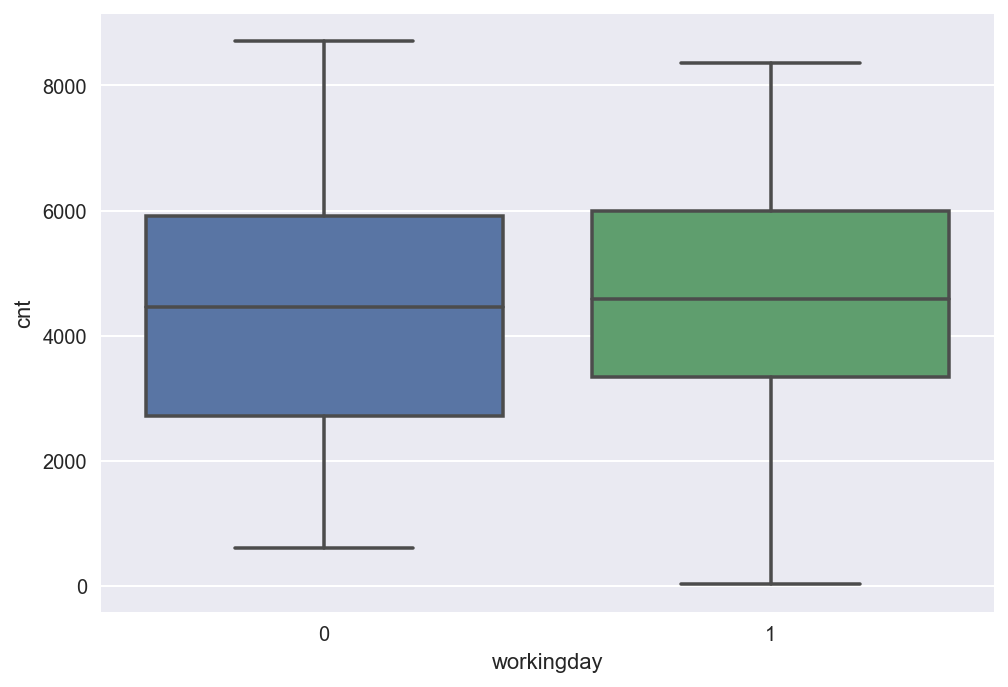

weathersit box plot


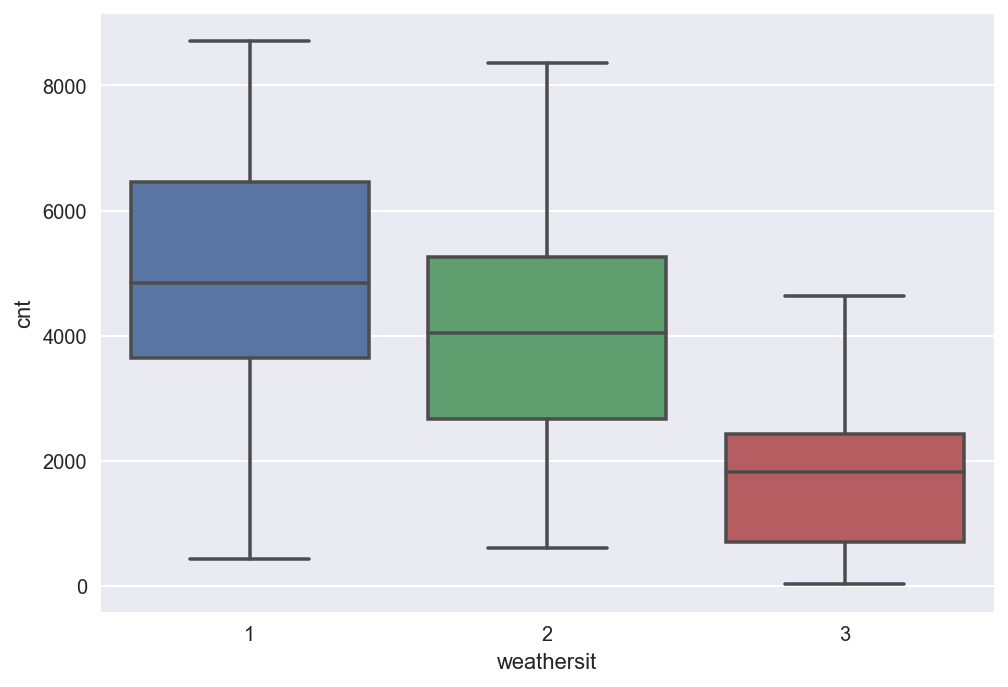

In [303]:
for cols in day[category_features_day]:
    sns.boxplot(y = 'cnt', x = cols, data= day)
    print(cols,'box plot')
    plt.show()

# Distribution of Day data set

temp  Distribution Plot


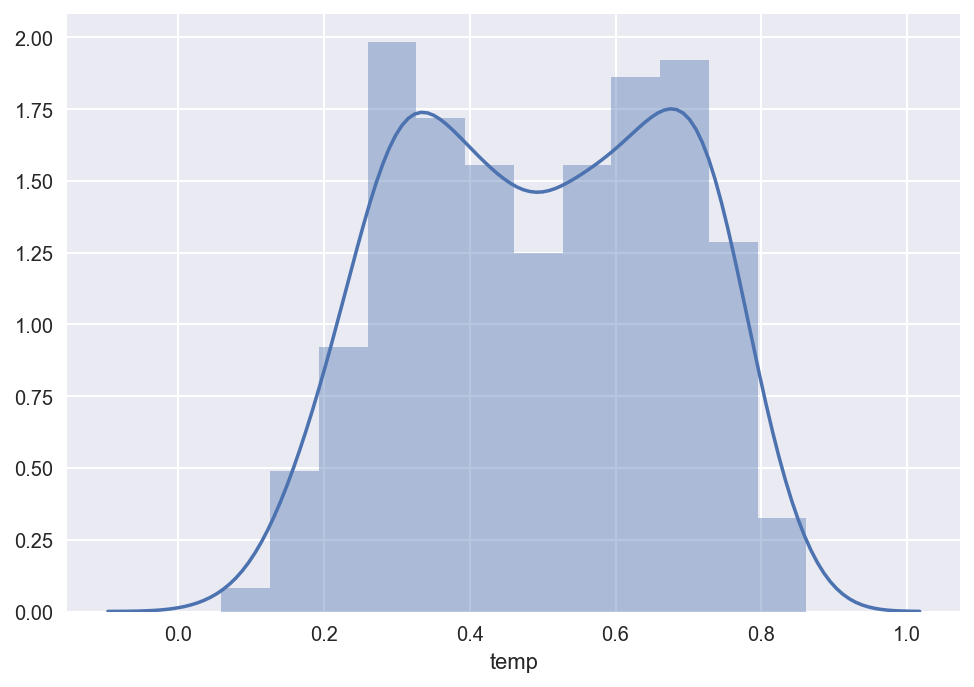

atemp  Distribution Plot


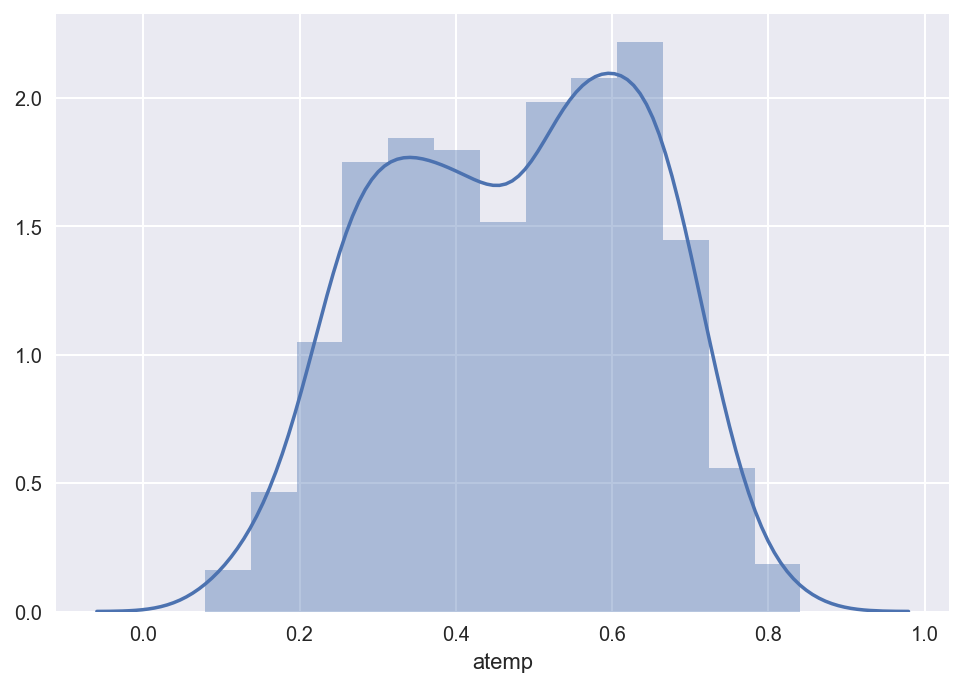

hum  Distribution Plot


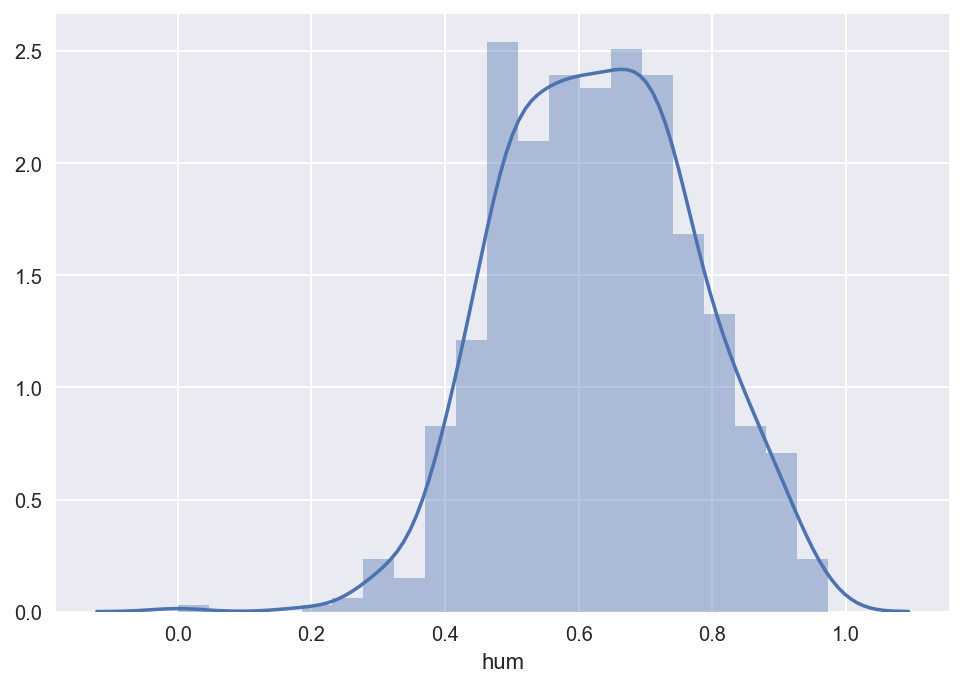

windspeed  Distribution Plot


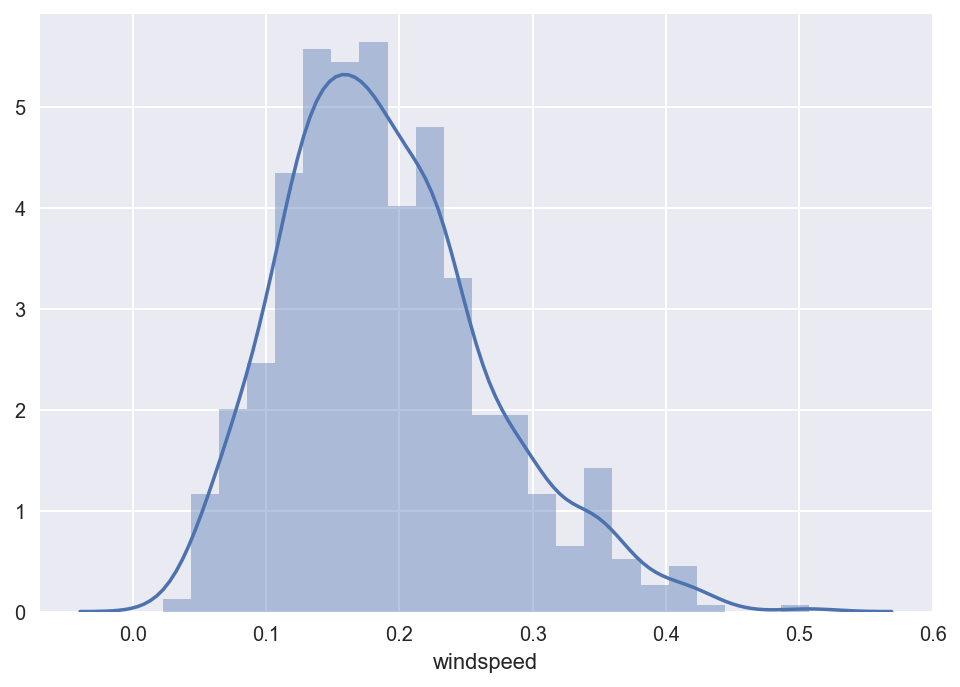

cnt  Distribution Plot


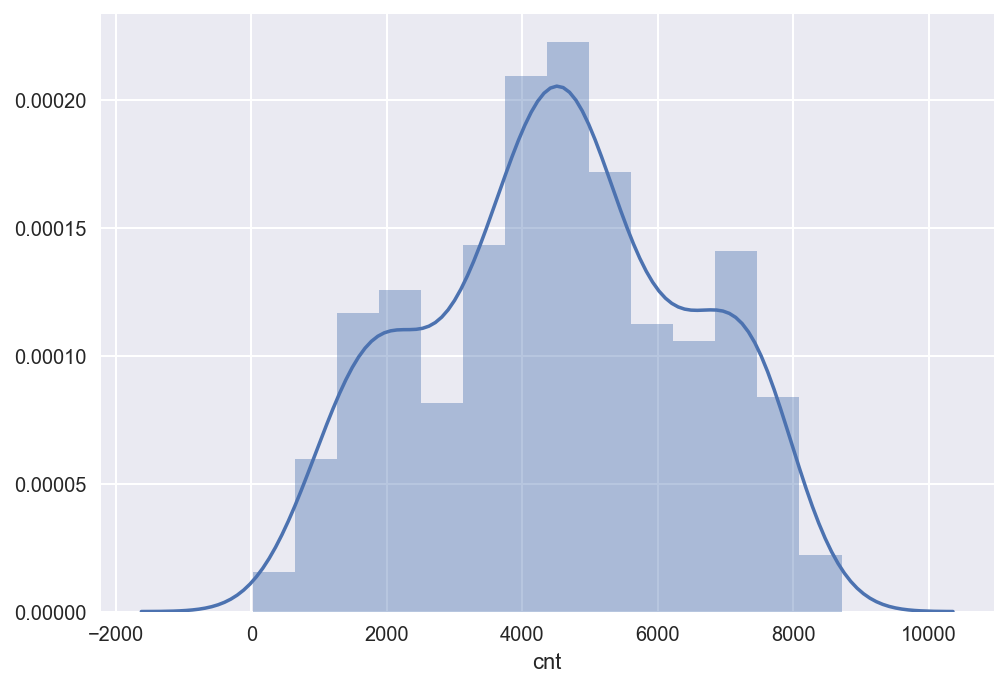

In [304]:
for cols in day[number_features_day + target_day]:
    sns.distplot(day[cols])
    print(cols,' Distribution Plot')
    plt.show()

# Temp and atemp are normally distributed but they are bimodel.
Hum is slightly left skewed
cnt is normally distributed but multimodel in nature
windspeed is right skewed

# 6. Multi Collinearity Check:

For Linear Regression, we need to prove 5 major assumptions.
1) No Auto correlation. 
Test needed : Durbin- Watson Test.
    It's value ranges from 0-4. If the value of Durbin- Watson is Between 0-2, it's known as Positive Autocorrelation.
    If the value ranges from 2-4, it is known as Negative autocorrelation.
    If the value is exactly 2, it means No Autocorrelation.
For a good linear model, it should have low or no autocorrelation.

we can see here the values of dublin watson test (test for normality): 1.078 (POSITIVE AUTO-CORRELATION)
    
From the graph below, we can easily see that there is somewhat Positive autocorrelation.

# Assumption 1- No autocorrelation

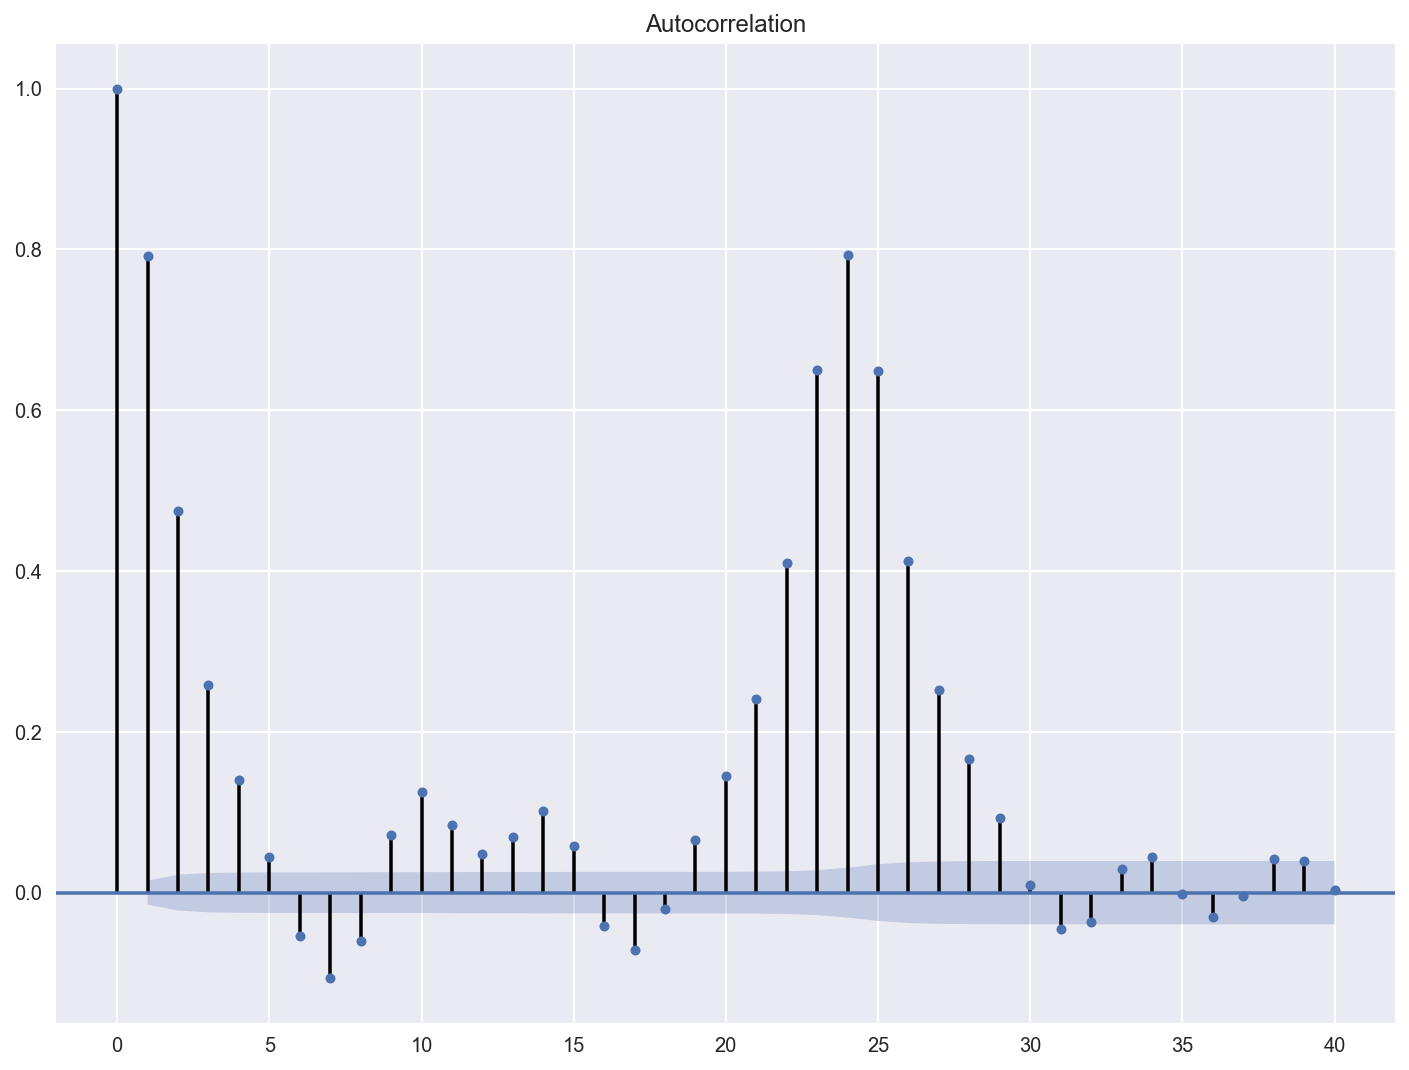

In [240]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)
acf.show()

# Assumption 2- Normality of Residuals

2) The second assumption is the Normality of Residuals. 
For this we prefer the Jarque Bera test. For a good model, the residuals should be normally distributed.
The higher the value of Jarque Bera test , the lesser the residuals are normally distributed.
We generally prefer a lower value of jarque bera test.

The Jarque–Bera test is a goodness-of-fit test of whether sample data 
have the skewness and kurtosis matching a normal distribution.
And jarque-bera test (test for normality) : 783.126
    
The jarque bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution.
Note that this test generally works good for large enough number of data samples(>2000) as the test statistics asymptotically has a chi squared distribution with degrees 2 of freedom.

In [241]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

(1980.5506048378863, 0.0)


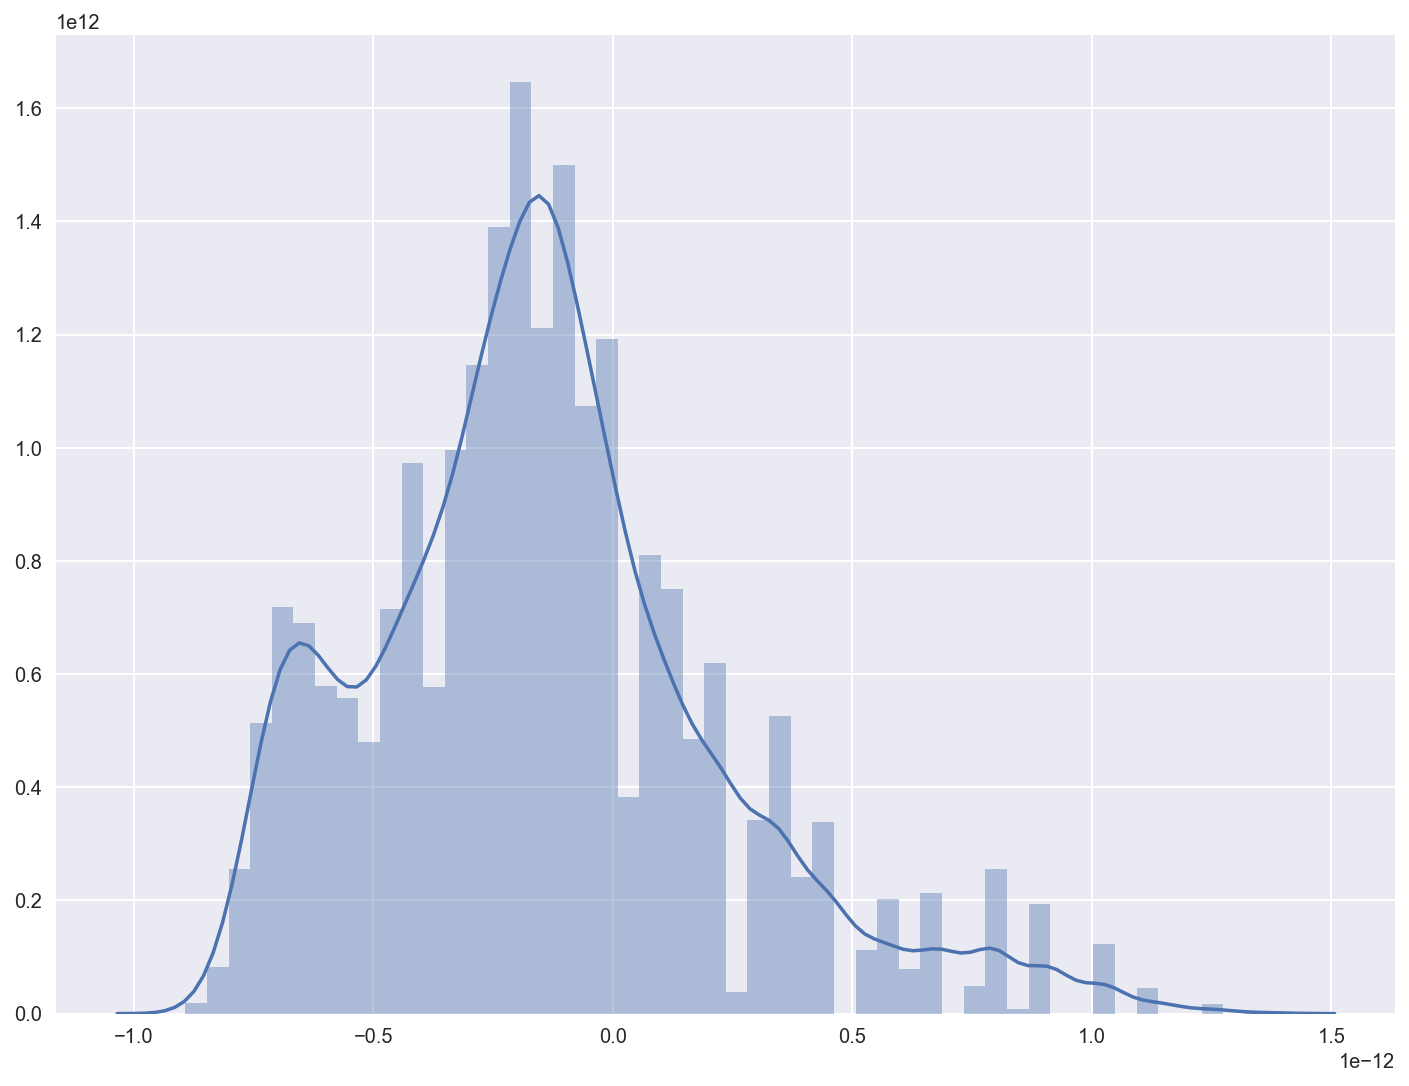

In [242]:
import seaborn as sns

sns.distplot(lin_reg.resid)

# Asssumption 3 - Linearity of residuals
Here we have 2 options. Either we can plot the observed values Vs predicted values and plot the Residual Vs predicted values and see the linearity of residuals. OR We can go for rainbow test. Let's look both of them one by one

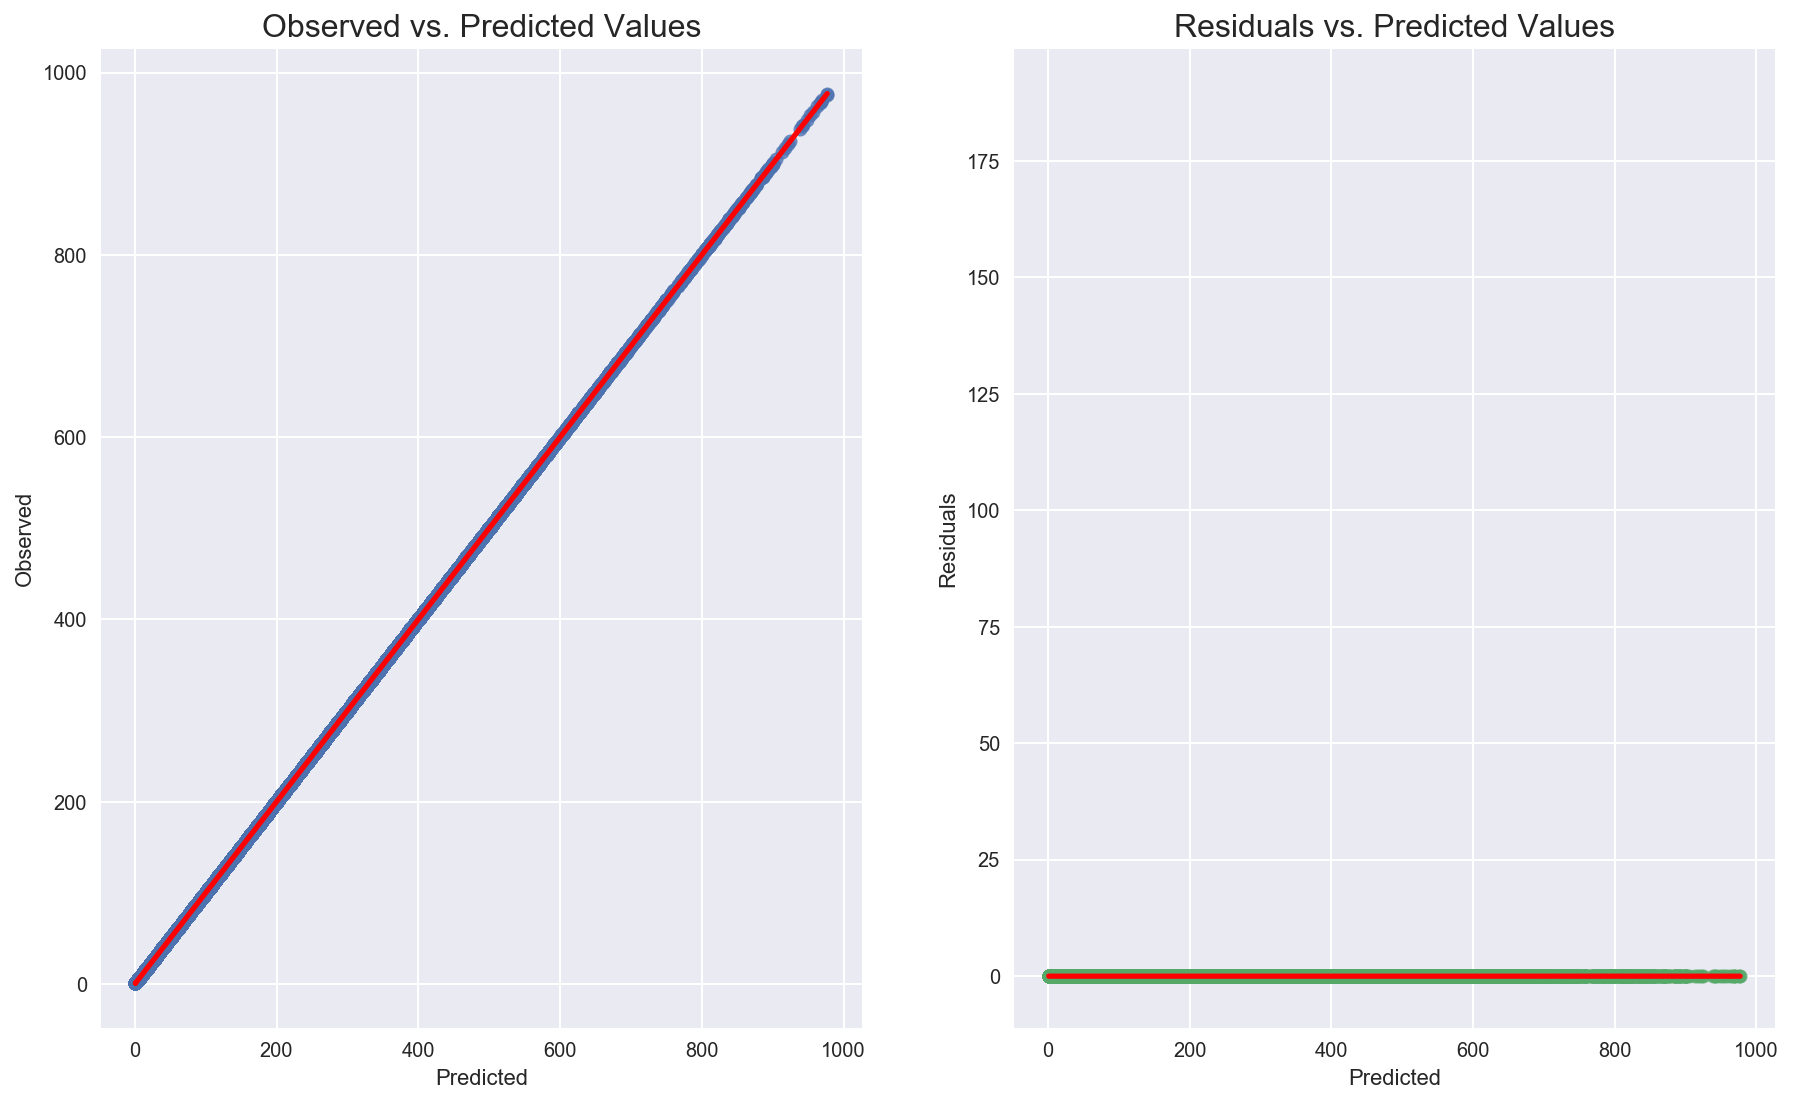

In [243]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)  

# To detect nonlinearity one can inspect plots of observed vs. predicted values or residuals vs. predicted values. 
The desired outcome is that points are symmetrically distributed around a diagonal line in the former plot or 
around horizontal line in the latter one. 
In both cases with a low linearity of residuals can be seen.

# Rainbow test
It is done to check the linearity of the residuals for a linear regression model.
Linearity of residuals is preferred.

In [244]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

(-0.99801478464062865, 1.0)

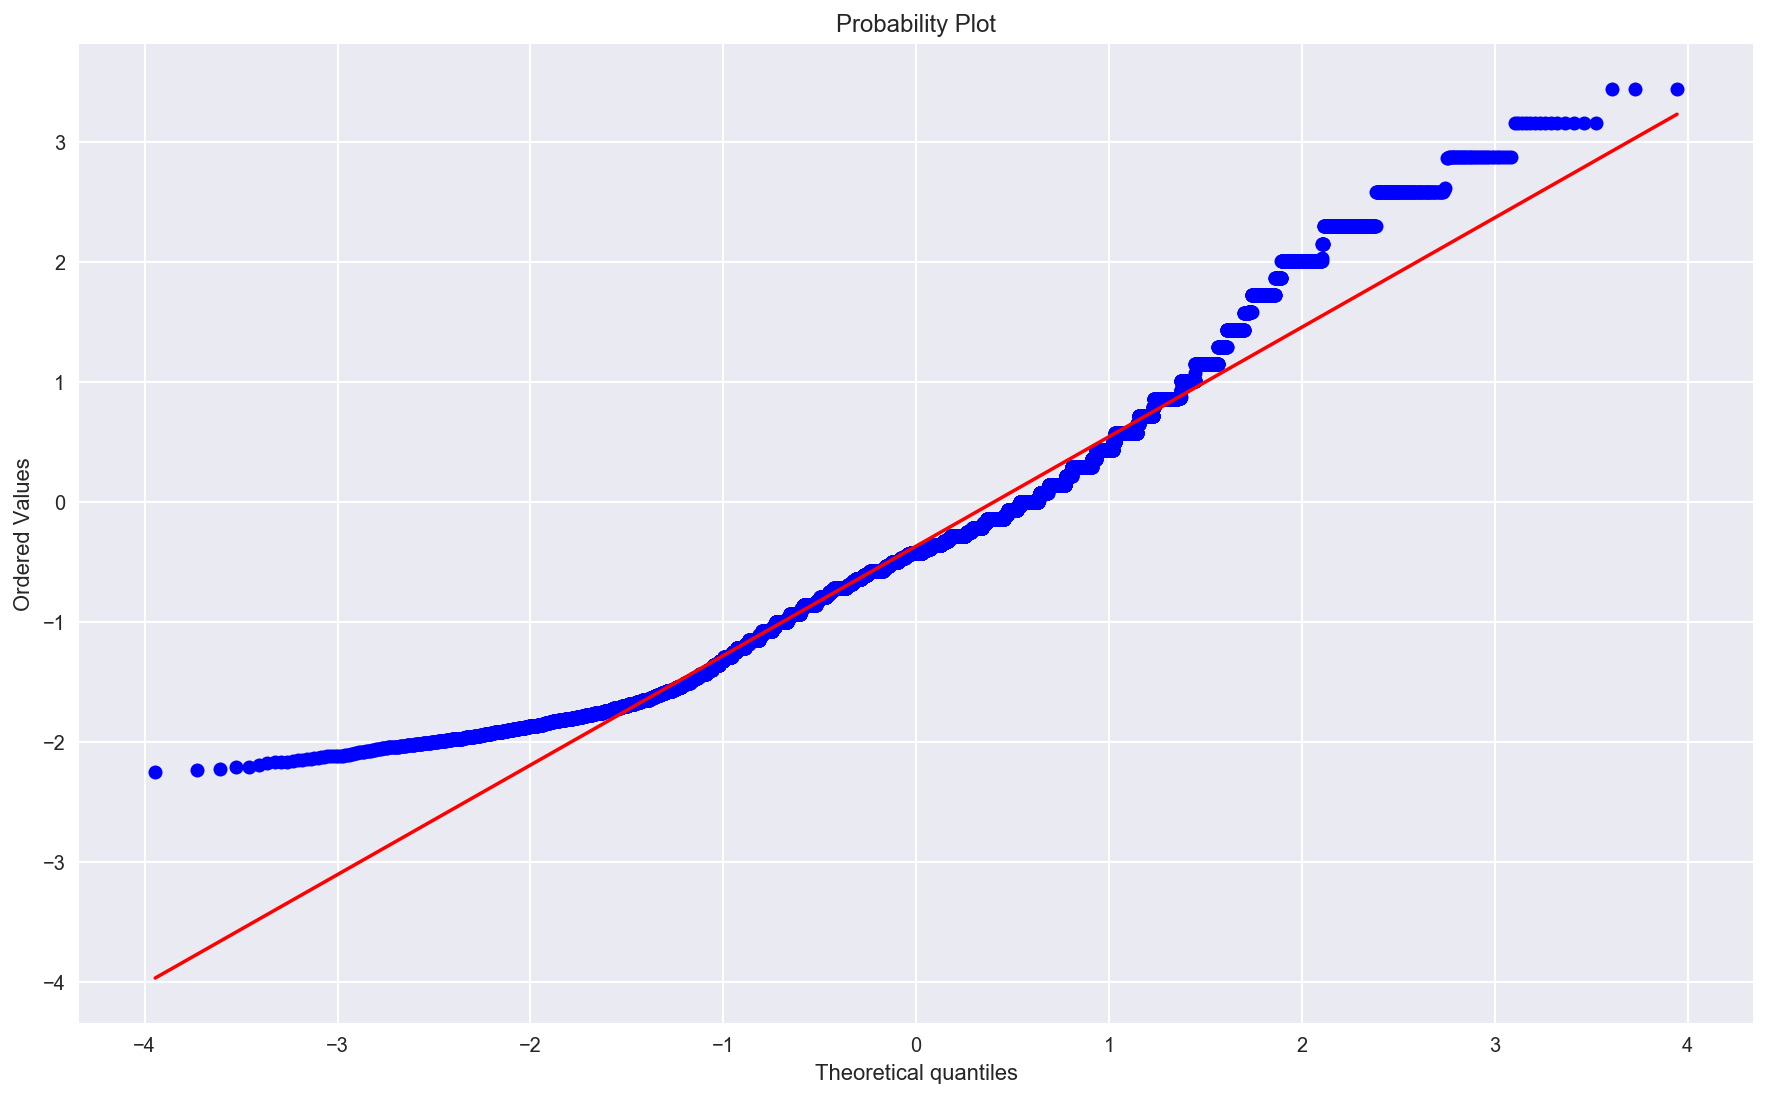

In [245]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

# Assumption 4 - Homoscedasticity_test(using goldfeld test) OR (Beusch-Wagon Test)¶
Homoscedacity :: If the residuals are symmetrically distributed across the trend , then it is called as homoscedacious. Heteroscedacity :: If the residuals are not symmetric across the trend, then it is called as heteroscedacious. In this the residuals can form an arrow shape or any other non symmetrical shape.

This test is based on the hytpothesis testing where null and alternate hypothesis are:
H0 = constant variance among residuals. (Homoscedacity)
Ha = Heteroscedacity.

The residuals should be homoscedacious.

# Goldfeld Test

[('F statistic', 2.5295610242014375), ('p-value', 0.0)]

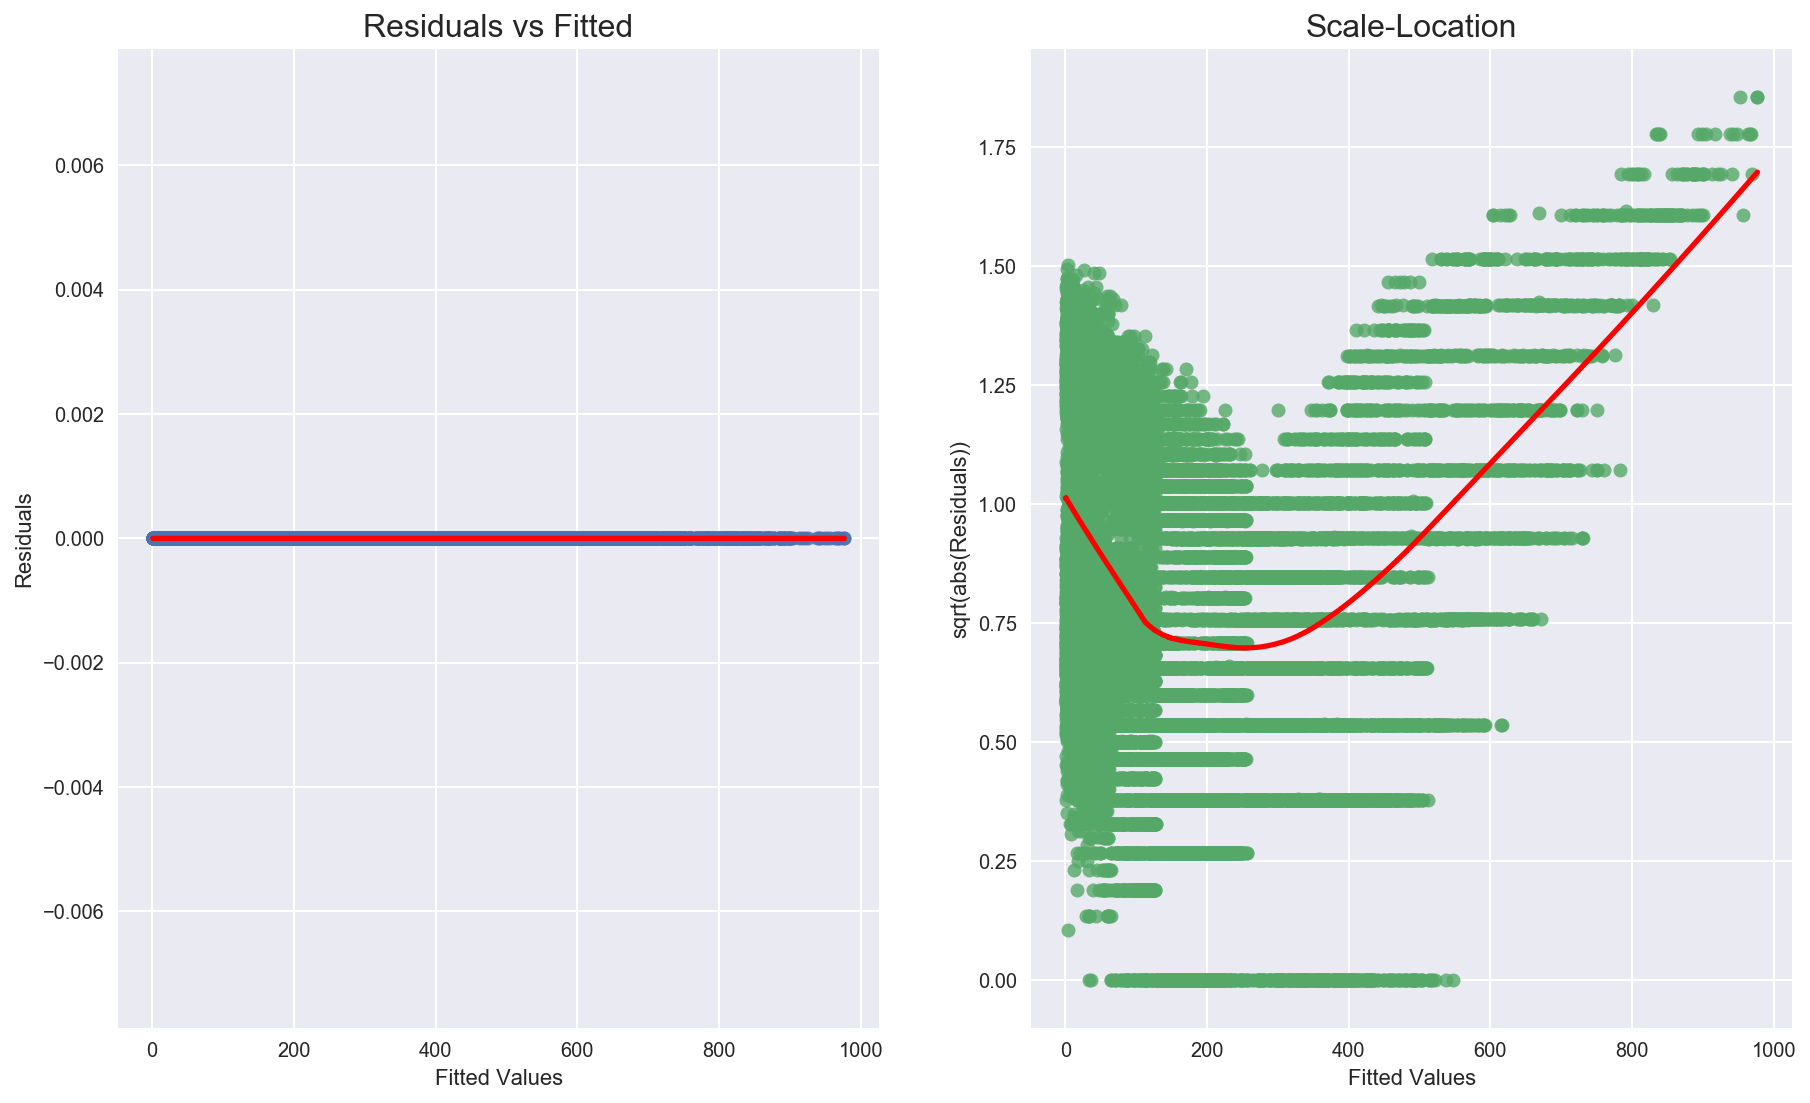

In [246]:
from statsmodels.compat import lzip
import numpy as np
from statsmodels.compat import lzip
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

model = lin_reg
fitted_vals = model.predict()
resids = model.resid
resids_standardized = model.get_influence().resid_studentized_internal
fig, ax = plt.subplots(1,2)

sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
ax[0].set_title('Residuals vs Fitted', fontsize=16)
ax[0].set(xlabel='Fitted Values', ylabel='Residuals')
sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
ax[1].set_title('Scale-Location', fontsize=16)
ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
lzip(name, test)

# Assumption 5- NO MULTI COLLINEARITY


In [247]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

instant    season          yr        mnth        hr  holiday  \
vif  572.102174  3.528103  435.547942  145.817742  1.265102  1.08456   

      weekday  workingday  weathersit       temp      atemp       hum  \
vif  1.017868     1.40441    1.284493  43.901532  44.149548  1.667936   

     windspeed    casual  registered  
vif   1.199939  2.181291    1.786188

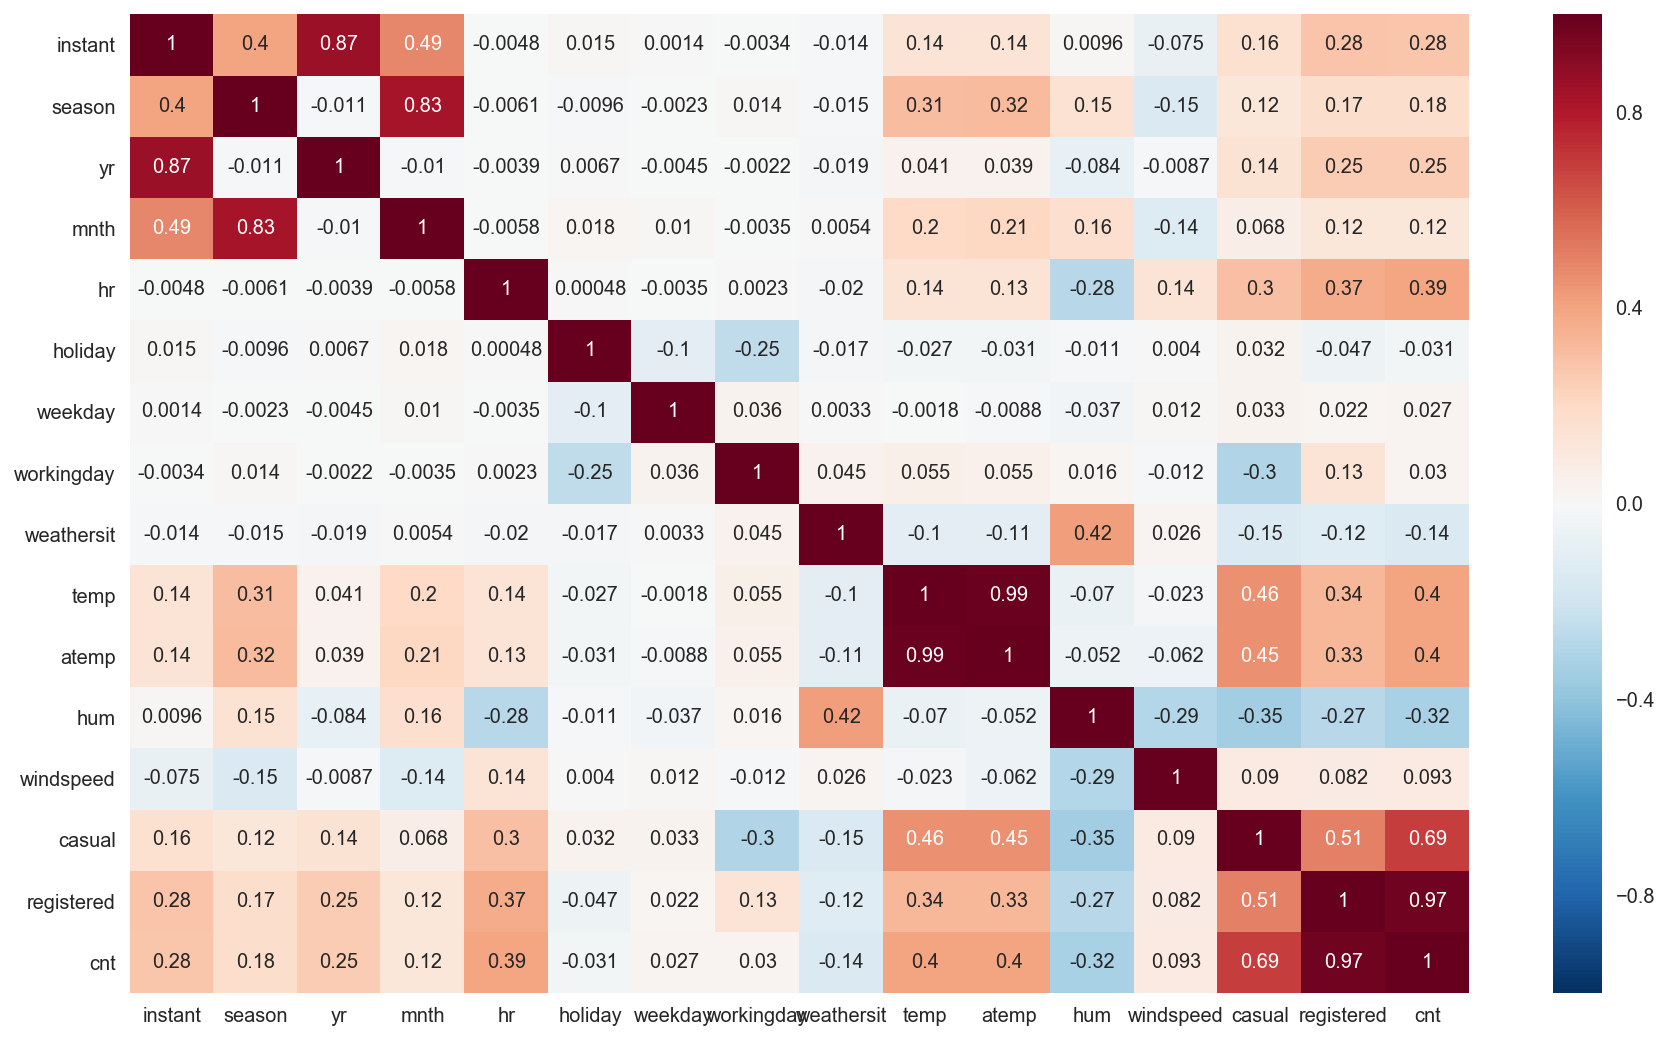

In [248]:
sns.heatmap(hr.corr(), annot=True)

# INFERENCES FROM THE ABOVE HEATMAP
self realtion i.e. of a feature to itself is equal to 1 as expected.
temp and atemp are highly related as expected.
humidity is inversely related to count as expected as the weather is humid people will not like to travel on a bike.
also note that casual and working day are highly inversely related as you would expect.
Also note that count and holiday are highly inversely related as you would expect.
Also note that temp(or atemp) highly effects the count.
Also note that weather and count are highly inversely related. This is bcoz for uour data as weather increases from (1 to 4) implies that weather is getting more worse and so lesser people will rent bikes.
registered/casual and count are highly related which indicates that most of the bikes that are rented are registered.
similarly we can draw some more inferences like weather and humidity and so on...

# Multi Collinearity for Day Data set

In [305]:
vif = [variance_inflation_factor(X_constant_day.values,i) for i in range(X_constant_day.shape[1])]
pd.DataFrame({'vif' : vif[1:]}, index = X_day.columns).T

season   holiday      mnth   weekday  workingday  weathersit      temp  \
vif  3.547489  1.083084  3.332573  1.023842    1.076379    1.744807  63.31723   

         atemp       hum  windspeed  
vif  64.343265  1.888988   1.197228

In [306]:
day[number_features_day].corr()

temp     atemp       hum  windspeed
temp       1.000000  0.991702  0.126963  -0.157944
atemp      0.991702  1.000000  0.139988  -0.183643
hum        0.126963  0.139988  1.000000  -0.248489
windspeed -0.157944 -0.183643 -0.248489   1.000000

# VIF is high for temp and atemp. Correlation between temp and atemp is 0.99172, which is very high and there exists multi collinearity between these 2 features

# 7. Apply Feature selection technique:

In [201]:
### calculating the vif values as multicollinearity exists (as stated by warning 2)

from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(X.values, j) for j in range(1, X.shape[1])]

[21.328336824773331,
 778.45662327201262,
 604.30742931432985,
 4.3508376925041192,
 1.1003421189775762,
 3.0989177869403468,
 4.1970150537406363,
 7.6404543255719659,
 324.60016795665996,
 362.05919646820354,
 13.966830708516738,
 3.3467374163657224,
 3.2886416019815292,
 3.6007755385949616]

In [202]:
# removing collinear variables
# function definition

def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.",i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:",a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [203]:
## passing X to the function so that the multicollinearity gets removed.
train_out = calculate_vif(X)

Iteration no. 1
[2049.1136250948439, 21.328336824773331, 778.45662327201262, 604.30742931432985, 4.3508376925041192, 1.1003421189775762, 3.0989177869403468, 4.1970150537406363, 7.6404543255719659, 324.60016795665996, 362.05919646820354, 13.966830708516738, 3.3467374163657224, 3.2886416019815292, 3.6007755385949616]
Max VIF is for variable no.: 0
Iteration no. 2
[21.275673827639771, 2.1037195437652092, 15.159751509847883, 4.3337711472476999, 1.0976146207514952, 3.0757462974036054, 4.1718823507219192, 7.6270166846775549, 320.59548918951884, 356.15613776267975, 13.537836529573459, 3.2674942319667499, 3.2833383469273274, 3.598221055401889]
Max VIF is for variable no.: 9
Iteration no. 3
[21.206015318914989, 2.0999235231645472, 15.156667262771153, 4.2816480285073286, 1.097576736371539, 3.0739741806717169, 4.1507594308994635, 7.6211341533050661, 10.79010457662646, 12.64835146922757, 3.2193988392645716, 3.26971761588424, 3.5981306830615862]
Max VIF is for variable no.: 0
Iteration no. 4
[2.099

In [204]:
## includes only the relevant features.
train_out.head()

yr  mnth  hr  holiday  weekday  workingday  weathersit  windspeed  casual  \
0   0     1   0        0        6           0           1        0.0       3   
1   0     1   1        0        6           0           1        0.0       8   
2   0     1   2        0        6           0           1        0.0       5   
3   0     1   3        0        6           0           1        0.0       3   
4   0     1   4        0        6           0           1        0.0       0   

   registered  
0          13  
1          32  
2          27  
3          10  
4           1

# By this method we got that yr mnth hr holiday weekday workingday weathersit windspeed casual registered are the most important features.

# Embedded method


In [205]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 253.317533
Best score using built-in LassoCV: 0.999154


In [206]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")

Lasso picked 3 variables and eliminated the other 12 variables


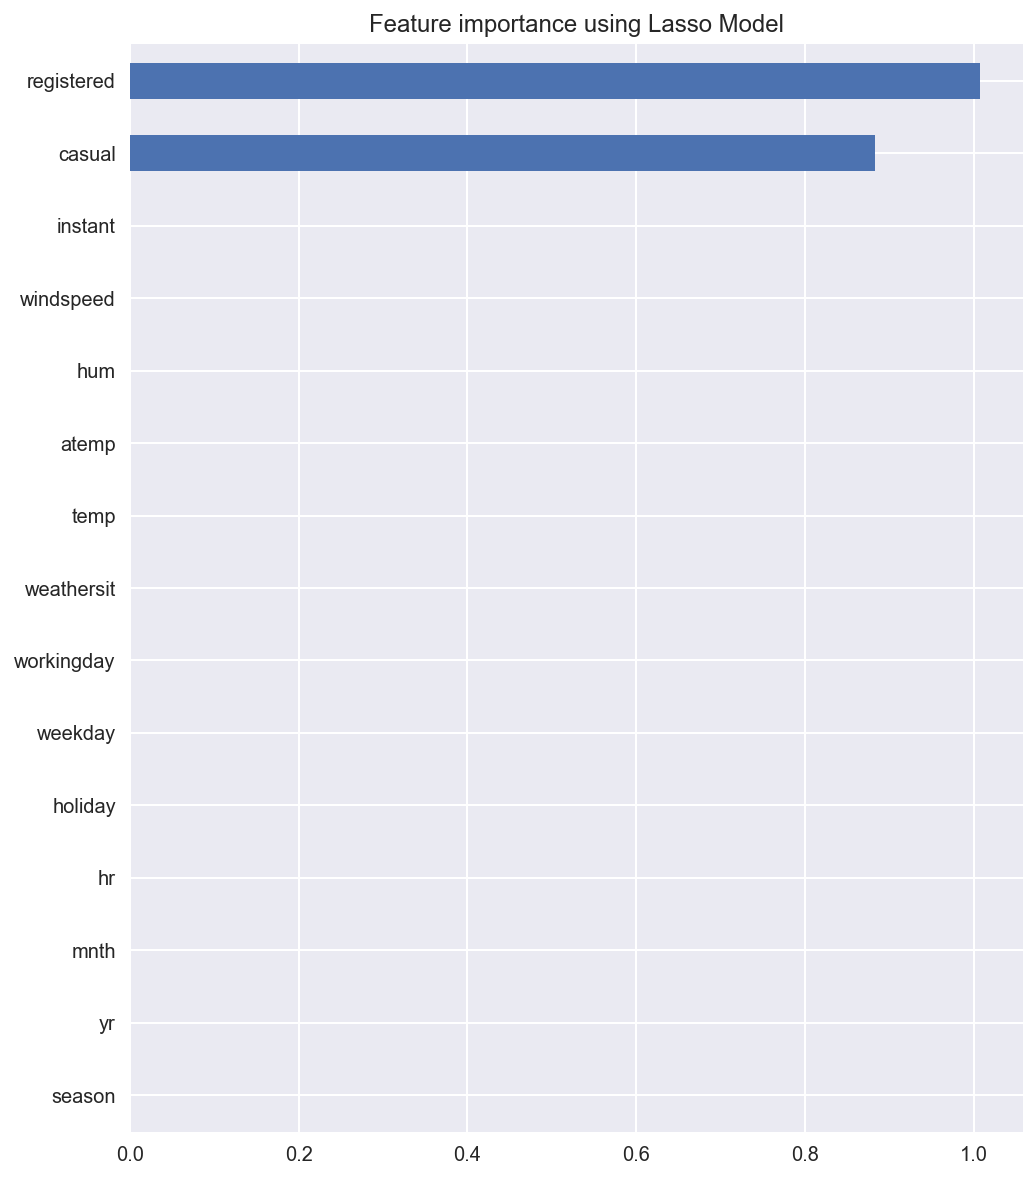

In [207]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# Backward elimination

In [210]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

const         3.064403e-27
instant       1.104527e-02
season        2.130994e-08
yr            3.649730e-01
mnth          5.559431e-01
hr            1.006504e-11
holiday       1.155285e-10
weekday       3.224067e-04
workingday    9.448387e-09
weathersit    2.589325e-05
temp          4.868461e-03
atemp         1.750981e-07
hum           1.420491e-50
windspeed     9.473891e-01
casual        0.000000e+00
registered    0.000000e+00
dtype: float64

In [211]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'casual', 'registered']


# RFE - Recursive Feature Elimination

In [212]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 11)

In [213]:
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True False  True False  True  True  True  True  True
  True  True  True]
[3 5 1 1 4 1 2 1 1 1 1 1 1 1 1]


In [214]:
X.columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered'],
      dtype='object')

In [215]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 2
Score with 2 features: 1.000000


In [216]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['mnth', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered'],
      dtype='object')


In [217]:
hr.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# Feature Selection Techniques for Day Data Set


In [307]:
import warnings
warnings.filterwarnings('ignore')
#Backward Selection
cols = list(X_day.columns)
pmax = 1
while(len(cols)>0):
    p = []
    x_1 = X_day[cols]
    x_1 = sm.add_constant(x_1)
    model = sm.OLS(y_day,x_1).fit()
    p = pd.Series(model.pvalues.values[1:], index=cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_feature_BE = cols
print(selected_feature_BE)

['season', 'weekday', 'weathersit', 'atemp', 'hum', 'windspeed']


In [308]:
X = day[selected_feature_BE]
X_train,X_test,y_train,y_test = train_test_split(X,y_day,test_size=0.3,random_state=42)
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print("train accuracy",model.score(X_train,y_train))
print("test accuracy",model.score(X_test,y_test))

train accuracy 0.521169213344
test accuracy 0.522549888137


In [309]:
#no.of features through Recursive Feature Elimination
nof_list = np.arange(1,18)
high_score = 0
#variable to store optimum no.of features
nof = 0
score_list = []
for n in range(len(nof_list)):
    X_train_d,X_test_d,y_train_d,y_test_d = train_test_split(X_day,y_day,test_size=0.3,random_state=42)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    x_train_rfe = rfe.fit_transform(X_train_d,y_train_d)
    x_test_rfe = rfe.transform(X_test_d)
    model.fit(x_train_rfe,y_train_d)
    score = model.score(x_test_rfe,y_test_d)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print('optimum no.of features : %d' %nof )
print('score with %d features: %f', (nof,high_score))

optimum no.of features : 10
score with %d features: %f (10, 0.50192160832767962)


In [310]:
cols = list(X_day.columns)
model = LinearRegression()
#initializing RFE model
rfe = RFE(model,10)
x_rfe = rfe.fit_transform(X_day,y_day)
model.fit(x_rfe,y_day)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['season', 'holiday', 'mnth', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')


In [311]:
X = day[selected_features_rfe]
X_train,X_test,y_train,y_test = train_test_split(X,y_day,test_size=0.3,random_state=42)
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print("train accuracy",model.score(X_train,y_train))
print("test accuracy",model.score(X_test,y_test))

train accuracy 0.524969337287
test accuracy 0.501921608328


In [312]:
def calculate_vif(X_day):
    thresh = 5.0
    output = pd.DataFrame()
    k = X_day.shape[1]
    vif = [variance_inflation_factor(X_day.values,j) for j in range(X_day.shape[1])]
    for i in range(1,k):
        print("iteration no:",i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF for variable no is: ", a)
        if vif[a] <= thresh:
            break
        if i == 1:
            output = X_day.drop(X_day.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
        elif i > 1:
            output = output.drop(output.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]  
            
    return(output)

In [313]:
train_out = calculate_vif(X_day)

iteration no: 1
[21.246305173490121, 1.0982234218318492, 15.23613836104103, 3.0966114860216662, 3.2713914987621919, 13.15613270578787, 492.28079304007713, 556.19300903605301, 28.042011610775443, 5.2317286564480172]
Max VIF for variable no is:  7
iteration no: 2
[21.109489311335061, 1.0982135431292119, 15.226234865391934, 3.094163771530309, 3.2612306472300596, 13.05932456176086, 9.3431889628000082, 25.607080403620976, 5.2296905722226317]
Max VIF for variable no is:  7
iteration no: 3
[20.977550614937208, 1.0919309261291947, 15.056982047662835, 3.0803278623180432, 3.2209855521738509, 6.1558269656752858, 7.6590092980356319, 5.1850327495084514]
Max VIF for variable no is:  0
iteration no: 4
[1.0915560938191391, 4.5641081982020753, 3.0797460922754394, 3.2154844493775281, 6.1100326884303806, 6.5306278231993913, 5.1844917877775725]
Max VIF for variable no is:  5
iteration no: 5
[1.0879342238876319, 3.6638657676298747, 3.0042345296808066, 3.064877781373466, 5.9747317852827333, 4.83800584507271

In [314]:
train_out.head()

holiday  mnth  weekday  workingday  windspeed
0        0     1        6           0   0.160446
1        0     1        0           0   0.248539
2        0     1        1           1   0.248309
3        0     1        2           1   0.160296
4        0     1        3           1   0.186900

In [315]:
X = X_day[list(train_out.columns)]
X_train,X_test,y_train,y_test = train_test_split(X,y_day,test_size=0.3,random_state=42)
lr = LinearRegression()
model = lr.fit(X_train,y_train)

# over-fitting model

Back Ward Selection has given better accuracy score compared to the other feature selection algorithms, as well as higher accuracy. Thus, we select Back Ward Selection Algorithm

# 8. Data Transformation:

In [264]:
hr=hr.drop(["dteday"],axis=1)

In [265]:
df1=hr.transform(lambda x: x**0.5)
x=df1.drop(['cnt'],axis=1)
y=df1.cnt

In [266]:
# By applying square root transform the model gets more better
x_constant=sm.add_constant(x)
x_constant.head()

lin_reg=sm.OLS(y,x_constant).fit()

In [267]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.989e+05
Date:                Tue, 05 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:31:47   Log-Likelihood:                 1000.3
No. Observations:               17379   AIC:                            -1969.
Df Residuals:                   17363   BIC:                            -1844.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3281      0.019     17.526      0.000       0.291       0.365
instant        0.0009      0.000      2.861      0.004       0.000       0.001
season        -0.0207      0.009     -2.333      0.020      -0.038      -0.003
yr            -0.0561      0.016     -3.527      0.000      -0.087      -0.025
mnth          -0.0264      0.008     -3.380      0.001      -0.042      -0.011
hr            -0.0352      0.002    -20.465      0.000      -0.039      -0.032
holiday        0.0258      0.011      2.401      0.016       0.005       0.047
weekday       -0.0025      0.002     -1.089      0.276      -0.007       0.002
workingday    -0.0044      0.005     -0.944      0.345      -0.014       0.005
weathersit     0.0109      0.008      1.389      0.165      -0.004       0.026
temp          -0.3084      0.078     -3.969      0.000      -0.461      -0.156
atemp         -0.2145      0.085     -2.522      0.012      -0.381      -0.048
hum            0.1813      0.017     10.574      0.000       0.148       0.215
windspeed     -0.0234      0.010     -2.235      0.025      -0.044      -0.003
casual         0.4475      0.001    482.959      0.000       0.446       0.449
registered     0.9180      0.000   1918.438      0.000       0.917       0.919
==============================================================================
Omnibus:                     6349.767   Durbin-Watson:                   0.709
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28908.093
Skew:                           1.742   Prob(JB):                         0.00
Kurtosis:                       8.271   Cond. No.                     6.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

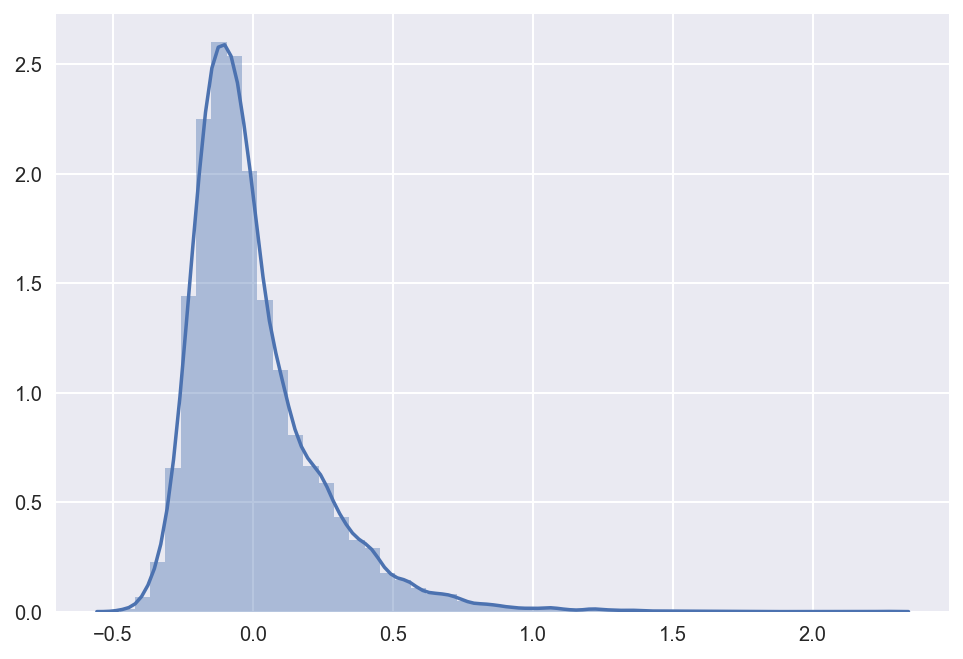

In [268]:
import seaborn as sns
sns.distplot(lin_reg.resid)

# Cuberoot Transformation


In [270]:
import numpy as np

df2=hr.transform(lambda x:np.cbrt(x))
x=df2.drop(['cnt'],axis=1)
y=df2.cnt


In [271]:
x_constant=sm.add_constant(x)
x_constant.head()

lin_reg=sm.OLS(y,x_constant).fit()

In [272]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 4.544e+05
Date:                Tue, 05 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:33:49   Log-Likelihood:                 14944.
No. Observations:               17379   AIC:                        -2.986e+04
Df Residuals:                   17363   BIC:                        -2.973e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2221      0.011     19.333      0.000       0.200       0.245
instant       -0.0003      0.001     -0.500      0.617      -0.001       0.001
season        -0.0160      0.007     -2.377      0.017      -0.029      -0.003
yr             0.0020      0.005      0.394      0.694      -0.008       0.012
mnth          -0.0035      0.006     -0.636      0.525      -0.014       0.007
hr            -0.0120      0.001     -8.347      0.000      -0.015      -0.009
holiday        0.0039      0.005      0.812      0.417      -0.006       0.013
weekday       -0.0007      0.001     -0.496      0.620      -0.004       0.002
workingday    -0.0224      0.002    -10.427      0.000      -0.027      -0.018
weathersit     0.0039      0.006      0.689      0.491      -0.007       0.015
temp          -0.0836      0.043     -1.951      0.051      -0.168       0.000
atemp         -0.0206      0.046     -0.444      0.657      -0.112       0.070
hum           -0.0091      0.010     -0.923      0.356      -0.028       0.010
windspeed     -0.0085      0.004     -2.149      0.032      -0.016      -0.001
casual         0.2944      0.001    267.745      0.000       0.292       0.297
registered     0.8953      0.001   1194.162      0.000       0.894       0.897
==============================================================================
Omnibus:                     7829.768   Durbin-Watson:                   0.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48215.333
Skew:                           2.093   Prob(JB):                         0.00
Kurtosis:                      10.004   Cond. No.                     1.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

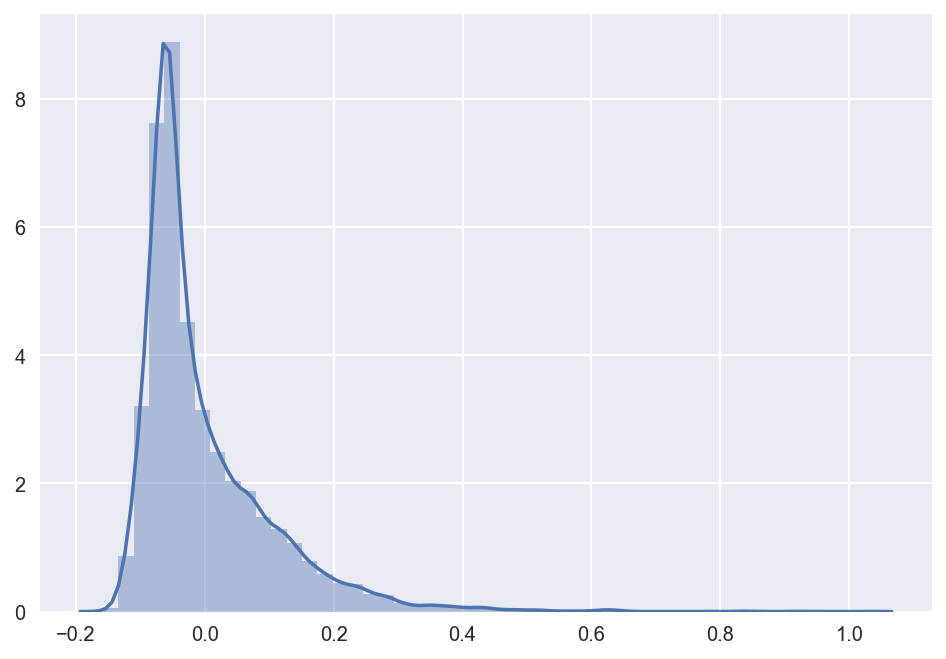

In [273]:
import seaborn as sns
sns.distplot(lin_reg.resid)

# The aim is that the difference b/w R2 and adjusted r2 should be less but here its 0 (Model ovefits)


# 9. Apply feature engineering:

# NOW WE CAN DO SOME FEATURE ENGINEERING AND GET SOME NEW FEATURES AND DROP SOME USELESS OR LESS RELEVANT FEATURES

In [274]:
# # seperating season as per values. this is bcoz this will enhance features.
season=pd.get_dummies(hr['season'],prefix='season')
hr=pd.concat([hr,season],axis=1)
hr.head()
season=pd.get_dummies(hr['season'],prefix='season')
test_df=pd.concat([hr,season],axis=1)
test_df.head()

instant  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0        1       1   0     1   0        0        6           0           1   
1        2       1   0     1   1        0        6           0           1   
2        3       1   0     1   2        0        6           0           1   
3        4       1   0     1   3        0        6           0           1   
4        5       1   0     1   4        0        6           0           1   

   temp    ...     registered  cnt  season_1  season_2  season_3  season_4  \
0  0.24    ...             13   16         1         0         0         0   
1  0.22    ...             32   40         1         0         0         0   
2  0.22    ...             27   32         1         0         0         0   
3  0.24    ...             10   13         1         0         0         0   
4  0.24    ...              1    1         1         0         0         0   

   season_1  season_2  season_3  season_4  
0         1         0         0         0  
1         1         0         0         0  
2         1         0         0         0  
3         1         0         0         0  
4         1         0         0         0  

[5 rows x 24 columns]

In [275]:
# # # same for weather. this is bcoz this will enhance features.
weather=pd.get_dummies(hr['weathersit'],prefix='weathersit')
hr=pd.concat([hr,weather],axis=1)
hr.head()
weather=pd.get_dummies(test_df['weathersit'],prefix='weather')
test_df=pd.concat([test_df,weather],axis=1)
test_df.head()

instant  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0        1       1   0     1   0        0        6           0           1   
1        2       1   0     1   1        0        6           0           1   
2        3       1   0     1   2        0        6           0           1   
3        4       1   0     1   3        0        6           0           1   
4        5       1   0     1   4        0        6           0           1   

   temp    ...      season_3  season_4  season_1  season_2  season_3  \
0  0.24    ...             0         0         1         0         0   
1  0.22    ...             0         0         1         0         0   
2  0.22    ...             0         0         1         0         0   
3  0.24    ...             0         0         1         0         0   
4  0.24    ...             0         0         1         0         0   

   season_4  weather_1  weather_2  weather_3  weather_4  
0         0          1          0          0          0  
1         0          1          0          0          0  
2         0          1          0          0          0  
3         0          1          0          0          0  
4         0          1          0          0          0  

[5 rows x 28 columns]

In [276]:
# # # now can drop weather and season.

test_df.drop(['season','weathersit'],inplace=True,axis=1)
test_df.head()


# # # also I dont prefer both registered and casual but for ow just let them both.

instant  yr  mnth  hr  holiday  weekday  workingday  temp   atemp   hum  \
0        1   0     1   0        0        6           0  0.24  0.2879  0.81   
1        2   0     1   1        0        6           0  0.22  0.2727  0.80   
2        3   0     1   2        0        6           0  0.22  0.2727  0.80   
3        4   0     1   3        0        6           0  0.24  0.2879  0.75   
4        5   0     1   4        0        6           0  0.24  0.2879  0.75   

     ...      season_3  season_4  season_1  season_2  season_3  season_4  \
0    ...             0         0         1         0         0         0   
1    ...             0         0         1         0         0         0   
2    ...             0         0         1         0         0         0   
3    ...             0         0         1         0         0         0   
4    ...             0         0         1         0         0         0   

   weather_1  weather_2  weather_3  weather_4  
0          1          0          0          0  
1          1          0          0          0  
2          1          0          0          0  
3          1          0          0          0  
4          1          0          0          0  

[5 rows x 26 columns]

# Feature Engineering

From Feature engineering we have identified outliers
We have identified relationship between target and numerical columns through box plot
we have identified relationship between target and categorical columns through scatter plot
We performed correlation matrix and heat map to see the correlationship between columns and target variables and column, column as well.
We found out multi colliniearity through Heatmap, which helped in feature engineering and eliminating the features
OLS model also helped us in identifying the features that are not required, or the features that can be eliminated in 95% confident interval.
We have followed 3 techniques of feature engineering, backward selection,rfe and vif method to identify the features that can be eliminated to improve the accuracy of the model.
The data has been labelencoded() and transformed using standardscaler() to scale down the data which could help us in providing a better accuracy score.
Through Dist Plot we tried to identify the distruibution of the data, whether the data is left skewed or right skewed or normally distributed

# Output

# Both overfitting and underfitting can lead to poor model performance. But by far the most common problem in applied machine learning is overfitting.
Overfitting is such a problem because the evaluation of machine learning algorithms on training data is different from the evaluation we actually care the most about, namely how well the algorithm performs on unseen data.
There are two important techniques that you can use when evaluating machine learning algorithms to limit overfitting:
Use a resampling technique to estimate model accuracy.
Hold back a validation dataset.

# The most popular resampling technique is k-fold cross validation. It allows you to train and test your model k-times on different subsets of training data and build up an estimate of the performance of a machine learning model on unseen data.
A validation dataset is simply a subset of your training data that you hold back from your machine learning algorithms until the very end of your project. After you have selected and tuned your machine learning algorithms on your training dataset you can evaluate the learned models on the validation dataset to get a final objective idea of how the models might perform on unseen data.
Using cross validation is a gold standard in applied machine learning for estimating model accuracy on unseen data. If you have the data, using a validation dataset is also an excellent practice.

In [335]:
from sklearn.tree import DecisionTreeRegressor
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
dt = DecisionTreeRegressor()


In [336]:
X_train, X_test, y_train, y_test= train_test_split(X_hour,y_hour,test_size = 0.30, random_state = 42)
lr_model = lr.fit(X_train, y_train)
lasso_model = lasso.fit(X_train, y_train)
ridge_model = ridge.fit(X_train, y_train)
dt_model = dt.fit(X_train, y_train)   
train_score = [lr_model.score(X_train, y_train), lasso_model.score(X_train, y_train),
              ridge_model.score(X_train, y_train), dt_model.score(X_train, y_train)]
test_score = [lr_model.score(X_test, y_test), lasso_model.score(X_test, y_test),
             ridge_model.score(X_test, y_test), dt_model.score(X_test, y_test)]
models = ['Linear Regression','Lasso', 'Ridge','DecisionTreeRegressor']
model_perf = pd.DataFrame({'Model':models, 'train_score':train_score,'test_score':test_score})
model_perf


Model  test_score  train_score
0      Linear Regression    0.344068     0.337156
1                  Lasso    0.340838     0.333947
2                  Ridge    0.344058     0.337152
3  DecisionTreeRegressor    0.740019     0.999956

# LinearRegression, Lasso,Ridge have given us similar accuracy scores
Decision Tree has given very high over fitting model. Thus, we cannot consider that into factor.
we can consider the Rigde model as the train score aand test score are almost simila

# For Day Data Set


In [341]:
X_train, X_test, y_train, y_test= train_test_split(X_day,y_day,test_size = 0.30, random_state = 42)
lr_model = lr.fit(X_train, y_train)
lasso_model = lasso.fit(X_train, y_train)
ridge_model = ridge.fit(X_train, y_train)
dt_model = dt.fit(X_train, y_train)

In [342]:
train_score = [lr_model.score(X_train, y_train), lasso_model.score(X_train, y_train),
              ridge_model.score(X_train, y_train), dt_model.score(X_train, y_train)]
test_score = [lr_model.score(X_test, y_test), lasso_model.score(X_test, y_test),
             ridge_model.score(X_test, y_test), dt_model.score(X_test, y_test)]
models = ['Linear Regression','Lasso', 'Ridge','DecisionTreeRegressor']
model_perf = pd.DataFrame({'Model':models, 'train_score':train_score,'test_score':test_score})
model_perf

Model  test_score  train_score
0      Linear Regression    0.501922     0.524969
1                  Lasso    0.527571     0.523296
2                  Ridge    0.530307     0.519740
3  DecisionTreeRegressor    0.297408     1.000000